In [1]:
import pandas as pd
import shapely
import geopandas as gpd

from tqdm.auto import tqdm

## Table EDA: Assessments

In [2]:
assessment_dupes = pd.read_csv('data/dbeaver_exports/assessment_dupes.csv')
assessment_dupes.columns

/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_27879/2793876919.py:1: DtypeWarning: Columns (11,12,16,39,41,42,45,50,60,63,67,68,69,72,89,94,95,96,97,99,100,101,102,144,145,148,151,155,157,169,170,174,175,176,177,178,179,181,182,195,198,206,207,210,211,212,215,216,220,221,247) have mixed types. Specify dtype option on import or set low_memory=False.
  assessment_dupes = pd.read_csv('data/dbeaver_exports/assessment_dupes.csv')


Index(['FIPSCode', 'PID', 'APN', 'DuplicateAPN', 'PropertyAddressSourceFlag',
       'PropertyFullStreetAddress', 'PropertyCityName', 'PropertyState',
       'PropertyZipCode', 'PropertyZip+4',
       ...
       'Owner2Firstname', 'Owner2MiddleName', 'Owner2LastName',
       'ParsedOwnerSourceCode', 'DPID', 'UpdateTimeStamp', 'ResoUPI', 'Id',
       'ModifiedOn', 'RecordHash'],
      dtype='object', length=253)

In [3]:
assessment_dupes[['DPID', 'PropertyFullStreetAddress', 'PropertyUnitNumber', 'Legal:LotNumber','Legal:BriefDescription']]

DPID PropertyFullStreetAddress PropertyUnitNumber  \
0      60210000080              127 VILLA CT                  1   
1      60210000081              127 VILLA CT                  1   
2      60210000082              127 VILLA CT                  1   
3      60210000083              127 VILLA CT                  1   
4      60210000084              127 VILLA CT                  1   
...            ...                       ...                ...   
74546  60730735893           LEMON GROVE WAY                NaN   
74547  60730382598        15503 DAVIS CUP LN                NaN   
74548  60730382599        15503 DAVIS CUP LN                NaN   
74549  60730382600        15503 DAVIS CUP LN                NaN   
74550  60730382601        15503 DAVIS CUP LN                NaN   

      Legal:LotNumber                             Legal:BriefDescription  
0                 NaN                                  1276 VILLA CT #19  
1                 NaN                                   127 VILLA CT #18  
2                 NaN                                   127 VILLA CT #17  
3                 NaN                                   127 VILLA CT #16  
4                 NaN                                   127 VILLA CT #15  
...               ...                                                ...  
74546         21       TR 686 LOT 21*(EX ST&DOC81-149989)ALL LY WLY O...  
74547         4        TR 8538 LOT 4*US 1 TIME SHARE 01110 PER DOC77-...  
74548         4        TR 8538 LOT 4*US 1 TIME SHARE 01120 PER DOC77-...  
74549         4        TR 8538 LOT 4*US 1 TIME SHARE 01130 PER DOC77-...  
74550         4        TR 8538 LOT 4*US 1 TIME SHARE 01140 PER DOC77-...  

[74551 rows x 5 columns]

In [4]:
assessment_dupes['PropertyUnitNumber']

0          1
1          1
2          1
3          1
4          1
        ... 
74546    NaN
74547    NaN
74548    NaN
74549    NaN
74550    NaN
Name: PropertyUnitNumber, Length: 74551, dtype: object

### Assessments Base Case to Buildings

In [5]:
assessments_base = pd.read_csv('data/dbeaver_exports/assessments_single_buildings.csv', dtype={'DPID': 'string'})
assessments_base.head()

/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_27879/3789426891.py:1: DtypeWarning: Columns (11,16,39,64,95,104,148,155,157,159,161,163,182,183,184,206,215,216) have mixed types. Specify dtype option on import or set low_memory=False.
  assessments_base = pd.read_csv('data/dbeaver_exports/assessments_single_buildings.csv', dtype={'DPID': 'string'})


FIPSCode      PID           APN  DuplicateAPN PropertyAddressSourceFlag  \
0      6037  2373597  8729-017-024           NaN                       NaN   
1      6037  2373628  8729-018-012           NaN                       NaN   
2      6037  2373660  8729-019-003           NaN                       NaN   
3      6037  2373676  8729-019-019           NaN                       NaN   
4      6037  2373693  8729-019-036           NaN                       NaN   

  PropertyFullStreetAddress PropertyCityName PropertyState  PropertyZipCode  \
0      414 S SANDALWOOD AVE        LA PUENTE            CA          91744.0   
1       329 S HAMBLEDON AVE        LA PUENTE            CA          91744.0   
2       119 S HAMBLEDON AVE        LA PUENTE            CA          91744.0   
3          180 S WINTON AVE        LA PUENTE            CA          91744.0   
4           17615 BOULAY ST        LA PUENTE            CA          91744.0   

   PropertyZip+4  ... Owner2Firstname Owner2MiddleName Owner2LastName  \
0         5249.0  ...             NaN              NaN            NaN   
1         5711.0  ...         ABIGAIL              NaN        SARAVIA   
2         5319.0  ...          GLORIA              NaN        SANTANA   
3         5348.0  ...             NaN              NaN            NaN   
4         5310.0  ...             MAY             LAIN            LIU   

  ParsedOwnerSourceCode          DPID UpdateTimeStamp  \
0                     3  060372367909        20240524   
1                     3  060372367940        20240524   
2                     3  060372367972        20240524   
3                     3  060372367988        20240524   
4                     3  060372368005        20240524   

                     ResoUPI        Id                     ModifiedOn  \
0  US-06037-N-8729017024-R-N  15247722  2024-06-04 23:28:04.964 -0700   
1  US-06037-N-8729018012-R-N  15247753  2024-06-04 23:28:05.002 -0700   
2  US-06037-N-8729019003-R-N  15247785  2024-06-04 23:28:05.044 -0700   
3  US-06037-N-8729019019-R-N  15247801  2024-06-04 23:28:05.064 -0700   
4  US-06037-N-8729019036-R-N  15247818  2024-06-04 23:28:05.086 -0700   

                         RecordHash  
0  0CAAD94643591FB401EF1307A6C69E2F  
1  9F4062D3797578A08E5AC705AC741CBD  
2  A556E541D73E21A173FF17CFE5517CFE  
3  577AD73772DEC4CFD98CCA3A147782E5  
4  B982E7DC94FB9F13C6FA997D118F1572  

[5 rows x 253 columns]

In [ ]:
for i in range(2,5):
    assessments_base = pd.concat([assessments_base, pd.read_csv(f'data/dbeaver_exports/assessments_single_buildings_{i}.csv', dtype={'DPID': 'string'})])

len(assessments_base)

/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_27879/1583353644.py:2: DtypeWarning: Columns (16,39,50,62,64,66,67,69,81,95,103,104,144,145,148,155,157,159,161,163,165,170,180,182,183,184,185,186,188,198,206,207,210,211,212,215,216,228) have mixed types. Specify dtype option on import or set low_memory=False.
  assessments_base = pd.concat([assessments_base, pd.read_csv(f'data/dbeaver_exports/assessments_single_buildings_{i}.csv', dtype={'DPID': 'string'})])


In [7]:
assessments_base[assessments_base['PropertyFullStreetAddress'].str.contains('169 KELLER')]

Empty DataFrame
Columns: [FIPSCode, PID, APN, DuplicateAPN, PropertyAddressSourceFlag, PropertyFullStreetAddress, PropertyCityName, PropertyState, PropertyZipCode, PropertyZip+4, PropertyUnitType, PropertyUnitNumber, PropertyHouseNumber, PropertyStreetDirectionLeft, PropertyStreetName, PropertyStreetSuffix, PropertyStreetDirectionRight, PropertyAddress:CarrierRoute, PropertyAddress:Latitude, PropertyAddress:Longitude, PropertyAddress:CensusTract, Assessee/OwnerName, 2ndAssessee/OwnerName(orDBA), Assessee/OwnerVestingCode, TaxAccountNumber, MailCare-OfName, AssesseeMail:FullStreetAddress, AssesseeMail:CityName, AssesseeMail:StateCode, AssesseeMail:ZipCode, AssesseeMail:Zip+4, AssesseeMail:UnitType, AssesseeMail:UnitNumber, Owner-Occupied(Residential), AssessedLandValue, AssessedImprovementValue, TotalAssessedValue, AssessmentYear, CaliforniaHomeownerExemption, TaxExemptionCodes, TaxRateCodeArea, RecorderDocumentNumberfromAssessment, RecorderBookNumberfromAssessment, RecorderPageNumberfromAssessment, RecordingDatefromAssessment, DocumentTypefromAssessment(Countydescription), SalesPricefromAssessment, SalesPriceCodefromAssessment, PriorSaleDate, PriorSalesPrice, PriorSalesPriceCode, TaxSource, TaxAmount, TaxYear, TaxDelinquentYear, Legal:BriefDescription, Legal:BriefDescription-FULL, Legal:LotCode, Legal:LotNumber, Legal:LandLot, Legal:Block, Legal:Section, Legal:District, Legal:Unit, Legal:City,Township,Municipality, Legal:SubdivisionName, Legal:PhaseNumber, Legal:TractNumber, Legal:Section/Township/Range/Meridian, Legal:AssessorMapRef, StandardizedLandUseCode, CountyLand-UseDescription, CountyLand-UseCode, Zoning, LotSizeorArea, LotSize/AreaUnit, OriginalLotSizeorArea, BuildingArea, MainBuildingAreaIndicator, YearBuilt, No_ofBuildings, No_ofStories, TotalNumberofRooms, NumberofUnits, NumberofBedrooms, NumberofBaths, NumberofPartialBaths, GarageType(Parking), Garage(Parking)-#ofCars, Pool, MarketValue:Land, MarketValue:Improvement, TotalMarketValue, MarketValueYear, BuildingClass, Style, TypeConstruction, ExteriorWalls, Foundation, RoofCover, ...]
Index: []

[0 rows x 253 columns]

In [8]:
assessments_base = pd.read_csv('data/dbeaver_exports/assessments_unique_address.csv', dtype={'DPID': 'string'})
for i in range(2,5):
    assessments_base = pd.concat([assessments_base, pd.read_csv(f'data/dbeaver_exports/assessments_unique_address_{i}.csv', dtype={'DPID': 'string'})])

len(assessments_base)

9525328

### Assessments Potential Units

In [9]:
assessments_units = pd.read_csv('data/dbeaver_exports/assessments_potential_units.csv', dtype={'DPID': 'string'})
assessments_units.head()

/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_74465/905752877.py:1: DtypeWarning: Columns (4,11,12,13,16,39,41,42,45,50,60,63,67,68,69,72,89,94,95,96,97,99,100,101,102,144,145,148,151,155,157,169,170,174,175,176,177,178,179,181,182,195,198,206,207,210,211,212,215,216,220,221) have mixed types. Specify dtype option on import or set low_memory=False.
  assessments_units = pd.read_csv('data/dbeaver_exports/assessments_potential_units.csv', dtype={'DPID': 'string'})


FIPSCode    PID              APN  DuplicateAPN PropertyAddressSourceFlag  \
0      6021  21635  001-069-102-000           NaN                       NaN   
1      6021  21636  001-069-103-000           NaN                       NaN   
2      6021  21637  001-069-104-000           NaN                       NaN   
3      6021  21638  001-069-105-000           NaN                       NaN   
4      6021  21639  001-069-106-000           NaN                       NaN   

  PropertyFullStreetAddress PropertyCityName PropertyState  PropertyZipCode  \
0              127 VILLA CT          WILLOWS            CA          95988.0   
1              127 VILLA CT          WILLOWS            CA          95988.0   
2              127 VILLA CT          WILLOWS            CA          95988.0   
3              127 VILLA CT          WILLOWS            CA          95988.0   
4              127 VILLA CT          WILLOWS            CA          95988.0   

   PropertyZip+4  ... Owner2Firstname Owner2MiddleName Owner2LastName  \
0         2958.0  ...             NaN              NaN            NaN   
1         2958.0  ...             NaN              NaN            NaN   
2         2958.0  ...             NaN              NaN            NaN   
3         2958.0  ...             NaN              NaN            NaN   
4         2958.0  ...             NaN              NaN            NaN   

  ParsedOwnerSourceCode          DPID UpdateTimeStamp  \
0                     3  060210000080        20240524   
1                     3  060210000081        20240524   
2                     3  060210000082        20240524   
3                     3  060210000083        20240524   
4                     3  060210000084        20240524   

                       ResoUPI Id                     ModifiedOn  RecordHash  
0  US-06021-N-001069102000-R-N  5  2024-06-01 09:43:53.699 -0700         NaN  
1  US-06021-N-001069103000-R-N  6  2024-06-01 09:43:53.700 -0700         NaN  
2  US-06021-N-001069104000-R-N  7  2024-06-01 09:43:53.702 -0700         NaN  
3  US-06021-N-001069105000-R-N  8  2024-06-01 09:43:53.703 -0700         NaN  
4  US-06021-N-001069106000-R-N  9  2024-06-01 09:43:53.705 -0700         NaN  

[5 rows x 253 columns]

In [10]:
for i in range(2,4):
    assessments_units = pd.concat([assessments_units, pd.read_csv(f'data/dbeaver_exports/assessments_potential_units_{i}.csv', dtype={'DPID': 'string'})])

len(assessments_units)

/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_74465/3047271428.py:2: DtypeWarning: Columns (11,12,13,16,32,39,41,47,50,64,67,68,69,73,81,94,95,96,99,100,101,102,103,104,112,124,145,148,151,155,157,159,161,163,165,167,169,170,174,175,176,177,178,179,180,182,195,198,206,211,212,216,221,227,233) have mixed types. Specify dtype option on import or set low_memory=False.
  assessments_units = pd.concat([assessments_units, pd.read_csv(f'data/dbeaver_exports/assessments_potential_units_{i}.csv', dtype={'DPID': 'string'})])
/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_74465/3047271428.py:2: DtypeWarning: Columns (12,16,24,39,45,47,50,62,63,64,66,69,72,73,81,95,97,98,99,102,103,104,116,118,123,125,130,132,137,139,144,145,148,155,157,159,161,163,165,167,169,170,174,175,176,177,178,179,180,181,182,183,184,186,187,195,198,206,207,210,211,212,215,216,227,228,252) have mixed types. Specify dtype option on import or set low_memory=False.
  assessments_units = pd.concat([asse

204637

In [43]:
assessments_units['PropertyUnitNumber']

0          1
1          1
2          1
3          1
4          1
        ... 
52427    NaN
52428    NaN
52429    NaN
52430    521
52431    645
Name: PropertyUnitNumber, Length: 204637, dtype: object

In [44]:
assessments_units['Legal:LotNumber'].str.strip()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
52427      3
52428     38
52429     38
52430    NaN
52431    NaN
Name: Legal:LotNumber, Length: 204637, dtype: object

In [37]:
assessments_units['unit_number'] = assessments_units['PropertyUnitNumber'].combine_first(assessments_units['Legal:LotNumber'].str.strip())


In [48]:
assessments_units['unit_number'] = assessments_units['unit_number'].astype('string')

In [49]:
print(len(assessments_units['DPID']), len(assessments_units['DPID'].unique()))

204637 204637


In [50]:
print(len(assessments_base['DPID']), len(assessments_base['DPID'].unique()))

9525328 9525328


In [51]:
assessments_units.columns

Index(['FIPSCode', 'PID', 'APN', 'DuplicateAPN', 'PropertyAddressSourceFlag',
       'PropertyFullStreetAddress', 'PropertyCityName', 'PropertyState',
       'PropertyZipCode', 'PropertyZip+4',
       ...
       'Owner2MiddleName', 'Owner2LastName', 'ParsedOwnerSourceCode', 'DPID',
       'UpdateTimeStamp', 'ResoUPI', 'Id', 'ModifiedOn', 'RecordHash',
       'unit_number'],
      dtype='object', length=254)

In [52]:
len(assessments_units[assessments_units['PropertyFullStreetAddress'].isin(assessments_base['PropertyFullStreetAddress'])])

0

In [55]:
units_unique = assessments_units.groupby(['PropertyFullStreetAddress', 'PropertyUnitNumber']).count()['DPID'][assessments_units.groupby(['PropertyFullStreetAddress', 'PropertyUnitNumber']).count()['DPID'] == 1].reset_index()

In [56]:
assessments_units.groupby(['PropertyFullStreetAddress', 'unit_number']).count()['DPID'][assessments_units.groupby(['PropertyFullStreetAddress', 'unit_number']).count()['DPID'] == 1].reset_index()

PropertyFullStreetAddress unit_number  DPID
0       1160 E WASHINGTON AVE           2     1
1       1160 E WASHINGTON AVE         2.0     1
2              1351 PEPPER DR           1     1
3              1351 PEPPER DR         1.0     1
4              1351 PEPPER DR          10     1
..                        ...         ...   ...
492      444 N EL CAMINO REAL        48.0     1
493                  455 E ST           3     1
494                  455 E ST         3.0     1
495             552 CANYON DR           1     1
496             552 CANYON DR         1.0     1

[497 rows x 3 columns]

In [57]:
unit_dupes = assessments_units.groupby(['PropertyFullStreetAddress', 'unit_number']).count()['DPID'][assessments_units.groupby(['PropertyFullStreetAddress', 'unit_number']).count()['DPID'] > 1].reset_index()

In [58]:
assessments_units[assessments_units['PropertyFullStreetAddress'].isin(units_unique['PropertyFullStreetAddress'])].sort_values(by='PropertyFullStreetAddress').head()#.to_csv('data/assessments_units_unique_address.csv', index=False)

FIPSCode     PID              APN  DuplicateAPN  \
28652      6053  235221  259-071-004-000           NaN   
28651      6053  235220  259-071-003-000           NaN   
69597      6059  827746       933-930-31           NaN   
66479      6059  662036       833-111-46           NaN   
28037      6053  145144  003-224-012-000           NaN   

      PropertyAddressSourceFlag PropertyFullStreetAddress  \
28652                       NaN       1 LOWER RAGSDALE DR   
28651                       NaN       1 LOWER RAGSDALE DR   
69597                       NaN                 1 MADRONA   
66479                       NaN                 1 MADRONA   
28037                       NaN            10 E BERNAL DR   

             PropertyCityName PropertyState  PropertyZipCode  PropertyZip+4  \
28652                MONTEREY            CA          93940.0         5749.0   
28651                MONTEREY            CA          93940.0         5757.0   
69597                  IRVINE            CA          92612.0         4676.0   
66479  RANCHO SANTA MARGARITA            CA          92688.0         5406.0   
28037                 SALINAS            CA          93906.0         4064.0   

       ... Owner2MiddleName Owner2LastName ParsedOwnerSourceCode  \
28652  ...              NaN            NaN                     3   
28651  ...          BEECHER           ROOS                     3   
69597  ...              NaN            NaN                     3   
66479  ...            AMBER      RODRIGUEZ                     3   
28037  ...              NaN        STEVENS                     3   

               DPID UpdateTimeStamp                      ResoUPI        Id  \
28652  060530101070        20240524  US-06053-N-259071004000-R-N  11438013   
28651  060530101069        20240524  US-06053-N-259071003000-R-N  11438012   
69597  060590948911        20240524      US-06059-N-93393031-R-N   6173521   
66479  060590786618        20240524      US-06059-N-83311146-R-N   5992189   
28037  060530011443        20240524  US-06053-N-003224012000-R-N  11344613   

                          ModifiedOn                        RecordHash  \
28652  2024-06-02 16:14:46.625 -0700  DC5B9BCCB31979CBF7592EF1740D9869   
28651  2024-06-02 16:14:46.624 -0700  E90092D4C4D4E9EEF2750AF806B340B3   
69597  2024-06-02 11:05:46.733 -0700                               NaN   
66479  2024-06-02 10:58:33.066 -0700                               NaN   
28037  2024-06-02 16:11:07.231 -0700  47E3C1B95D099975B1C6ADF12306A750   

       unit_number  
28652            4  
28651            4  
69597           31  
66479           31  
28037            3  

[5 rows x 254 columns]

In [59]:
assessments_units[assessments_units['PropertyFullStreetAddress'].isin(unit_dupes['PropertyFullStreetAddress'])].sort_values(by='PropertyFullStreetAddress')[:10000].to_csv('data/assessments_units_dupe_address.csv', index=False)

In [20]:
assessments_units[assessments_units['PropertyFullStreetAddress'].isin(assessments_base['PropertyFullStreetAddress'])]

Empty DataFrame
Columns: [FIPSCode, PID, APN, DuplicateAPN, PropertyAddressSourceFlag, PropertyFullStreetAddress, PropertyCityName, PropertyState, PropertyZipCode, PropertyZip+4, PropertyUnitType, PropertyUnitNumber, PropertyHouseNumber, PropertyStreetDirectionLeft, PropertyStreetName, PropertyStreetSuffix, PropertyStreetDirectionRight, PropertyAddress:CarrierRoute, PropertyAddress:Latitude, PropertyAddress:Longitude, PropertyAddress:CensusTract, Assessee/OwnerName, 2ndAssessee/OwnerName(orDBA), Assessee/OwnerVestingCode, TaxAccountNumber, MailCare-OfName, AssesseeMail:FullStreetAddress, AssesseeMail:CityName, AssesseeMail:StateCode, AssesseeMail:ZipCode, AssesseeMail:Zip+4, AssesseeMail:UnitType, AssesseeMail:UnitNumber, Owner-Occupied(Residential), AssessedLandValue, AssessedImprovementValue, TotalAssessedValue, AssessmentYear, CaliforniaHomeownerExemption, TaxExemptionCodes, TaxRateCodeArea, RecorderDocumentNumberfromAssessment, RecorderBookNumberfromAssessment, RecorderPageNumberfromAssessment, RecordingDatefromAssessment, DocumentTypefromAssessment(Countydescription), SalesPricefromAssessment, SalesPriceCodefromAssessment, PriorSaleDate, PriorSalesPrice, PriorSalesPriceCode, TaxSource, TaxAmount, TaxYear, TaxDelinquentYear, Legal:BriefDescription, Legal:BriefDescription-FULL, Legal:LotCode, Legal:LotNumber, Legal:LandLot, Legal:Block, Legal:Section, Legal:District, Legal:Unit, Legal:City,Township,Municipality, Legal:SubdivisionName, Legal:PhaseNumber, Legal:TractNumber, Legal:Section/Township/Range/Meridian, Legal:AssessorMapRef, StandardizedLandUseCode, CountyLand-UseDescription, CountyLand-UseCode, Zoning, LotSizeorArea, LotSize/AreaUnit, OriginalLotSizeorArea, BuildingArea, MainBuildingAreaIndicator, YearBuilt, No_ofBuildings, No_ofStories, TotalNumberofRooms, NumberofUnits, NumberofBedrooms, NumberofBaths, NumberofPartialBaths, GarageType(Parking), Garage(Parking)-#ofCars, Pool, MarketValue:Land, MarketValue:Improvement, TotalMarketValue, MarketValueYear, BuildingClass, Style, TypeConstruction, ExteriorWalls, Foundation, RoofCover, ...]
Index: []

[0 rows x 254 columns]

In [60]:
assessments_single_units = assessments_units[assessments_units['PropertyFullStreetAddress'].isin(units_unique['PropertyFullStreetAddress'])]
print(len(assessments_single_units['PropertyFullStreetAddress']), len(assessments_single_units['PropertyFullStreetAddress'].unique()))

7927 1379


In [61]:
assessments_single_units[['DPID', 'PropertyFullStreetAddress', 'PropertyUnitNumber', 'Legal:LotNumber', 'Legal:BriefDescription', 'unit_number']].sort_values(by='PropertyFullStreetAddress')

DPID PropertyFullStreetAddress PropertyUnitNumber  \
28652  060530101070       1 LOWER RAGSDALE DR                NaN   
28651  060530101069       1 LOWER RAGSDALE DR                  4   
69597  060590948911                 1 MADRONA                 31   
66479  060590786618                 1 MADRONA                NaN   
28037  060530011443            10 E BERNAL DR                  3   
...             ...                       ...                ...   
298    060710229949                  W 3RD ST                NaN   
5110   060710024408                  W 3RD ST                NaN   
5109   060710024384                  W 3RD ST                NaN   
32544  061070150241            W MINERAL KING                  8   
32439  061070219586            W MINERAL KING                NaN   

      Legal:LotNumber                             Legal:BriefDescription  \
28652         4                   TRACT NO 1148 PUD 88-44 LOT 4 0.646 AC   
28651         3                   TRACT NO 1148 PUD 88-44 LOT 3 0.535 AC   
69597         2        TR 8487 LOT 2 UNIT 31 31B, 31G, R(31) OF PROJE...   
66479         31                                   N TR 12380 BLK LOT 31   
28037         1        BERNAL LANE SUBDIVISION VOL 19 C&T PG 10 TRACT...   
...               ...                                                ...   
298           10       R S B PTN LOT 10 BLK 50 AND PTN 3RD ST VAC COM...   
5110          3-4,14   IN THE CITY OF SAN BERNARDINO, COUNTY OF SAN B...   
5109          3-4,14   THAT PORTION OF PARCEL E-1 AS SHOWN ON RECORD ...   
32544         8                          LT 8 W MINERAL KING LAND& CABIN   
32439         8                          LT 8 W MINERAL KING LAND& CABIN   

      unit_number  
28652           4  
28651           4  
69597          31  
66479          31  
28037           3  
...           ...  
298            10  
5110       3-4,14  
5109       3-4,14  
32544           8  
32439           8  

[7927 rows x 6 columns]

In [62]:
unit_dupes

PropertyFullStreetAddress unit_number  DPID
0      1 3 4 MI N SOLEDAD CYN R           2     2
1               1 BOARDWALK AVE           1    10
2               1 CALLE DEL MAR          13     2
3                1 CAPITOL MALL         310     2
4           1 CHANDLER RANCH RD           B     2
...                         ...         ...   ...
35786              ZINFANDEL DR           C     3
35787              ZINFANDEL DR           D     2
35788              ZINFANDEL DR           F     3
35789                   ZULU RD           O     2
35790                 ZURICH DR          56     2

[35791 rows x 3 columns]

In [24]:
assessment_dupes['Legal:BriefDescription']

0                                        1276 VILLA CT #19
1                                         127 VILLA CT #18
2                                         127 VILLA CT #17
3                                         127 VILLA CT #16
4                                         127 VILLA CT #15
                               ...                        
74546    TR 686 LOT 21*(EX ST&DOC81-149989)ALL LY WLY O...
74547    TR 8538 LOT 4*US 1 TIME SHARE 01110 PER DOC77-...
74548    TR 8538 LOT 4*US 1 TIME SHARE 01120 PER DOC77-...
74549    TR 8538 LOT 4*US 1 TIME SHARE 01130 PER DOC77-...
74550    TR 8538 LOT 4*US 1 TIME SHARE 01140 PER DOC77-...
Name: Legal:BriefDescription, Length: 74551, dtype: object

In [25]:
assessments_units

FIPSCode      PID              APN  DuplicateAPN  \
0          6021    21635  001-069-102-000           NaN   
1          6021    21636  001-069-103-000           NaN   
2          6021    21637  001-069-104-000           NaN   
3          6021    21638  001-069-105-000           NaN   
4          6021    21639  001-069-106-000           NaN   
...         ...      ...              ...           ...   
52427      6037  2155411     8309-010-003           NaN   
52428      6037  2287481     8573-033-007           NaN   
52429      6037  2287533     8573-033-086           NaN   
52430      6037  2426962     8951-927-506           NaN   
52431      6037  2426975     8951-927-519           NaN   

      PropertyAddressSourceFlag PropertyFullStreetAddress PropertyCityName  \
0                           NaN              127 VILLA CT          WILLOWS   
1                           NaN              127 VILLA CT          WILLOWS   
2                           NaN              127 VILLA CT          WILLOWS   
3                           NaN              127 VILLA CT          WILLOWS   
4                           NaN              127 VILLA CT          WILLOWS   
...                         ...                       ...              ...   
52427                       NaN             424 W 11TH ST        CLAREMONT   
52428                       NaN            11171 FREER ST      TEMPLE CITY   
52429                         A            11171 FREER ST      TEMPLE CITY   
52430                       NaN          13691 GAVINA AVE           SYLMAR   
52431                       NaN          13691 GAVINA AVE           SYLMAR   

      PropertyState  PropertyZipCode  PropertyZip+4  ... Owner2MiddleName  \
0                CA          95988.0         2958.0  ...              NaN   
1                CA          95988.0         2958.0  ...              NaN   
2                CA          95988.0         2958.0  ...              NaN   
3                CA          95988.0         2958.0  ...              NaN   
4                CA          95988.0         2958.0  ...              NaN   
...             ...              ...            ...  ...              ...   
52427            CA          91711.0         3833.0  ...              NaN   
52428            CA          91780.0         3608.0  ...                L   
52429            CA          91780.0         3608.0  ...                L   
52430            CA          91342.0         2667.0  ...                P   
52431            CA          91342.0         2675.0  ...          GRACE L   

            Owner2LastName ParsedOwnerSourceCode          DPID  \
0                      NaN                     3  060210000080   
1                      NaN                     3  060210000081   
2                      NaN                     3  060210000082   
3                      NaN                     3  060210000083   
4                      NaN                     3  060210000084   
...                    ...                   ...           ...   
52427  DORY C KILGOR TRUST                     3  060372151130   
52428                TSANG                     3  060372282736   
52429                TSANG                     3  060372282788   
52430              CARRION                     3  060372739920   
52431             LASQUETY                     3  060372739933   

      UpdateTimeStamp                      ResoUPI        Id  \
0            20240524  US-06021-N-001069102000-R-N         5   
1            20240524  US-06021-N-001069103000-R-N         6   
2            20240524  US-06021-N-001069104000-R-N         7   
3            20240524  US-06021-N-001069105000-R-N         8   
4            20240524  US-06021-N-001069106000-R-N         9   
...               ...                          ...       ...   
52427        20240524    US-06037-N-8309010003-R-N  15025657   
52428        20240524    US-06037-N-8573033007-R-N  15159602   
52429        20240524    US-06037-N-8573033086-R-N  15159653   
524

In [31]:
assessments_single_units.sort_values(by='PropertyFullStreetAddress')

FIPSCode      PID               APN  DuplicateAPN  \
28652      6053   235221   259-071-004-000           NaN   
28651      6053   235220   259-071-003-000           NaN   
66479      6059   662036        833-111-46           NaN   
69597      6059   827746        933-930-31           NaN   
28040      6053   145151   003-224-019-000           NaN   
...         ...      ...               ...           ...   
5385       6071   914073  0138-271-01-0000           NaN   
75638      6071  1075248  0265-171-18-0000           NaN   
5388       6071   914093  0138-272-06-0000           NaN   
32439      6107   340374   920-002-052-000           NaN   
32544      6107   322601   925-000-052-000           NaN   

      PropertyAddressSourceFlag PropertyFullStreetAddress  \
28652                       NaN       1 LOWER RAGSDALE DR   
28651                       NaN       1 LOWER RAGSDALE DR   
66479                       NaN                 1 MADRONA   
69597                       NaN                 1 MADRONA   
28040                       NaN            10 E BERNAL DR   
...                         ...                       ...   
5385                        NaN                  W 3RD ST   
75638                       NaN                  W 3RD ST   
5388                        NaN                  W 3RD ST   
32439                       NaN            W MINERAL KING   
32544                         A            W MINERAL KING   

             PropertyCityName PropertyState  PropertyZipCode  PropertyZip+4  \
28652                MONTEREY            CA          93940.0         5749.0   
28651                MONTEREY            CA          93940.0         5757.0   
66479  RANCHO SANTA MARGARITA            CA          92688.0         5406.0   
69597                  IRVINE            CA          92612.0         4676.0   
28040                 SALINAS            CA          93906.0         4064.0   
...                       ...           ...              ...            ...   
5385           SAN BERNARDINO            CA          92415.0          244.0   
75638          SAN BERNARDINO            CA          92415.0          244.0   
5388           SAN BERNARDINO            CA          92415.0          244.0   
32439                     NaN            CA              NaN            NaN   
32544                 VISALIA            CA          93277.0            NaN   

       ... Owner2MiddleName Owner2LastName ParsedOwnerSourceCode  \
28652  ...              NaN            NaN                     3   
28651  ...          BEECHER           ROOS                     3   
66479  ...            AMBER      RODRIGUEZ                     3   
69597  ...              NaN            NaN                     3   
28040  ...              NaN            NaN                     3   
...    ...              ...            ...                   ...   
5385   ...              NaN      HERNANDEZ                     3   
75638  ...              NaN            NaN                     3   
5388   ...                R        PADILLA                     3   
32439  ...              ANN        JOHNSON                     3   
32544  ...              ANN        JOHNSON                     3   

               DPID UpdateTimeStamp                       ResoUPI        Id  \
28652  060530101070        20240524   US-06053-N-259071004000-R-N  11438013   
28651  060530101069        20240524   US-06053-N-259071003000-R-N  11438012   
66479  060590786618        20240524       US-06059-N-83311146-R-N   5992189   
69597  060590948911        20240524       US-06059-N-93393031-R-N   6173521   
28040  060530011450        20240524   US-06053-N-003224019000-R-N  11344620   
...             ...             ...                           ...       ...   
5385   060710027183        20240524  US-06071-N-0138271010000-R-N   6806111   
75638  060710210886        20240524  US-06071-N-0265171180000-R-N   6503926   
5388   060710027204        20240524  US-06071-N-0138272060000-R-N   6806131 

## Assessments Address Dupes

In [146]:
assessments_dupes = pd.concat([pd.read_csv('data/dbeaver_exports/assessments_dupe_addresses.csv', dtype={'DPID': 'string'}),
                                pd.read_csv('data/dbeaver_exports/assessments_dupe_addresses_2.csv', dtype={'DPID': 'string'})])
assessments_dupes['PropertyUnitNumber'] = ['nan' if pd.isna(x) else str(x) for x in assessments_dupes['PropertyUnitNumber']]
assessments_dupes['Legal:LotNumber'] = ['nan' if pd.isna(x) else str(x) for x in assessments_dupes['Legal:LotNumber']]
assessments_dupes.head()

DPID PropertyFullStreetAddress PropertyUnitNumber Legal:LotNumber  \
0  060210000076           111 S VILLA AVE                nan             nan   
1  060210000077           111 S VILLA AVE                nan             nan   
2  060210000079              127 VILLA CT                  2             nan   
3  060210000080              127 VILLA CT                  1             nan   
4  060210000081              127 VILLA CT                  1             nan   

        Legal:BriefDescription  
0           111 S VILLA AVE #7  
1  VIL LS POR L1 BLK 5 VSC U-8  
2             127 VILLA CT #20  
3            1276 VILLA CT #19  
4             127 VILLA CT #18

In [147]:
units_unique = assessments_dupes.groupby(['PropertyFullStreetAddress', 'PropertyUnitNumber']).count()\
    ['DPID'][assessments_dupes.groupby(['PropertyFullStreetAddress', 'PropertyUnitNumber']).count()['DPID'] == 1]
units_unique.name = 'DPID_count'
units_unique = units_unique.reset_index()

units_unique.head()

PropertyFullStreetAddress PropertyUnitNumber  DPID_count
0                  1 1ST ST                 13           1
1                  1 1ST ST                 26           1
2                  1 1ST ST                 43           1
3  1 2 MI N SIERRA HWY I MI                  2           1
4                  1 3RD PL                101           1

In [148]:
unit_dupes = assessments_dupes.groupby(['PropertyFullStreetAddress', 'PropertyUnitNumber']).count()['DPID'][assessments_dupes.groupby(['PropertyFullStreetAddress', 'PropertyUnitNumber']).count()['DPID'] > 1]
unit_dupes.name = 'DPID_count'
unit_dupes = unit_dupes.reset_index()

unit_dupes.head()

PropertyFullStreetAddress PropertyUnitNumber  DPID_count
0  1 1 2 MI N SOLEDAD CYN R                nan           5
1  1 1 2 MI N SOLEDAD CYN V                nan           2
2  1 1 2 MI S AV FRWY VIC H                nan          14
3   1 1 2 MIN DAVEN PORT RD                nan           2
4    1 1 2 MIN DAVENPORT RD                nan           2

In [156]:
units_base_case = assessments_dupes.merge(units_unique, how='inner', on=['PropertyFullStreetAddress', 'PropertyUnitNumber'])
len(units_base_case)

1014023

In [157]:
units_base_case[units_base_case['PropertyUnitNumber'] == 'nan']

DPID PropertyFullStreetAddress PropertyUnitNumber  \
1        060210000162               219 FERN ST                nan   
2        060210000263         132 N ENRIGHT AVE                nan   
3        060210000472           1049 CYPRESS ST                nan   
4        060210008418            190 SHASTA AVE                nan   
46       060230004192           1834 ALLARD AVE                nan   
...               ...                       ...                ...   
1013818  060410046576          5 SAUSALITO BLVD                nan   
1013937  060372323289          1219 GLENVIEW LN                nan   
1013988  060372691581        3916 ROSEMEAD BLVD                nan   
1013990  060372864742        3922 ROSEMEAD BLVD                nan   
1014003  060372262187      13800 LOS ANGELES ST                nan   

        Legal:LotNumber                             Legal:BriefDescription  \
1                   nan                                        219 FERN ST   
2                   nan                                  132 N ENRIGHT AVE   
3                   nan                                       1049 CYPRESS   
4                   nan                                     190 SHASTA AVE   
46                  nan                                                NaN   
...                 ...                                                ...   
1013818             nan                                                NaN   
1013937         2                       TR=43384 LOT 2 CONDOMINIUM*UNIT 19   
1013988         1        TR=62835 LOT 1 CONDO UNIT 8 (AIRSPACE AND 1/9 ...   
1013990         1                   TR=65563 THAT POR IN TRA 7977 OF LOT 1   
1014003         3-5                       TRACT # 13018 LOTS 3,4 AND LOT 5   

         DPID_count  
1                 1  
2                 1  
3                 1  
4                 1  
46                1  
...             ...  
1013818           1  
1013937           1  
1013988           1  
1013990           1  
1014003           1  

[16845 rows x 6 columns]

In [150]:
units_base_case[units_base_case['PropertyUnitNumber'] != 'nan']

DPID PropertyFullStreetAddress PropertyUnitNumber  \
0        060210000079              127 VILLA CT                  2   
5        060230000117         806 CALIFORNIA ST                  A   
6        060230000261                  732 B ST                  A   
7        060230000298                310 3RD ST                  A   
8        060230004084               931 HILL ST                  1   
...               ...                       ...                ...   
1014018  060372127675         2231 FULLERTON RD                 8A   
1014019  060372127676         2251 FULLERTON RD                  9   
1014020  060372127677         2251 FULLERTON RD                10A   
1014021  060372127678         2251 FULLERTON RD                 11   
1014022  060372127679         2251 FULLERTON RD                 12   

        Legal:LotNumber                       Legal:BriefDescription  \
0                   nan                             127 VILLA CT #20   
5               1            LOT 1 BLK 20 CLARKS ADDN BK1/MAPS PG 19   
6                   nan                                          NaN   
7                   nan                                          NaN   
8                   nan                                          NaN   
...                 ...                                          ...   
1014018         1,2       *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 8   
1014019         1,2       *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 9   
1014020         1,2      *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 10   
1014021         1,2      *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 11   
1014022         1,2      *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 12   

         DPID_count  
0                 1  
5                 1  
6                 1  
7                 1  
8                 1  
...             ...  
1014018           1  
1014019           1  
1014020           1  
1014021           1  
1014022           1  

[997178 rows x 6 columns]

In [160]:
unique_unit_number_case = units_base_case[units_base_case['PropertyUnitNumber']!='nan']
unique_unit_number_case[unique_unit_number_case['PropertyFullStreetAddress'].isin(units_base_case[units_base_case['PropertyUnitNumber'] == 'nan']['PropertyFullStreetAddress'])]

DPID PropertyFullStreetAddress PropertyUnitNumber  \
49       060230004232             3300 BROADWAY                  D   
50       060230004247             2401 BROADWAY                  A   
52       060230000569                  605 K ST                  B   
54       060230000654                  510 O ST                  A   
71       060230000852               1036 5TH ST                  A   
...               ...                       ...                ...   
1013985  060372691578        3916 ROSEMEAD BLVD                106   
1013986  060372691579        3916 ROSEMEAD BLVD                108   
1013987  060372691580        3916 ROSEMEAD BLVD                107   
1013989  060372058720        3922 ROSEMEAD BLVD               3930   
1014002  060372262184      13800 LOS ANGELES ST              13814   

        Legal:LotNumber                             Legal:BriefDescription  \
49                  nan                  PAR 5 TR#340 BK19 MAPS PGS142-143   
50                  nan                         PARCEL 2 PM 910 BK 8 PG 18   
52                  nan                                                NaN   
54                  nan                                                NaN   
71                  nan                   UNIT U1 PER CONDO PLAN 2011-4466   
...                 ...                                                ...   
1013985         1        TR=62835 LOT 1 CONDO UNIT 6 (AIRSPACE AND 1/9 ...   
1013986         1        TR=62835 LOT 1 CONDO UNIT 9 (AIRSPACE AND 1/9 ...   
1013987         1        TR=62835 LOT 1 CONDO UNIT 7(AIRSPACE AND 1/9 I...   
1013989         1                   TR=65563 THAT POR IN TRA 7967 OF LOT 1   
1014002         1                                      TRACT # 13018 LOT 1   

         DPID_count  
49                1  
50                1  
52                1  
54                1  
71                1  
...             ...  
1013985           1  
1013986           1  
1013987           1  
1013989           1  
1014002           1  

[204523 rows x 6 columns]

In [161]:
unique_unit_number_case[~unique_unit_number_case['PropertyFullStreetAddress'].isin(units_base_case[units_base_case['PropertyUnitNumber'] == 'nan']['PropertyFullStreetAddress'])]

DPID PropertyFullStreetAddress PropertyUnitNumber  \
0        060210000079              127 VILLA CT                  2   
5        060230000117         806 CALIFORNIA ST                  A   
6        060230000261                  732 B ST                  A   
7        060230000298                310 3RD ST                  A   
8        060230004084               931 HILL ST                  1   
...               ...                       ...                ...   
1014018  060372127675         2231 FULLERTON RD                 8A   
1014019  060372127676         2251 FULLERTON RD                  9   
1014020  060372127677         2251 FULLERTON RD                10A   
1014021  060372127678         2251 FULLERTON RD                 11   
1014022  060372127679         2251 FULLERTON RD                 12   

        Legal:LotNumber                       Legal:BriefDescription  \
0                   nan                             127 VILLA CT #20   
5               1            LOT 1 BLK 20 CLARKS ADDN BK1/MAPS PG 19   
6                   nan                                          NaN   
7                   nan                                          NaN   
8                   nan                                          NaN   
...                 ...                                          ...   
1014018         1,2       *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 8   
1014019         1,2       *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 9   
1014020         1,2      *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 10   
1014021         1,2      *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 11   
1014022         1,2      *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 12   

         DPID_count  
0                 1  
5                 1  
6                 1  
7                 1  
8                 1  
...             ...  
1014018           1  
1014019           1  
1014020           1  
1014021           1  
1014022           1  

[792655 rows x 6 columns]

In [151]:
units_base_case_has_building = units_base_case.groupby('PropertyFullStreetAddress').count()['DPID'][units_base_case.groupby('PropertyFullStreetAddress').count()['DPID']>1]
units_base_case[(units_base_case['PropertyFullStreetAddress'].isin(units_base_case_has_building.index))&(units_base_case['PropertyUnitNumber'] != 'nan')]

DPID PropertyFullStreetAddress PropertyUnitNumber  \
8        060230004084               931 HILL ST                  1   
9        060230004085               931 HILL ST                  2   
10       060230004086               931 HILL ST                  3   
11       060230004087               931 HILL ST                  4   
12       060230004088               931 HILL ST                  5   
...               ...                       ...                ...   
1014018  060372127675         2231 FULLERTON RD                 8A   
1014019  060372127676         2251 FULLERTON RD                  9   
1014020  060372127677         2251 FULLERTON RD                10A   
1014021  060372127678         2251 FULLERTON RD                 11   
1014022  060372127679         2251 FULLERTON RD                 12   

        Legal:LotNumber                          Legal:BriefDescription  \
8                   nan                                             NaN   
9                   nan   UN#2 TR#126 REDWOOD TERR BK16 MAPS PGS111-112   
10                  nan  UN #3 TR#126 REDWOOD TERR BK16 MAPS PGS111-112   
11                  nan                                             NaN   
12                  nan                                             NaN   
...                 ...                                             ...   
1014018         1,2          *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 8   
1014019         1,2          *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 9   
1014020         1,2         *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 10   
1014021         1,2         *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 11   
1014022         1,2         *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 12   

         DPID_count  
8                 1  
9                 1  
10                1  
11                1  
12                1  
...             ...  
1014018           1  
1014019           1  
1014020           1  
1014021           1  
1014022           1  

[994266 rows x 6 columns]

In [158]:
units_base_case[units_base_case['PropertyFullStreetAddress'] == '931 HILL ST']

DPID PropertyFullStreetAddress PropertyUnitNumber Legal:LotNumber  \
8   060230004084               931 HILL ST                  1             nan   
9   060230004085               931 HILL ST                  2             nan   
10  060230004086               931 HILL ST                  3             nan   
11  060230004087               931 HILL ST                  4             nan   
12  060230004088               931 HILL ST                  5             nan   
13  060230004089               931 HILL ST                  6             nan   
14  060230004090               931 HILL ST                  7             nan   
15  060230004091               931 HILL ST                  8             nan   
16  060230004092               931 HILL ST                  9             nan   
17  060230004093               931 HILL ST                 10             nan   
18  060230004094               931 HILL ST                 11             nan   
19  060230004095               931 HILL ST                 12             nan   
20  060230004096               931 HILL ST                 13             nan   
21  060230004097               931 HILL ST                 14             nan   
22  060230004098               931 HILL ST                 15             nan   
23  060230004099               931 HILL ST                 16             nan   
24  060230004100               931 HILL ST                 17             nan   
25  060230004101               931 HILL ST                 18             nan   
26  060230004102               931 HILL ST                 19             nan   
27  060230004103               931 HILL ST                 20             nan   
28  060230004104               931 HILL ST                 21             nan   

                               Legal:BriefDescription  DPID_count  
8                                                 NaN           1  
9       UN#2 TR#126 REDWOOD TERR BK16 MAPS PGS111-112           1  
10     UN #3 TR#126 REDWOOD TERR BK16 MAPS PGS111-112           1  
11                                                NaN           1  
12                                                NaN           1  
13    UN#6 TR#126 RDWD TERR CONDO BK16 MAPS PG111-112           1  
14  UNIT#7 TR126 RDWD TERR CONDO BK16 MAPS PGS111-112           1  
15                                                NaN           1  
16                                                NaN           1  
17  UNIT10 TR126 REDWOOD TERRACE CONDOS BK16 PG110...           1  
18                                                NaN           1  
19                UNIT 12 TRACT 126 BK 16 PGS 111-112           1  
20                                                NaN           1  
21      UNIT 14 TRACT 126 REDWOOD TERRACE CONDOMINIUM           1  
22  UNIT 15 TRACT NO 126 BK 16 PGS 111-112 REDWOOD...           1  
23     UNIT 16 TR 126 REDWD TERR BK16/MAPS PG 111-112           1  
24     UN#17 TR#126 REDWOOD TERR BK16 MAPS PGS111-112           1  
25                                                NaN           1  
26  UNIT 19 TRACT 126 REDWOOD TERRACE BK 16 PG 111...           1  
27                 UN #20 TR#126 BK16 MAPS PGS111-112           1  
28               UNIT #21 TR#126 BK16 MAPS PGS111-112           1

In [155]:
units_base_case_has_building = units_base_case.groupby('PropertyFullStreetAddress').count()['DPID'][units_base_case.groupby('PropertyFullStreetAddress').count()['DPID']>1]
units_base_case[(~units_base_case['PropertyFullStreetAddress'].isin(units_base_case_has_building.index))&(units_base_case['PropertyUnitNumber'] != 'nan')]

DPID PropertyFullStreetAddress PropertyUnitNumber  \
0        060210000079              127 VILLA CT                  2   
5        060230000117         806 CALIFORNIA ST                  A   
6        060230000261                  732 B ST                  A   
7        060230000298                310 3RD ST                  A   
47       060230004217             3022 BROADWAY                  1   
...               ...                       ...                ...   
1013787  060410046217                216 2ND ST                  B   
1013788  060410046277               635 MAIN ST                  A   
1013789  060410046385                110 2ND ST                  A   
1013797  060410046545             11 MARION AVE                  A   
1013912  060410049258               50 SHADY LN                  B   

        Legal:LotNumber                   Legal:BriefDescription  DPID_count  
0                   nan                         127 VILLA CT #20           1  
5               1        LOT 1 BLK 20 CLARKS ADDN BK1/MAPS PG 19           1  
6                   nan                                      NaN           1  
7                   nan                                      NaN           1  
47                  nan                                      NaN           1  
...                 ...                                      ...         ...  
1013787             nan                                      NaN           1  
1013788             nan              L80 B29 /SAUSALITO BAY LAND           1  
1013789             nan                                      NaN           1  
1013797             nan      L54-56* /B1P3 M EDWARDS HARRISON TR           1  
1013912             nan                 L1* /B2P5 M FERN HILL TR           1  

[2912 rows x 6 columns]

In [152]:
units_base_case[(units_base_case['PropertyFullStreetAddress'].isin(units_base_case_has_building.index))]

DPID PropertyFullStreetAddress PropertyUnitNumber  \
1        060210000162               219 FERN ST                nan   
2        060210000263         132 N ENRIGHT AVE                nan   
3        060210000472           1049 CYPRESS ST                nan   
4        060210008418            190 SHASTA AVE                nan   
8        060230004084               931 HILL ST                  1   
...               ...                       ...                ...   
1014018  060372127675         2231 FULLERTON RD                 8A   
1014019  060372127676         2251 FULLERTON RD                  9   
1014020  060372127677         2251 FULLERTON RD                10A   
1014021  060372127678         2251 FULLERTON RD                 11   
1014022  060372127679         2251 FULLERTON RD                 12   

        Legal:LotNumber                       Legal:BriefDescription  \
1                   nan                                  219 FERN ST   
2                   nan                            132 N ENRIGHT AVE   
3                   nan                                 1049 CYPRESS   
4                   nan                               190 SHASTA AVE   
8                   nan                                          NaN   
...                 ...                                          ...   
1014018         1,2       *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 8   
1014019         1,2       *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 9   
1014020         1,2      *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 10   
1014021         1,2      *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 11   
1014022         1,2      *TR=37589 LOTS 1 AND 2 CONDOMINIUM *UNIT 12   

         DPID_count  
1                 1  
2                 1  
3                 1  
4                 1  
8                 1  
...             ...  
1014018           1  
1014019           1  
1014020           1  
1014021           1  
1014022           1  

[1010984 rows x 6 columns]

In [153]:
assessments_dupes[assessments_dupes['PropertyFullStreetAddress']=='219 FERN ST']

DPID PropertyFullStreetAddress PropertyUnitNumber  \
34      060210000162               219 FERN ST                nan   
202604  060870000098               219 FERN ST                  4   

       Legal:LotNumber Legal:BriefDescription  
34                 nan            219 FERN ST  
202604             nan                    NaN

In [154]:
units_dupe_unitnumber = assessments_dupes.merge(unit_dupes, how='inner', on=['PropertyFullStreetAddress', 'PropertyUnitNumber'])
units_dupe_unitnumber

DPID PropertyFullStreetAddress PropertyUnitNumber  \
0        060210000076           111 S VILLA AVE                nan   
1        060210000077           111 S VILLA AVE                nan   
2        060210000080              127 VILLA CT                  1   
3        060210000081              127 VILLA CT                  1   
4        060210000082              127 VILLA CT                  1   
...               ...                       ...                ...   
1133443  060010420935                   TAFT ST                nan   
1133444  060850131609              445 N 3RD ST                nan   
1133445  060290465969                WILLOW AVE                nan   
1133446  060790077475              445 N 3RD ST                nan   
1133447  060530102890           808 SARATOGA DR                nan   

        Legal:LotNumber                      Legal:BriefDescription  \
0                   nan                          111 S VILLA AVE #7   
1                   nan                 VIL LS POR L1 BLK 5 VSC U-8   
2                   nan                           1276 VILLA CT #19   
3                   nan                            127 VILLA CT #18   
4                   nan                            127 VILLA CT #17   
...                 ...                                         ...   
1133443             nan                                         NaN   
1133444             nan                                         NaN   
1133445             nan                  TRACT 1600, BLOCK, LOT PTN   
1133446             nan                         CY GC PM 8/26 PAR 1   
1133447         1        MONTA VISTA PARK UNIT 3 TR 434 LOT 1 BLK 6   

         DPID_count  
0                 8  
1                 8  
2                10  
3                10  
4                10  
...             ...  
1133443          40  
1133444           4  
1133445          27  
1133446           4  
1133447           2  

[1133448 rows x 6 columns]

In [145]:
units_dupe_unitnumber.head()

DPID PropertyFullStreetAddress PropertyUnitNumber Legal:LotNumber  \
0  060210000076           111 S VILLA AVE                nan             NaN   
1  060210000077           111 S VILLA AVE                nan             NaN   
2  060210000080              127 VILLA CT                  1             NaN   
3  060210000081              127 VILLA CT                  1             NaN   
4  060210000082              127 VILLA CT                  1             NaN   

        Legal:BriefDescription  DPID_count  
0           111 S VILLA AVE #7           8  
1  VIL LS POR L1 BLK 5 VSC U-8           8  
2            1276 VILLA CT #19          10  
3             127 VILLA CT #18          10  
4             127 VILLA CT #17          10

In [144]:
units_dupe_unitnumber[(~pd.isna(units_dupe_unitnumber['Legal:LotNumber']))].groupby(['PropertyFullStreetAddress', 'Legal:LotNumber']).count()['DPID'][units_dupe_unitnumber[(~pd.isna(units_dupe_unitnumber['Legal:LotNumber'])) & (units_dupe_unitnumber['PropertyUnitNumber']=='nan')].groupby(['PropertyFullStreetAddress', 'Legal:LotNumber']).count()['DPID']==1]

PropertyFullStreetAddress  Legal:LotNumber
1 1 2 MI N SOLEDAD CYN R   1-4                1
1 1 2 MI N SOLEDAD CYN V   69                 1
                           70                 1
1 10TH ST                  11A                1
1 1ST AVE                  33                 1
                                             ..
ZURICH DR                  73                 1
                           77                 1
                           81                 1
                           84                 1
                           90                 1
Name: DPID, Length: 452957, dtype: int64

In [93]:
len(assessments_dupes)

2147471

In [94]:
len(assessments_dupes['PropertyFullStreetAddress'].unique())

420397

## Checking Address Standardization

In [2]:
assessments_df = pd.read_csv('data/dbeaver_exports/all_assessments_addresses_20241010.csv', low_memory=False)
for i in tqdm(range(2,29)):
    assessments_df = pd.concat([assessments_df, pd.read_csv(f'data/dbeaver_exports/all_assessments_addresses_20241010_{i}.csv', low_memory=False)])
print(len(assessments_df))
assessments_df = assessments_df[assessments_df['AssessmentYear'] == 2023]
assessments_df.dropna(subset='PropertyFullStreetAddress', inplace=True)
len(assessments_df)

  0%|          | 0/27 [00:00<?, ?it/s]

26243551


11675307

In [3]:
assessments_df.groupby('PropertyFullStreetAddress')['DPID'].count().sort_values(ascending=False)

PropertyFullStreetAddress
5500 GRAND PACIFIC DR    25225
FAIRWAY HILL CIR         12011
5805 ARMADA DR           11188
3254 AVILA BEACH DR       9249
8858 LAWRENCE WELK DR     7134
                         ...  
2064 REVIVAL LN              1
2064 REXFORD WAY             1
2064 REYNOLDS ST             1
2064 RHONDA ST               1
2940 E PRYOR DR              1
Name: DPID, Length: 9948171, dtype: int64

In [4]:
assessments_df.head()

PID          DPID PropertyFullStreetAddress PropertyCityName  \
0  21631  060210000076           111 S VILLA AVE          WILLOWS   
1  21632  060210000077           111 S VILLA AVE          WILLOWS   
3  21634  060210000079              127 VILLA CT          WILLOWS   
4  21635  060210000080              127 VILLA CT          WILLOWS   
5  21636  060210000081              127 VILLA CT          WILLOWS   

   PropertyZipCode PropertyUnitNumber Legal:LotNumber  \
0          95988.0                NaN             NaN   
1          95988.0                NaN             NaN   
3          95988.0                  2             NaN   
4          95988.0                  1             NaN   
5          95988.0                  1             NaN   

        Legal:BriefDescription  AssessmentYear  
0           111 S VILLA AVE #7            2023  
1  VIL LS POR L1 BLK 5 VSC U-8            2023  
3             127 VILLA CT #20            2023  
4            1276 VILLA CT #19            2023  
5             127 VILLA CT #18            2023

In [5]:
map_dict = {
    "ALLEE": "ALY",
    "ALLEY": "ALY",
    "ALLY": "ALY",
    "ALY": "ALY",
    "ANEX": "ANX",
    "ANNEX": "ANX",
    "ANNX": "ANX",
    "ANX": "ANX",
    "ARC": "ARC",
    "ARCADE": "ARC",
    "AV": "AVE",
    "AVE": "AVE",
    "AVEN": "AVE",
    "AVENU": "AVE",
    "AVENUE": "AVE",
    "AVN": "AVE",
    "AVNUE": "AVE",
    "BAYOO": "BYU",
    "BAYOU": "BYU",
    "BCH": "BCH",
    "BEACH": "BCH",
    "BEND": "BND",
    "BND": "BND",
    "BLF": "BLF",
    "BLUF": "BLF",
    "BLUFF": "BLF",
    "BLUFFS": "BLFS",
    "BOT": "BTM",
    "BTM": "BTM",
    "BOTTM": "BTM",
    "BOTTOM": "BTM",
    "BLVD": "BLVD",
    "BOUL": "BLVD",
    "BOULEVARD": "BLVD",
    "BOULV": "BLVD",
    "BR": "BR",
    "BRNCH": "BR",
    "BRANCH": "BR",
    "BRDGE": "BRG",
    "BRG": "BRG",
    "BRIDGE": "BRG",
    "BRK": "BRK",
    "BROOK": "BRK",
    "BROOKS": "BRKS",
    "BURG": "BG",
    "BURGS": "BGS",
    "BYP": "BYP",
    "BYPA": "BYP",
    "BYPAS": "BYP",
    "BYPASS": "BYP",
    "BYPS": "BYP",
    "CAMP": "CP",
    "CP": "CP",
    "CMP": "CP",
    "CANYN": "CYN",
    "CANYON": "CYN",
    "CNYN": "CYN",
    "CAPE": "CPE",
    "CPE": "CPE",
    "CAUSEWAY": "CSWY",
    "CAUSWA": "CSWY",
    "CSWY": "CSWY",
    "CEN": "CTR",
    "CENT": "CTR",
    "CENTER": "CTR",
    "CENTR": "CTR",
    "CENTRE": "CTR",
    "CNTER": "CTR",
    "CNTR": "CTR",
    "CTR": "CTR",
    "CENTERS": "CTRS",
    "CIR": "CIR",
    "CIRC": "CIR",
    "CIRCL": "CIR",
    "CIRCLE": "CIR",
    "CRCL": "CIR",
    "CRCLE": "CIR",
    "CIRCLES": "CIRS",
    "CLF": "CLF",
    "CLIFF": "CLF",
    "CLFS": "CLFS",
    "CLIFFS": "CLFS",
    "CLB": "CLB",
    "CLUB": "CLB",
    "COMMON": "CMN",
    "COMMONS": "CMNS",
    "COR": "COR",
    "CORNER": "COR",
    "CORNERS": "CORS",
    "CORS": "CORS",
    "COURSE": "CRSE",
    "CRSE": "CRSE",
    "COURT": "CT",
    "CT": "CT",
    "COURTS": "CTS",
    "CTS": "CTS",
    "COVE": "CV",
    "CV": "CV",
    "COVES": "CVS",
    "CREEK": "CRK",
    "CRK": "CRK",
    "CRESCENT": "CRES",
    "CRES": "CRES",
    "CRSENT": "CRES",
    "CRSNT": "CRES",
    "CREST": "CRST",
    "CROSSING": "XING",
    "CRSSNG": "XING",
    "XING": "XING",
    "CROSSROAD": "XRD",
    "CROSSROADS": "XRDS",
    "CURVE": "CURV",
    "DALE": "DL",
    "DL": "DL",
    "DAM": "DM",
    "DM": "DM",
    "DIV": "DV",
    "DIVIDE": "DV",
    "DV": "DV",
    "DVD": "DV",
    "DR": "DR",
    "DRIV": "DR",
    "DRIVE": "DR",
    "DRV": "DR",
    "DRIVES": "DRS",
    "EST": "EST",
    "ESTATE": "EST",
    "ESTATES": "ESTS",
    "ESTS": "ESTS",
    "EXP": "EXPY",
    "EXPR": "EXPY",
    "EXPRESS": "EXPY",
    "EXPRESSWAY": "EXPY",
    "EXPW": "EXPY",
    "EXPY": "EXPY",
    "EXT": "EXT",
    "EXTENSION": "EXT",
    "EXTN": "EXT",
    "EXTNSN": "EXT",
    "EXTS": "EXTS",
    "FALL": "FALL",
    "FALLS": "FLS",
    "FLS": "FLS",
    "FERRY": "FRY",
    "FRRY": "FRY",
    "FRY": "FRY",
    "FIELD": "FLD",
    "FLD": "FLD",
    "FIELDS": "FLDS",
    "FLDS": "FLDS",
    "FLAT": "FLT",
    "FLT": "FLT",
    "FLATS": "FLTS",
    "FLTS": "FLTS",
    "FORD": "FRD",
    "FRD": "FRD",
    "FORDS": "FRDS",
    "FOREST": "FRST",
    "FORESTS": "FRST",
    "FRST": "FRST",
    "FORG": "FRG",
    "FORGE": "FRG",
    "FRG": "FRG",
    "FORGES": "FRGS",
    "FORK": "FRK",
    "FRK": "FRK",
    "FORKS": "FRKS",
    "FRKS": "FRKS",
    "FORT": "FT",
    "FRT": "FT",
    "FT": "FT",
    "FREEWAY": "FWY",
    "FREEWY": "FWY",
    "FRWAY": "FWY",
    "FRWY": "FWY",
    "FWY": "FWY",
    "GARDEN": "GDN",
    "GARDN": "GDN",
    "GRDEN": "GDN",
    "GRDN": "GDN",
    "GARDENS": "GDNS",
    "GDNS": "GDNS",
    "GRDNS": "GDNS",
    "GATEWAY": "GTWY",
    "GATEWY": "GTWY",
    "GATWAY": "GTWY",
    "GTWAY": "GTWY",
    "GTWY": "GTWY",
    "GLEN": "GLN",
    "GLN": "GLN",
    "GLENS": "GLNS",
    "GREEN": "GRN",
    "GRN": "GRN",
    "GREENS": "GRNS",
    "GROV": "GRV",
    "GROVE": "GRV",
    "GRV": "GRV",
    "GROVES": "GRVS",
    "HARB": "HBR",
    "HARBOR": "HBR",
    "HARBR": "HBR",
    "HBR": "HBR",
    "HRBOR": "HBR",
    "HARBORS": "HBRS",
    "HAVEN": "HVN",
    "HVN": "HVN",
    "HT": "HTS",
    "HTS": "HTS",
    "HIGHWAY": "HWY",
    "HIGHWY": "HWY",
    "HIWAY": "HWY",
    "HIWY": "HWY",
    "HWAY": "HWY",
    "HWY": "HWY",
    "HILL": "HL",
    "HL": "HL",
    "HILLS": "HLS",
    "HLS": "HLS",
    "HLLW": "HOLW",
    "HOLLOW": "HOLW",
    "HOLLOWS": "HOLW",
    "HOLW": "HOLW",
    "HOLWS": "HOLW",
    "INLT": "INLT",
    "IS": "IS",
    "ISLAND": "IS",
    "ISLND": "IS",
    "ISLANDS": "ISS",
    "ISLNDS": "ISS",
    "ISS": "ISS",
    "ISLE": "ISLE",
    "ISLES": "ISLE",
    "JCT": "JCT",
    "JCTION": "JCT",
    "JCTN": "JCT",
    "JUNCTION": "JCT",
    "JUNCTN": "JCT",
    "JUNCTON": "JCT",
    "JCTNS": "JCTS",
    "JCTS": "JCTS",
    "JUNCTIONS": "JCTS",
    "KEY": "KY",
    "KY": "KY",
    "KEYS": "KYS",
    "KYS": "KYS",
    "KNL": "KNL",
    "KNOL": "KNL",
    "KNOLL": "KNL",
    "KNLS": "KNLS",
    "KNOLLS": "KNLS",
    "LK": "LK",
    "LAKE": "LK",
    "LKS": "LKS",
    "LAKES": "LKS",
    "LAND": "LAND",
    "LANDING": "LNDG",
    "LNDG": "LNDG",
    "LNDNG": "LNDG",
    "LANE": "LN",
    "LN": "LN",
    "LGT": "LGT",
    "LIGHT": "LGT",
    "LIGHTS": "LGTS",
    "LF": "LF",
    "LOAF": "LF",
    "LCK": "LCK",
    "LOCK": "LCK",
    "LCKS": "LCKS",
    "LOCKS": "LCKS",
    "LDG": "LDG",
    "LDGE": "LDG",
    "LODG": "LDG",
    "LODGE": "LDG",
    "LOOP": "LOOP",
    "LOOPS": "LOOP",
    "MALL": "MALL",
    "MNR": "MNR",
    "MANOR": "MNR",
    "MANORS": "MNRS",
    "MNRS": "MNRS",
    "MEADOW": "MDW",
    "MDW": "MDWS",
    "MDWS": "MDWS",
    "MEADOWS": "MDWS",
    "MEDOWS": "MDWS",
    "MEWS": "MEWS",
    "MILL": "ML",
    "MILLS": "MLS",
    "MISSN": "MSN",
    "MSSN": "MSN",
    "MOTORWAY": "MTWY",
    "MNT": "MT",
    "MT": "MT",
    "MOUNT": "MT",
    "MNTAIN": "MTN",
    "MNTN": "MTN",
    "MOUNTAIN": "MTN",
    "MOUNTIN": "MTN",
    "MTIN": "MTN",
    "MTN": "MTN",
    "MNTNS": "MTNS",
    "MOUNTAINS": "MTNS",
    "NCK": "NCK",
    "NECK": "NCK",
    "ORCH": "ORCH",
    "ORCHARD": "ORCH",
    "ORCHRD": "ORCH",
    "OVAL": "OVAL",
    "OVL": "OVAL",
    "OVERPASS": "OPAS",
    "PARK": "PARK",
    "PRK": "PARK",
    "PARKS": "PARK",
    "PARKWAY": "PKWY",
    "PARKWY": "PKWY",
    "PKWAY": "PKWY",
    "PKWY": "PKWY",
    "PKY": "PKWY",
    "PARKWAYS": "PKWY",
    "PKWYS": "PKWY",
    "PASS": "PASS",
    "PASSAGE": "PSGE",
    "PATH": "PATH",
    "PATHS": "PATH",
    "PIKE": "PIKE",
    "PIKES": "PIKE",
    "PINE": "PNE",
    "PINES": "PNES",
    "PNES": "PNES",
    "PL": "PL",
    "PLAIN": "PLN",
    "PLN": "PLN",
    "PLAINS": "PLNS",
    "PLNS": "PLNS",
    "PLAZA": "PLZ",
    "PLZ": "PLZ",
    "PLZA": "PLZ",
    "POINT": "PT",
    "PT": "PT",
    "POINTS": "PTS",
    "PTS": "PTS",
    "PORT": "PRT",
    "PRT": "PRT",
    "PORTS": "PRTS",
    "PRTS": "PRTS",
    "PR": "PR",
    "PRAIRIE": "PR",
    "PRR": "PR",
    "RAD": "RADL",
    "RADIAL": "RADL",
    "RADIEL": "RADL",
    "RADL": "RADL",
    "RAMP": "RAMP",
    "RANCH": "RNCH",
    "RANCHES": "RNCH",
    "RNCH": "RNCH",
    "RNCHS": "RNCH",
    "RAPID": "RPD",
    "RPD": "RPD",
    "RAPIDS": "RPDS",
    "RPDS": "RPDS",
    "REST": "RST",
    "RST": "RST",
    "RDG": "RDG",
    "RDGE": "RDG",
    "RIDGE": "RDG",
    "RDGS": "RDGS",
    "RIDGES": "RDGS",
    "RIV": "RIV",
    "RIVER": "RIV",
    "RVR": "RIV",
    "RIVR": "RIV",
    "RD": "RD",
    "ROAD": "RD",
    "ROADS": "RDS",
    "RDS": "RDS",
    "ROUTE": "RTE",
    "ROW": "ROW",
    "RUE": "RUE",
    "RUN": "RUN",
    "SHL": "SHL",
    "SHOAL": "SHL",
    "SHLS": "SHLS",
    "SHOALS": "SHLS",
    "SHOAR": "SHR",
    "SHORE": "SHR",
    "SHR": "SHR",
    "SHOARS": "SHRS",
    "SHORES": "SHRS",
    "SHRS": "SHRS",
    "SKYWAY": "SKWY",
    "SPG": "SPG",
    "SPNG": "SPG",
    "SPRING": "SPG",
    "SPRNG": "SPG",
    "SPGS": "SPGS",
    "SPNGS": "SPGS",
    "SPRINGS": "SPGS",
    "SPRNGS": "SPGS",
    "SPUR": "SPUR",
    "SPURS": "SPUR",
    "SQ": "SQ",
    "SQR": "SQ",
    "SQRE": "SQ",
    "SQU": "SQ",
    "SQUARE": "SQ",
    "SQRS": "SQS",
    "SQUARES": "SQS",
    "STA": "STA",
    "STATION": "STA",
    "STATN": "STA",
    "STN": "STA",
    "STRA": "STRA",
    "STRAV": "STRA",
    "STRAVEN": "STRA",
    "STRAVENUE": "STRA",
    "STRAVN": "STRA",
    "STRVN": "STRA",
    "STRVNUE": "STRA",
    "STREAM": "STRM",
    "STREME": "STRM",
    "STRM": "STRM",
    "STREET": "ST",
    "STRT": "ST",
    "ST": "ST",
    "STR": "ST",
    "STREETS": "STS",
    "SMT": "SMT",
    "SUMIT": "SMT",
    "SUMITT": "SMT",
    "SUMMIT": "SMT",
    "TER": "TER",
    "TERR": "TER",
    "TERRACE": "TER",
    "THROUGHWAY": "TRWY",
    "TRACE": "TRCE",
    "TRACES": "TRCE",
    "TRCE": "TRCE",
    "TRACK": "TRAK",
    "TRACKS": "TRAK",
    "TRAK": "TRAK",
    "TRK": "TRAK",
    "TRKS": "TRAK",
    "TRAFFICWAY": "TRFY",
    "TRAIL": "TRL",
    "TRAILS": "TRL",
    "TRL": "TRL",
    "TRLS": "TRL",
    "TRAILER": "TRLR",
    "TRLR": "TRLR",
    "TRLRS": "TRLR",
    "TUNEL": "TUNL",
    "TUNL": "TUNL",
    "TUNLS": "TUNL",
    "TUNNEL": "TUNL",
    "TUNNELS": "TUNL",
    "TUNNL": "TUNL",
    "TRNPK": "TPKE",
    "TURNPIKE": "TPKE",
    "TURNPK": "TPKE",
    "UNDERPASS": "UPAS",
    "UN": "UN",
    "UNION": "UN",
    "UNIONS": "UNS",
    "VALLEY": "VLY",
    "VALLY": "VLY",
    "VLLY": "VLY",
    "VLY": "VLY",
    "VALLEYS": "VLYS",
    "VLYS": "VLYS",
    "VDCT": "VIA",
    "VIA": "VIA",
    "VIADCT": "VIA",
    "VIADUCT": "VIA",
    "VIEW": "VW",
    "VW": "VW",
    "VIEWS": "VWS",
    "VWS": "VWS",
    "VILL": "VLG",
    "VILLAG": "VLG",
    "VILLAGE": "VLG",
    "VILLG": "VLG",
    "VILLIAGE": "VLG",
    "VLG": "VLG",
    "VILLAGES": "VLGS",
    "VLGS": "VLGS",
    "VILLE": "VL",
    "VL": "VL",
    "VIS": "VIS",
    "VIST": "VIS",
    "VISTA": "VIS",
    "VST": "VIS",
    "VSTA": "VIS",
    "WALK": "WALK",
    "WALKS": "WALK",
    "WALL": "WALL",
    "WY": "WAY",
    "WAY": "WAY",
    "WAYS": "WAYS",
    "WELL": "WL",
    "WELLS": "WLS",
    "WLS": "WLS",
    "PLACE": "PL",
    "NORTH": "N",
    "NORTHEAST": "NE",
    "NORTHWEST": "NW",
    "SOUTH": "S",
    "SOUTHEAST": "SE",
    "SOUTHWEST": "SW",
    "EAST": "E",
    "WEST": "W",
}


def standardize_address(address: str) -> str:
    address = address.upper()
    address = address.replace("(", "")
    address = address.replace(")", "")
    address = address.replace("#", "")
    address = address.replace("UNIT", "")
    address = address.replace("STE", "")
    address = address.replace("  ", " ")
    address_split = address.split()
    for i in range(len(address_split)):
        if address_split[i] in map_dict.keys():
            address_split[i] = map_dict[address_split[i]]
    # for index, row in suffixes.iterrows():
    #   if ' ' + row['Alias'] in address:
    #      address = address.replace(row['Alias'], row['Abbreviation'])
    return " ".join(address_split)

In [5]:
assessments_df.groupby('PropertyFullStreetAddress')['DPID'].count()[assessments_df.groupby('PropertyFullStreetAddress')['DPID'].count()==1]

PropertyFullStreetAddress
& 101 SCHIMKE RD      1
0 ALCATRAZ AVE        1
0 E PALM CANYON DR    1
0 OPENBRAND RD        1
0 POPPY TRL           1
                     ..
ZUGER LN              1
ZUMAQUE ST            1
ZUMI TRL              1
ZURLO WAY             1
ZUTANO LN             1
Name: DPID, Length: 9527473, dtype: int64

In [6]:
assessments_df['std_address'] = [standardize_address(str(x)) for x in tqdm(assessments_df['PropertyFullStreetAddress'])]

  0%|          | 0/11675307 [00:00<?, ?it/s]

In [37]:
assessments_df.head()

PID          DPID PropertyFullStreetAddress PropertyCityName  \
0  21631  060210000076           111 S VILLA AVE          WILLOWS   
1  21632  060210000077           111 S VILLA AVE          WILLOWS   
3  21634  060210000079              127 VILLA CT          WILLOWS   
4  21635  060210000080              127 VILLA CT          WILLOWS   
5  21636  060210000081              127 VILLA CT          WILLOWS   

   PropertyZipCode PropertyUnitNumber Legal:LotNumber  \
0          95988.0                NaN             NaN   
1          95988.0                NaN             NaN   
3          95988.0                  2             NaN   
4          95988.0                  1             NaN   
5          95988.0                  1             NaN   

        Legal:BriefDescription  AssessmentYear      std_address  
0           111 S VILLA AVE #7            2023  111 S VILLA AVE  
1  VIL LS POR L1 BLK 5 VSC U-8            2023  111 S VILLA AVE  
3             127 VILLA CT #20            2023     127 VILLA CT  
4            1276 VILLA CT #19            2023     127 VILLA CT  
5             127 VILLA CT #18            2023     127 VILLA CT

In [8]:
std_addresses = list(assessments_df.groupby(['std_address','PropertyZipCode'])['DPID'].count()[assessments_df.groupby(['std_address','PropertyZipCode'])['DPID'].count()==1].index)
unique_addreses = list(assessments_df.groupby(['PropertyFullStreetAddress', 'PropertyZipCode'])['DPID'].count()[assessments_df.groupby(['PropertyFullStreetAddress', 'PropertyZipCode'])['DPID'].count()==1].index)

In [39]:
len(std_addresses)

9995453

In [40]:
len(unique_addreses)

9995688

In [22]:
len(std_addresses)-len(unique_addreses)

-236

In [9]:
dupes = list(assessments_df.groupby(['std_address','PropertyZipCode'])['DPID'].count()[assessments_df.groupby(['std_address','PropertyZipCode'])['DPID'].count()>1].index)
unique_addreses = [(standardize_address(x[0]), x[1]) for x in tqdm(unique_addreses)]
dupes_df = pd.DataFrame({'key': dupes})
unique_addreses_df = pd.DataFrame({'key': unique_addreses})
dupes_df.merge(unique_addreses_df, on='key')
#for i in tqdm(unique_addreses):
 #   if standardize_address(i) not in std_addresses:
  #      check.append(i)

  0%|          | 0/9995688 [00:00<?, ?it/s]

key
0    (101 MT HERMON RD, 95066.0)
1    (101 MT HERMON RD, 95066.0)
2            (105 E ST, 95678.0)
3            (105 E ST, 95678.0)
4       (10525 HWY 111, 92233.0)
..                           ...
230     (VIC AVE W 136, 93553.0)
231    (VIC AVE X15 96, 93543.0)
232        (VLY CTR RD, 92082.0)
233    (WHEELER CYN RD, 93060.0)
234    (WILDCAT CYN RD, 92065.0)

[235 rows x 1 columns]

In [10]:
check_df = dupes_df.merge(unique_addreses_df, on='key')
check_df['std_address'] = [x[0] for x in check_df['key']]
check_df['PropertyZipCode'] = [x[1] for x in check_df['key']]
assessments_df.merge(check_df, on=['std_address', 'PropertyZipCode'])

PID          DPID PropertyFullStreetAddress PropertyCityName  \
0      205824  060230084695            1280 N PARK LN    MCKINLEYVILLE   
1      205824  060230084695            1280 N PARK LN    MCKINLEYVILLE   
2      208930  060230060219        1280 NORTH PARK LN    MCKINLEYVILLE   
3      208930  060230060219        1280 NORTH PARK LN    MCKINLEYVILLE   
4      179241  060250087848         10525 HIGHWAY 111       CALIPATRIA   
...       ...           ...                       ...              ...   
1759  1142609  060710293717                  AVENUE K    BIG BEAR CITY   
1760  1142610  060710293718                  AVENUE J    BIG BEAR CITY   
1761  1158343  060710311555                    HWY 18  RUNNING SPRINGS   
1762  1158344  060710311556                    HWY 18  RUNNING SPRINGS   
1763  1159164  060710312396                    HWY 18  RUNNING SPRINGS   

      PropertyZipCode PropertyUnitNumber Legal:LotNumber  \
0             95519.0                  A         14        
1             95519.0                  A         14        
2             95519.0                NaN         9         
3             95519.0                NaN         9         
4             92233.0                NaN             NaN   
...               ...                ...             ...   
1759          92314.0                NaN         23        
1760          92314.0                NaN         16        
1761          92382.0                NaN         29        
1762          92382.0                NaN         30        
1763          92382.0                NaN         18        

                                 Legal:BriefDescription  AssessmentYear  \
0     LOT 14 TRACT 645 BK 25 MAPS PP 42-45 & 2014-15239            2023   
1     LOT 14 TRACT 645 BK 25 MAPS PP 42-45 & 2014-15239            2023   
2                           LOT 9 TR590 BK 24 PGS 21-24            2023   
3                           LOT 9 TR590 BK 24 PGS 21-24            2023   
4     CORVINA ESTATES 1984 MADISON 10879A 10879B DEC...            2023   
...                                                 ...             ...   
1759                   ASSESSORS MAP NO 9 LOT 23 BLK 28            2023   
1760                   ASSESSORS MAP NO 9 LOT 16 BLK 28            2023   
1761  TR NO 1894 ARROW BEAR PARK UNIT NO 2 LOT 29 BL...            2023   
1762                         TRACT 1894 LOT 30 BLOCK 12            2023   
1763  TRACT 1984 LOT 18 BLOCK 7 TR NO 1984 ARROW BEA...            2023   

         std_address                        key  
0     1280 N PARK LN  (1280 N PARK LN, 95519.0)  
1     1280 N PARK LN  (1280 N PARK LN, 95519.0)  
2     1280 N PARK LN  (1280 N PARK LN, 95519.0)  
3     1280 N PARK LN  (1280 N PARK LN, 95519.0)  
4      10525 HWY 111   (10525 HWY 111, 92233.0)  
...              ...                        ...  
1759           AVE K           (AVE K, 92314.0)  
1760           AVE J           (AVE J, 92314.0)  
1761          HWY 18          (HWY 18, 92382.0)  
1762          HWY 18          (HWY 18, 92382.0)  
1763          HWY 18          (HWY 18, 92382.0)  

[1764 rows x 11 columns]

In [43]:
assessments_df.merge(check_df, on=['std_address', 'PropertyZipCode']).to_clipboard(index=False)

In [44]:
# number of assessments with duplicate addresses
assessments_df.groupby(['std_address','PropertyZipCode'])['DPID'].count()[assessments_df.groupby(['std_address','PropertyZipCode'])['DPID'].count()>1].sum()

np.int64(1656899)

In [8]:
assessments_df.groupby(['std_address','PropertyZipCode'])['DPID'].count()[assessments_df.groupby(['std_address','PropertyZipCode'])['DPID'].count()==1]

std_address       PropertyZipCode
& 101 SCHIMKE RD  95223.0            1
0 ALCATRAZ AVE    94920.0            1
0 E PALM CYN DR   92264.0            1
0 OPENBRAND RD    90274.0            1
0 POPPY TRL       90274.0            1
                                    ..
ZUMAQUE ST        92067.0            1
ZUMI TRL          92004.0            1
ZUNI RD           92308.0            1
ZURLO WAY         95835.0            1
ZUTANO LN         92028.0            1
Name: DPID, Length: 9993125, dtype: int64

In [29]:
check_df = pd.DataFrame({'key': list(assessments_df.groupby(['std_address','PropertyZipCode'])['DPID'].count()[assessments_df.groupby(['std_address','PropertyZipCode'])['DPID'].count()==1].index)})
check_df['std_address'] = [x[0] for x in check_df['key']]
check_df['PropertyZipCode'] = [x[1] for x in check_df['key']]

In [30]:
unique_addresses = assessments_df.merge(check_df, on=['std_address', 'PropertyZipCode'])
len(unique_addresses)

9995453

In [47]:
unique_addresses[pd.isna(unique_addresses['PropertyUnitNumber'])]

PID          DPID PropertyFullStreetAddress PropertyCityName  \
0        21659  060210000104           311 S VILLA AVE          WILLOWS   
1        21660  060210000105           451 S VILLA AVE          WILLOWS   
2        21661  060210000106        320 S HUMBOLDT AVE          WILLOWS   
3        21662  060210000107        330 S HUMBOLDT AVE          WILLOWS   
4        21663  060210000108        340 S HUMBOLDT AVE          WILLOWS   
...        ...           ...                       ...              ...   
9995448  11959  060910002066             120 BUTTE AVE      SIERRA CITY   
9995449  12006  060910002114               17 BUSCH ST      SIERRA CITY   
9995450  12405  060910002555           108 CALPINE AVE          CALPINE   
9995451  13621  060910003889            717 ROUNDUP DR         LOYALTON   
9995452  14035  060910004275          509 RAILROAD AVE         LOYALTON   

         PropertyZipCode PropertyUnitNumber Legal:LotNumber  \
0                95988.0                NaN             NaN   
1                95988.0                NaN             NaN   
2                95988.0                NaN             NaN   
3                95988.0                NaN             NaN   
4                95988.0                NaN             NaN   
...                  ...                ...             ...   
9995448          96125.0                NaN         38,39     
9995449          96125.0                NaN             NaN   
9995450          96124.0                NaN         5         
9995451          96118.0                NaN             NaN   
9995452          96118.0                NaN             NaN   

                       Legal:BriefDescription  AssessmentYear  \
0                             311 S VILLA AVE            2023   
1                             451 S VILLA AVE            2023   
2                          320 S HUMBOLDT AVE            2023   
3                          330 S HUMBOLDT AVE            2023   
4                          340 S HUMBOLDT AVE            2023   
...                                       ...             ...   
9995448  LOTS 38, 39, & POR OF 195 W SD BUTTE            2023   
9995449                       PAR C R/S 6-117            2023   
9995450            LOT 5 BLK B CALPINE UNIT 1            2023   
9995451          LOT 36 SIERRA BROOKS UNIT 2A            2023   
9995452                LOT 7 BLK G PLUMAS ADD            2023   

                std_address                            key  
0           311 S VILLA AVE     (311 S VILLA AVE, 95988.0)  
1           451 S VILLA AVE     (451 S VILLA AVE, 95988.0)  
2        320 S HUMBOLDT AVE  (320 S HUMBOLDT AVE, 95988.0)  
3        330 S HUMBOLDT AVE  (330 S HUMBOLDT AVE, 95988.0)  
4        340 S HUMBOLDT AVE  (340 S HUMBOLDT AVE, 95988.0)  
...                     ...                            ...  
9995448       120 BUTTE AVE       (120 BUTTE AVE, 96125.0)  
9995449         17 BUSCH ST         (17 BUSCH ST, 96125.0)  
9995450     108 CALPINE AVE     (108 CALPINE AVE, 96124.0)  
9995451      717 ROUNDUP DR      (717 ROUNDUP DR, 96118.0)  
9995452    509 RAILROAD AVE    (509 RAILROAD AVE, 96118.0)  

[9904247 rows x 11 columns]

In [48]:
unique_addresses[~pd.isna(unique_addresses['PropertyUnitNumber'])]

PID          DPID PropertyFullStreetAddress  PropertyCityName  \
1341       23141  060210001582            640 E CEDAR ST           WILLOWS   
1464       23292  060210001732                 905 CO RD           WILLOWS   
2516       24696  060210003130               972 ROAD XX        BUTTE CITY   
2518       24711  060210003145               950 ROAD XX        BUTTE CITY   
2843       25956  060210004367          1654 COUNTY RD E           WILLOWS   
...          ...           ...                       ...               ...   
9994486  1731939  060710136157    1000 N TANGENT PRIVADO           ONTARIO   
9994834  1401435  060710573087             5750 ADOBE RD  TWENTYNINE PALMS   
9995072  1405547  060710577450         75733 GORGONIO DR  TWENTYNINE PALMS   
9995177   110562  061110117730           5135 NEPTUNE SQ            OXNARD   
9995184   132262  061110140866            3421 GALAXY PL            OXNARD   

         PropertyZipCode PropertyUnitNumber Legal:LotNumber  \
1341             95988.0                  A             NaN   
1464             95988.0                 99             NaN   
2516             95920.0                 CO             NaN   
2518             95920.0                 CO             NaN   
2843             95988.0                 99             NaN   
...                  ...                ...             ...   
9994486          91764.0                101         1         
9994834          92277.0                  1         9         
9995072          92277.0                 17         24        
9995177          93035.0                  3         1         
9995184          93030.0                  1         1         

                                    Legal:BriefDescription  AssessmentYear  \
1341                               640 A / 640 B CANTON ST            2023   
1464       904 N BUTTE ST / 905 CO RD 99 / 155 W FIRST AVE            2023   
2516                                    972 / 975 CO RD XX            2023   
2518                                    950 / 963 CO RD XX            2023   
2843                                  1654 / 1664 CO RD 99            2023   
...                                                    ...             ...   
9994486                 TRACT 20303 LOT 1 BOOK 364 PAGE 65            2023   
9994834  TRACT 2545 ADOBE ACRES LOTS 7 8 AND 9 TOGETHER...            2023   
9995072  TRACT 6578 LOT 24 TRACT NO 6578 PALMETTO HEIGH...            2023   
9995177                             LOT: 1 MAPNR: 62 PM 73            2023   
9995184               TRACT: 450601 LOT: 1 MAPNR: 117MR 24            2023   

                    std_address                                key  
1341             640 E CEDAR ST          (640 E CEDAR ST, 95988.0)  
1464                  905 CO RD               (905 CO RD, 95988.0)  
2516                  972 RD XX               (972 RD XX, 95920.0)  
2518                  950 RD XX               (950 RD XX, 95920.0)  
2843           1654 COUNTY RD E        (1654 COUNTY RD E, 95988.0)  
...                         ...                                ...  
9994486  1000 N TANGENT PRIVADO  (1000 N TANGENT PRIVADO, 91764.0)  
9994834           5750 ADOBE RD           (5750 ADOBE RD, 92277.0)  
9995072       75733 GORGONIO DR       (75733 GORGONIO DR, 92277.0)  
9995177         5135 NEPTUNE SQ         (5135 NEPTUNE SQ, 93035.0)  
9995184          3421 GALAXY PL          (3421 GALAXY PL, 93030.0)  

[91206 rows x 11 columns]

In [53]:
unique_addresses.count()

PID                          9995453
DPID                         9995453
PropertyFullStreetAddress    9995453
PropertyCityName             9994107
PropertyZipCode              9995453
PropertyUnitNumber             91206
Legal:LotNumber              7332707
Legal:BriefDescription       8656310
AssessmentYear               9995453
std_address                  9995453
key                          9995453
dtype: int64

In [13]:
check_df = pd.DataFrame({'key': list(assessments_df.groupby(['std_address','PropertyZipCode'])['DPID'].count()[assessments_df.groupby(['std_address','PropertyZipCode'])['DPID'].count()>1].index)})
check_df['std_address'] = [x[0] for x in check_df['key']]
check_df['PropertyZipCode'] = [x[1] for x in check_df['key']]

In [14]:
dupe_addresses = assessments_df.merge(check_df, on=['std_address', 'PropertyZipCode'])
len(dupe_addresses)

1656899

In [15]:
dupe_addresses.fillna('na',inplace=True)

In [16]:
dupe_addresses.head()

PID          DPID PropertyFullStreetAddress PropertyCityName  \
0  21631  060210000076           111 S VILLA AVE          WILLOWS   
1  21632  060210000077           111 S VILLA AVE          WILLOWS   
2  21634  060210000079              127 VILLA CT          WILLOWS   
3  21635  060210000080              127 VILLA CT          WILLOWS   
4  21636  060210000081              127 VILLA CT          WILLOWS   

   PropertyZipCode PropertyUnitNumber Legal:LotNumber  \
0          95988.0                 na              na   
1          95988.0                 na              na   
2          95988.0                  2              na   
3          95988.0                  1              na   
4          95988.0                  1              na   

        Legal:BriefDescription  AssessmentYear      std_address  \
0           111 S VILLA AVE #7            2023  111 S VILLA AVE   
1  VIL LS POR L1 BLK 5 VSC U-8            2023  111 S VILLA AVE   
2             127 VILLA CT #20            2023     127 VILLA CT   
3            1276 VILLA CT #19            2023     127 VILLA CT   
4             127 VILLA CT #18            2023     127 VILLA CT   

                          key  
0  (111 S VILLA AVE, 95988.0)  
1  (111 S VILLA AVE, 95988.0)  
2     (127 VILLA CT, 95988.0)  
3     (127 VILLA CT, 95988.0)  
4     (127 VILLA CT, 95988.0)

In [17]:
dupe_addresses.groupby(['std_address', 'PropertyZipCode', 'PropertyUnitNumber'])['DPID'].count()

std_address               PropertyZipCode  PropertyUnitNumber
1 1 2 MI N SOLEDAD CYN R  93510.0          na                     5
1 1 2 MI N SOLEDAD CYN V  91350.0          na                     2
1 1 2 MI S AVE FWY VIC H  93510.0          na                    14
1 1 2 MIN DAVEN PRT RD    91350.0          na                     2
1 1 2 MIN DAVENPORT RD    91350.0          na                     2
                                                                 ..
ZUNI TRL                  92004.0          na                    23
ZURICH CT                 92397.0          na                     2
ZURICH DR                 92325.0          na                    23
                          92352.0          na                     4
ZWISSIG WAY               94587.0          na                     3
Name: DPID, Length: 1165451, dtype: int64

In [28]:
len(dupe_addresses)

1656899

In [22]:
check_df = pd.DataFrame({'key': list(dupe_addresses.groupby(['std_address', 'PropertyZipCode', 'PropertyUnitNumber'])
                                     ['DPID'].count()[dupe_addresses.groupby(['std_address',
                                                                              'PropertyZipCode',
                                                                              'PropertyUnitNumber'])['DPID'].count()==1].index)})
check_df['std_address'] = [x[0] for x in check_df['key']]
check_df['PropertyZipCode'] = [x[1] for x in check_df['key']]
check_df['PropertyUnitNumber'] = [x[2] for x in check_df['key']]

In [25]:
unique_units = assessments_df.merge(check_df, on=['std_address', 'PropertyZipCode', 'PropertyUnitNumber'])
unique_units

PID          DPID PropertyFullStreetAddress PropertyCityName  \
0        21634  060210000079              127 VILLA CT          WILLOWS   
1        24683  060210003117         132 N ENRIGHT AVE          WILLOWS   
2        28697  060210007067          3771 COUNTY RD S           ORLAND   
3        28952  060210007321          3738 COUNTY RD S           ORLAND   
4        33796  060210012145          4781 COUNTY RD N           ORLAND   
...        ...           ...                       ...              ...   
992034  127667  061110135842          271 S VENTURA RD     PORT HUENEME   
992035   81630  061110087703           621 VIA ALONDRA        CAMARILLO   
992036  125329  061110133460         3101 PENINSULA RD           OXNARD   
992037  158556  061110168135          15122 VARSITY ST         MOORPARK   
992038  251468  061110265425          5796 FREEBIRD LN         OAK PARK   

        PropertyZipCode PropertyUnitNumber Legal:LotNumber  \
0               95988.0                  2             NaN   
1               95988.0                  A             NaN   
2               95963.0                 99             NaN   
3               95963.0                 99             NaN   
4               95963.0                 99             NaN   
...                 ...                ...             ...   
992034          93041.0                303             NaN   
992035          93012.0                604             NaN   
992036          93035.0                211             NaN   
992037          93021.0                  B         158       
992038          91377.0                102         1         

                                   Legal:BriefDescription  AssessmentYear  \
0                                        127 VILLA CT #20            2023   
1                           85.45AC-DU-LS 533-534 604-606            2023   
2                                          3771 CO RD 99W            2023   
3                                          3738 CO RD 99W            2023   
4                                          4781 CO RD 99W            2023   
...                                                   ...             ...   
992034                        MAPNR: 014PM 060 UNIT: -138            2023   
992035           TRACT: 483000 MAPNR: 123MR 59 UNIT: -604            2023   
992036          TRACT: 484600 MAPNR: 124MR 80 UNIT: 1-211            2023   
992037            TRACT: 272602 LOT: 158 MAPNR: 080MR 079            2023   
992038  TRACT: 432600 LOT: 1 MAPNR: 115MR 84 UNIT: 13-187            2023   

              std_address                                key  
0            127 VILLA CT         (127 VILLA CT, 95988.0, 2)  
1       132 N ENRIGHT AVE    (132 N ENRIGHT AVE, 95988.0, A)  
2        3771 COUNTY RD S    (3771 COUNTY RD S, 95963.0, 99)  
3        3738 COUNTY RD S    (3738 COUNTY RD S, 95963.0, 99)  
4        4781 COUNTY RD N    (4781 COUNTY RD N, 95963.0, 99)  
...                   ...                                ...  
992034   271 S VENTURA RD   (271 S VENTURA RD, 93041.0, 303)  
992035    621 VIA ALONDRA    (621 VIA ALONDRA, 93012.0, 604)  
992036  3101 PENINSULA RD  (3101 PENINSULA RD, 93035.0, 211)  
992037   15122 VARSITY ST     (15122 VARSITY ST, 93021.0, B)  
992038   5796 FREEBIRD LN   (5796 FREEBIRD LN, 91377.0, 102)  

[992039 rows x 11 columns]

In [26]:
check_df = pd.DataFrame({'key': list(dupe_addresses.groupby(['std_address', 'PropertyZipCode', 'PropertyUnitNumber'])
                                     ['DPID'].count()[dupe_addresses.groupby(['std_address',
                                                                              'PropertyZipCode',
                                                                              'PropertyUnitNumber'])['DPID'].count()>1].index)})
check_df['std_address'] = [x[0] for x in check_df['key']]
check_df['PropertyZipCode'] = [x[1] for x in check_df['key']]
check_df['PropertyUnitNumber'] = [x[2] for x in check_df['key']]

In [27]:
dupe_units = assessments_df.merge(check_df, on=['std_address', 'PropertyZipCode', 'PropertyUnitNumber'])
dupe_units

PID          DPID PropertyFullStreetAddress PropertyCityName  \
0        21635  060210000080              127 VILLA CT          WILLOWS   
1        21636  060210000081              127 VILLA CT          WILLOWS   
2        21637  060210000082              127 VILLA CT          WILLOWS   
3        21638  060210000083              127 VILLA CT          WILLOWS   
4        21639  060210000084              127 VILLA CT          WILLOWS   
...        ...           ...                       ...              ...   
38997  1168141  060710322960       324 CANYON CREST LN   LAKE ARROWHEAD   
38998  1168142  060710323012       323 CANYON CREST LN   LAKE ARROWHEAD   
38999  1168144  060710323116       315 CANYON CREST LN   LAKE ARROWHEAD   
39000  1168146  060710323220       307 CANYON CREST LN   LAKE ARROWHEAD   
39001  1168148  060710323326       303 CANYON CREST LN   LAKE ARROWHEAD   

       PropertyZipCode PropertyUnitNumber Legal:LotNumber  \
0              95988.0                  1             NaN   
1              95988.0                  1             NaN   
2              95988.0                  1             NaN   
3              95988.0                  1             NaN   
4              95988.0                  1             NaN   
...                ...                ...             ...   
38997          92352.0                 32         2         
38998          92352.0                 33         2         
38999          92352.0                 35         2         
39000          92352.0                 37         2         
39001          92352.0                 39         2         

                                  Legal:BriefDescription  AssessmentYear  \
0                                      1276 VILLA CT #19            2023   
1                                       127 VILLA CT #18            2023   
2                                       127 VILLA CT #17            2023   
3                                       127 VILLA CT #16            2023   
4                                       127 VILLA CT #15            2023   
...                                                  ...             ...   
38997  TRACT 8663 LOT 2 UNIT 32 AND INT. IN COMMON AR...            2023   
38998  TRACT 8663 LOT 2 UNIT 33 AND INT. IN COMMON AR...            2023   
38999  TRACT 8663 LOT 2 UNIT 35 AND INT. IN COMMON AR...            2023   
39000  TRACT 8663 LOT 2 UNIT 37 AND INT. IN COMMON AR...            2023   
39001  TRACT 8663 LOT 2 UNIT 39 AND INT. IN COMMON AR...            2023   

           std_address                             key  
0         127 VILLA CT      (127 VILLA CT, 95988.0, 1)  
1         127 VILLA CT      (127 VILLA CT, 95988.0, 1)  
2         127 VILLA CT      (127 VILLA CT, 95988.0, 1)  
3         127 VILLA CT      (127 VILLA CT, 95988.0, 1)  
4         127 VILLA CT      (127 VILLA CT, 95988.0, 1)  
...                ...                             ...  
38997  324 CYN CRST LN  (324 CYN CRST LN, 92352.0, 32)  
38998  323 CYN CRST LN  (323 CYN CRST LN, 92352.0, 33)  
38999  315 CYN CRST LN  (315 CYN CRST LN, 92352.0, 35)  
39000  307 CYN CRST LN  (307 CYN CRST LN, 92352.0, 37)  
39001  303 CYN CRST LN  (303 CYN CRST LN, 92352.0, 39)  

[39002 rows x 11 columns]

In [16]:
unique_lot_number = dupe_addresses.groupby(['std_address', 'PropertyZipCode', 'PropertyUnitNumber', 'Legal:LotNumber'])['DPID'].count()
unique_lot_number[unique_lot_number==1]

std_address      PropertyZipCode  PropertyUnitNumber  Legal:LotNumber
1 3RD PL         90802.0          303                 1                  1
                                  304                 1                  1
                                  501                 1                  1
1 62ND PL        90803.0          401                 1                  1
                                  404                 1                  1
                                                                        ..
SOLSTICE AVE     91915.0          99                  5                  1
SUGAR BUSH CT    91915.0          262                 1                  1
                                  268                 1                  1
T9N R1E POR SEC  95695.0          3                   1                  1
W 3RD ST         92415.0          15                  15                 1
Name: DPID, Length: 486894, dtype: int64

In [13]:
unique_lot_number[unique_lot_number>1]

PropertyFullStreetAddress  PropertyZipCode  PropertyUnitNumber  Legal:LotNumber
1 O E AV                   92345.0          E                   A                  4
1000 NEWBURY RD            91320.0          180                 1                  2
1010 PALM AVE              90069.0          305                 1                  2
10151 ARROW RTE            91730.0          113                 1                  2
102 HARKNESS AVE           91106.0          I                   1                  2
                                                                                  ..
963 LARRABEE ST            90069.0          6                   1                  2
9700 BUSINESS PARK DR      95827.0          102                 2                  2
9797 AVENUE 196            93274.0          A                   4                  2
981 W CALLE DEL SOL        91702.0          4                   62                 2
COMMON ARE                 95616.0          A                   A     

In [31]:
# number of duplicated PropertyUnitNumbers
dupe_addresses.groupby(['key', 'PropertyUnitNumber'])['DPID'].count()[dupe_addresses.groupby(['key', 'PropertyUnitNumber'])['DPID'].count()>1]

key                                  PropertyUnitNumber
(1 1 2 MI N SOLEDAD CYN R, 93510.0)  na                     5
(1 1 2 MI N SOLEDAD CYN V, 91350.0)  na                     2
(1 1 2 MI S AVE FWY VIC H, 93510.0)  na                    14
(1 1 2 MIN DAVEN PRT RD, 91350.0)    na                     2
(1 1 2 MIN DAVENPORT RD, 91350.0)    na                     2
                                                           ..
(ZUNI TRL, 92004.0)                  na                    23
(ZURICH CT, 92397.0)                 na                     2
(ZURICH DR, 92325.0)                 na                    23
(ZURICH DR, 92352.0)                 na                     4
(ZWISSIG WAY, 94587.0)               na                     3
Name: DPID, Length: 161555, dtype: int64

In [30]:
dupe_addresses.groupby(['key', 'PropertyUnitNumber'])['DPID'].count()[dupe_addresses.groupby(['key', 'PropertyUnitNumber'])['DPID'].count()==1]

key                                  PropertyUnitNumber
(1 1ST ST, 95453.0)                  13                    1
                                     26                    1
                                     43                    1
                                     na                    1
(1 2 MI N SIERRA HWY I MI, 93510.0)  2                     1
                                                          ..
(W HBR DR, 92101.0)                  W6-C                  1
                                     W7-A                  1
                                     W7-D                  1
                                     W8-A                  1
                                     W8-B                  1
Name: DPID, Length: 1003478, dtype: int64

In [54]:
case_1 = pd.read_csv('data/dbeaver_exports/case_1_address_unit_20241011.csv')
case_1.count()

PropertyFullStreetAddress    1003631
PropertyUnitNumber            992019
PropertyZipCode              1003631
assessment_count             1003631
dtype: int64

In [55]:
dupe_units = pd.read_csv('data/dbeaver_exports/dupe_units.csv')
dupe_units.count()

/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_71112/248499300.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dupe_units = pd.read_csv('data/dbeaver_exports/dupe_units.csv')


PID                          653033
DPID                         653033
PropertyFullStreetAddress    653033
PropertyCityName             648594
PropertyZipCode              653033
PropertyUnitNumber            39002
Legal:LotNumber              330048
Legal:BriefDescription       555089
AssessmentYear               653033
dtype: int64

In [2]:
dupe_units.head()

NameError: name 'dupe_units' is not defined

## Dupe Units

In [31]:
dupe_units = pd.read_csv('data/dbeaver_exports/dupe_units_20241018.csv')
dupe_units.head()

PropertyFullStreetAddress  PropertyZipCode PropertyUnitNumber  \
0           111 S VILLA AVE            95988                NaN   
1           111 S VILLA AVE            95988                NaN   
2              127 VILLA CT            95988                  1   
3              127 VILLA CT            95988                  1   
4              127 VILLA CT            95988                  1   

  Legal:LotNumber       Legal:BriefDescription  
0             NaN           111 S VILLA AVE #7  
1             NaN  VIL LS POR L1 BLK 5 VSC U-8  
2             NaN            1276 VILLA CT #19  
3             NaN             127 VILLA CT #18  
4             NaN             127 VILLA CT #17

In [41]:
import re
re.findall(r'#\d+', '1276 VILLA CT #19')

['#19']

In [76]:
def find_unit_num(s):
    retlist = re.findall(r'\D\d+', s)
    if len(retlist) == 1:
        return re.findall(r'\d+', retlist[0])[0]
    #retlist += re.findall(r'\D\d+', s)
    if len(retlist) == 1:
        return re.findall(r'\d+', retlist[0])[0]
    return retlist
    

In [77]:
dupe_units['found_unit_number'] = [find_unit_num(str(x)) for x in dupe_units['Legal:BriefDescription']]
dupe_units.head()

PropertyFullStreetAddress  PropertyZipCode PropertyUnitNumber  \
0           111 S VILLA AVE            95988                NaN   
1           111 S VILLA AVE            95988                NaN   
2              127 VILLA CT            95988                  1   
3              127 VILLA CT            95988                  1   
4              127 VILLA CT            95988                  1   

  Legal:LotNumber       Legal:BriefDescription found_unit_number  \
0             NaN           111 S VILLA AVE #7                 7   
1             NaN  VIL LS POR L1 BLK 5 VSC U-8      [L1,  5, -8]   
2             NaN            1276 VILLA CT #19                19   
3             NaN             127 VILLA CT #18                18   
4             NaN             127 VILLA CT #17                17   

  unit_number_type  
0    <class 'str'>  
1   <class 'list'>  
2    <class 'str'>  
3    <class 'str'>  
4    <class 'str'>

In [78]:
dupe_units['unit_number_type'] = [type(x) for x in dupe_units['found_unit_number']] 

In [79]:
dupe_units[dupe_units['unit_number_type'] == str]

PropertyFullStreetAddress  PropertyZipCode PropertyUnitNumber  \
0                111 S VILLA AVE            95988                NaN   
2                   127 VILLA CT            95988                  1   
3                   127 VILLA CT            95988                  1   
4                   127 VILLA CT            95988                  1   
5                   127 VILLA CT            95988                  1   
...                          ...              ...                ...   
466546         1401 E ANAHEIM ST            90744                NaN   
466547         1401 E ANAHEIM ST            90744                NaN   
466566              1708 WOOD ST            94607                NaN   
466597             VIA VERA CRUZ            92078                NaN   
466598            LINDA VISTA DR            92078                NaN   

       Legal:LotNumber                             Legal:BriefDescription  \
0                  NaN                                 111 S VILLA AVE #7   
2                  NaN                                  1276 VILLA CT #19   
3                  NaN                                   127 VILLA CT #18   
4                  NaN                                   127 VILLA CT #17   
5                  NaN                                   127 VILLA CT #16   
...                ...                                                ...   
466546         12       WILMINGTON FOR DESC SEE ASSESSOR'S MAPS POR OF...   
466547         12       WILMINGTON 20 ACRE LOT COM AT INTER- SECTION O...   
466566             NaN                               COMMON AREA PM#10479   
466597             NaN                                      PM20389 PAR K   
466598             NaN                                      PM20389 PAR L   

       found_unit_number unit_number_type  
0                      7    <class 'str'>  
2                     19    <class 'str'>  
3                     18    <class 'str'>  
4                     17    <class 'str'>  
5                     16    <class 'str'>  
...                  ...              ...  
466546                12    <class 'str'>  
466547                20    <class 'str'>  
466566             10479    <class 'str'>  
466597             20389    <class 'str'>  
466598             20389    <class 'str'>  

[32677 rows x 7 columns]

In [82]:
dupe_units[dupe_units['unit_number_type'] == str].groupby(['PropertyFullStreetAddress', 'found_unit_number', 'PropertyZipCode'])['unit_number_type'].count()

PropertyFullStreetAddress  found_unit_number  PropertyZipCode
1 ARLINGTON CT             16                 94707              1
                           30                 94707              1
1 BAXTER WAY               6800230495         91362              1
                           6800230655         91362              1
1 CANADA LARGA RD          0350210035         93001              1
                                                                ..
ZEPHYR AVE                 8962               94544              1
ZINFANDEL DR               02                 95670              1
                           10                 95670              2
                           4                  95670              4
                           7                  95670              3
Name: unit_number_type, Length: 21603, dtype: int64

In [83]:
dupe_units[dupe_units['unit_number_type'] == str].groupby(['PropertyFullStreetAddress', 'found_unit_number', 'PropertyZipCode'])['unit_number_type'].count()[dupe_units[dupe_units['unit_number_type'] == str].groupby(['PropertyFullStreetAddress', 'found_unit_number', 'PropertyZipCode'])['unit_number_type'].count()==1]

PropertyFullStreetAddress  found_unit_number  PropertyZipCode
1 ARLINGTON CT             16                 94707              1
                           30                 94707              1
1 BAXTER WAY               6800230495         91362              1
                           6800230655         91362              1
1 CANADA LARGA RD          0350210035         93001              1
                                                                ..
YOSEMITE DR                2                  95928              1
YUCAIPA BLVD               86                 92399              1
YUCCA RD                   18338              92028              1
ZEPHYR AVE                 8962               94544              1
ZINFANDEL DR               02                 95670              1
Name: unit_number_type, Length: 17087, dtype: int64

In [84]:
dupe_units[dupe_units['unit_number_type'] == str].groupby(['PropertyFullStreetAddress', 'found_unit_number', 'PropertyZipCode'])['unit_number_type'].count()[dupe_units[dupe_units['unit_number_type'] == str].groupby(['PropertyFullStreetAddress', 'found_unit_number', 'PropertyZipCode'])['unit_number_type'].count()>1]

PropertyFullStreetAddress  found_unit_number  PropertyZipCode
1 CHERRY ST                8270               94560              6
1 HUB ST                   1                  95726              2
1 LOWER ANGORA LK          1                  96150              2
10 PARK AVE                118                94941              2
100 JUNIPER LN             15                 96150              2
                                                                ..
YOUNGS VALLEY RD           8173               94596              2
ZEBRINA CT                 8681               94583              2
ZINFANDEL DR               10                 95670              2
                           4                  95670              4
                           7                  95670              3
Name: unit_number_type, Length: 4516, dtype: int64

In [85]:
dupe_units[dupe_units['PropertyFullStreetAddress']=='1 CHERRY ST']

PropertyFullStreetAddress  PropertyZipCode PropertyUnitNumber  \
51437               1 CHERRY ST            94560                NaN   
51438               1 CHERRY ST            94560                NaN   
51439               1 CHERRY ST            94560                NaN   
51440               1 CHERRY ST            94560                NaN   
51441               1 CHERRY ST            94560                NaN   
51443               1 CHERRY ST            94560                NaN   
51444               1 CHERRY ST            94560                NaN   
51445               1 CHERRY ST            94560                NaN   
51452               1 CHERRY ST            94560                NaN   
51453               1 CHERRY ST            94560                NaN   
51454               1 CHERRY ST            94560                NaN   
51455               1 CHERRY ST            94560                NaN   
51456               1 CHERRY ST            94560                NaN   
51457               1 CHERRY ST            94560                NaN   
51458               1 CHERRY ST            94560                NaN   
51460               1 CHERRY ST            94560                NaN   
51466               1 CHERRY ST            94560                NaN   

      Legal:LotNumber Legal:BriefDescription found_unit_number  \
51437             NaN                    NaN                []   
51438             NaN                    NaN                []   
51439             NaN                    NaN                []   
51440             NaN                    NaN                []   
51441             NaN                    NaN                []   
51443             NaN                    NaN                []   
51444             NaN                    NaN                []   
51445             NaN    COMMON AREA TR 8270              8270   
51452             NaN    COMMON AREA TR 8270              8270   
51453             NaN    COMMON AREA TR 8270              8270   
51454             NaN    COMMON AREA TR 8270              8270   
51455             NaN       COMMON AREA 8270              8270   
51456             NaN    COMMON AREA TR 8270              8270   
51457             NaN                    NaN                []   
51458             NaN                    NaN                []   
51460             NaN                    NaN                []   
51466             NaN                    NaN                []   

      unit_number_type  
51437   <class 'list'>  
51438   <class 'list'>  
51439   <class 'list'>  
51440   <class 'list'>  
51441   <class 'list'>  
51443   <class 'list'>  
51444   <class 'list'>  
51445    <class 'str'>  
51452    <class 'str'>  
51453    <class 'str'>  
51454    <class 'str'>  
51455    <class 'str'>  
51456    <class 'str'>  
51457   <class 'list'>  
51458   <class 'list'>  
51460   <class 'list'>  
51466   <class 'list'>

In [87]:
dupe_units = pd.read_csv('data/dbeaver_exports/dupe_units_CountyLandUse_20241021.csv')
dupe_units.head()

PropertyFullStreetAddress  PropertyZipCode PropertyUnitNumber  \
0    8019 STATE HIGHWAY 162            95943                NaN   
1    8059 STATE HIGHWAY 162            95943                NaN   
2     1640 STATE HIGHWAY 45            95943                NaN   
3             7474 CO RD 55            95943                NaN   
4       1720 COUNTY ROAD WW            95943                NaN   

  Legal:LotNumber         Legal:BriefDescription  \
0             NaN                   8017 HWY 162   
1             NaN                   8059 HWY 162   
2             NaN                    1640 HWY 45   
3             NaN  .69 AC-GRS L 78 BTN HWY & RIV   
4             NaN                            NaN   

                   CountyLand-UseDescription  
0                    SINGLE FAMILY RESIDENCE  
1                                    ORCHARD  
2  WILLIAMSON ACT, ORCHARD - RURAL RESIDENCE  
3                                 WASTE-GOVT  
4        DIVERSIFIED AGRICULTURAL IRRIGATION

In [89]:
dupe_units.sort_values('PropertyFullStreetAddress')

PropertyFullStreetAddress  PropertyZipCode PropertyUnitNumber  \
128545                 1 14TH ST            92101                NaN   
128546                 1 14TH ST            92101                NaN   
171928         1 2 M EAST HWY395            92301                NaN   
171927         1 2 M EAST HWY395            92301                NaN   
174318        1 2 M N WHEELER RD            92301                NaN   
...                          ...              ...                ...   
226422                   ZUNI RD            92307                NaN   
202257                 ZURICH DR            92325                NaN   
50969                ZWISSIG WAY            94587                NaN   
50968                ZWISSIG WAY            94587                NaN   
50974                ZWISSIG WAY            94587                NaN   

       Legal:LotNumber                             Legal:BriefDescription  \
128545             NaN    PM21736 PAR 1*US 1 PER DOC19-0588135&UND INT IN   
128546             NaN    PM21736 PAR 1*US 2 PER DOC19-0588135&UND INT IN   
171928             NaN      NW 1/4 SW 1/4 NE 1/4 NW 1/4 SEC 29 TP 7N R 5W   
171927             NaN      NW 1/4 SW 1/4 NW 1/4 NW 1/4 SEC 29 TP 7N R 5W   
174318             NaN        SE 1/4 SE 1/4 NE 1/4 SEC 5 TP 8N R 6W 10 AC   
...                ...                                                ...   
226422             NaN               E 1/2 SW 1/4 NW 1/4 SEC 9 TP 5N R 3W   
202257             NaN  S 100 FT E 120 FT S 1/2 SE 1/4 NE 1/4 SEC 22 T...   
50969              NaN                                                NaN   
50968              NaN                                                NaN   
50974              NaN                                                NaN   

                 CountyLand-UseDescription  
128545                  MULTIPLE 61+ UNITS  
128546                  MULTIPLE 61+ UNITS  
171928                  VACANT RESIDENTIAL  
171927                  VACANT RESIDENTIAL  
174318                  VACANT RESIDENTIAL  
...                                    ...  
226422                  VACANT RESIDENTIAL  
202257  VACANT MULTIPLE FAMILY RESIDENTIAL  
50969                 EXEMPT PUBLIC AGENCY  
50968               VACANT INDUSTRIAL LAND  
50974                 EXEMPT PUBLIC AGENCY  

[243869 rows x 6 columns]

In [123]:
def find_unit_num(s_unit_num, s_address):
    tmp = re.findall(r'\d+', s_unit_num)
    return frozenset([x for x in tmp if x not in s_address])

In [124]:
dupe_units['found_unit'] = [find_unit_num(str(x), str(y)) for x, y in zip(dupe_units['Legal:BriefDescription'], dupe_units['PropertyFullStreetAddress'])]
dupe_units

PropertyFullStreetAddress  PropertyZipCode PropertyUnitNumber  \
0         8019 STATE HIGHWAY 162            95943                NaN   
1         8059 STATE HIGHWAY 162            95943                NaN   
2          1640 STATE HIGHWAY 45            95943                NaN   
3                  7474 CO RD 55            95943                NaN   
4            1720 COUNTY ROAD WW            95943                NaN   
...                          ...              ...                ...   
243864        34696 YUCAIPA BLVD            92399                NaN   
243865        34544 YUCAIPA BLVD            92399                NaN   
243866              12063 4TH ST            92399                NaN   
243867              12063 4TH ST            92399                NaN   
243868        34544 YUCAIPA BLVD            92399                NaN   

       Legal:LotNumber                             Legal:BriefDescription  \
0                  NaN                                       8017 HWY 162   
1                  NaN                                       8059 HWY 162   
2                  NaN                                        1640 HWY 45   
3                  NaN                      .69 AC-GRS L 78 BTN HWY & RIV   
4                  NaN                                                NaN   
...                ...                                                ...   
243864             NaN                                                NaN   
243865             NaN  REVISED MAP OF YUCAIPA CITY PTN BLKS 59 AND 60...   
243866             NaN  PARCEL MAP NO 396 PARCEL NO 2 EX MNL RTS RESER...   
243867             NaN                                                NaN   
243868             NaN                           PARCEL MAP 4039 PARCEL 1   

                        CountyLand-UseDescription  \
0                         SINGLE FAMILY RESIDENCE   
1                                         ORCHARD   
2       WILLIAMSON ACT, ORCHARD - RURAL RESIDENCE   
3                                      WASTE-GOVT   
4             DIVERSIFIED AGRICULTURAL IRRIGATION   
...                                           ...   
243864                              MISCELLANEOUS   
243865                               RETAIL STORE   
243866                             SERVICE GARAGE   
243867                        AUTO/VEHICLE REPAIR   
243868          IMPROVEMENTS ASS'D ASSOCIATED APN   

                          found_unit  
0                             (8017)  
1                                 ()  
2                                 ()  
3                           (78, 69)  
4                                 ()  
...                              ...  
243864                            ()  
243865  (96, 87, 7, 59, 60, 226, 17)  
243866                         (396)  
243867                            ()  
243868                     (1, 4039)  

[243869 rows x 7 columns]

In [125]:
len(dupe_units)

243869

In [131]:
dupe_units.fillna('na').groupby(['PropertyFullStreetAddress', 'PropertyZipCode', 'found_unit'])['found_unit'].count()[dupe_units.fillna('na').groupby(['PropertyFullStreetAddress', 'PropertyZipCode', 'found_unit'])['found_unit'].count()==1]

In [133]:
dupe_legaldesc = dupe_units.fillna('na').groupby(['PropertyFullStreetAddress', 'PropertyZipCode', 'found_unit'])['found_unit'].count()[dupe_units.fillna('na').groupby(['PropertyFullStreetAddress', 'PropertyZipCode', 'found_unit'])['found_unit'].count()>1]

In [135]:
dupe_legaldesc

PropertyFullStreetAddress  PropertyZipCode  found_unit                   
1 2 M EAST HWY395          92301            (7, 4, 29)                       2
1 2 M N WHEELER RD         92301            (6, 8, 10, 5, 4)                 3
1 5TH AVE                  94606            ()                               7
1 ALABAMA GATES RD         93545            (31, 36, 14)                     2
1 BARNARD DR               92056            (6603, 125404, 11, 28, 60, 4)    3
                                                                            ..
ZUNI RD                    92307            (2, 4, 11, 5, 1, 3)              3
                                            (7, 2, 4, 5, 50, 1)              2
                                            (2, 4, 5, 1, 3, 12)              4
                                            (9, 2, 4, 5, 1, 3)               2
ZWISSIG WAY                94587            ()                               3
Name: found_unit, Length: 35842, dtype: int64

In [138]:
resi_unique = pd.read_csv('data/dbeaver_exports/unique_units_resi.csv', low_memory=False)
for i in tqdm(range(2,16)):
    resi_unique = pd.concat([resi_unique, pd.read_csv(f'data/dbeaver_exports/unique_units_resi_{i}.csv', low_memory=False)])
len(resi_unique)

  0%|          | 0/14 [00:00<?, ?it/s]

1059585

In [2]:
resi_dupe = pd.read_csv(f'data/dbeaver_exports/dupe_units_resi.csv', low_memory=False)
for i in tqdm(range(2,4)):
    resi_dupe = pd.concat([resi_dupe, pd.read_csv(f'data/dbeaver_exports/dupe_units_resi_{i}.csv', low_memory=False)])
len(resi_dupe)

  0%|          | 0/2 [00:00<?, ?it/s]

221489

In [140]:
resi_dupe.groupby(['PropertyFullStreetAddress', 'PropertyZipCode'])['DPID'].count().sort_values()

PropertyFullStreetAddress  PropertyZipCode
1 14TH ST                  92101                  2
415 GOLD ST                95603                  2
415 ELLEN LYNN ST          95470                  2
415 E OAK ST               95240                  2
415 E NEWLOVE DR           93454                  2
                                              ...  
7210 BLUE HERON PL         92011               7020
8858 LAWRENCE WELK DR      92026               7131
5805 ARMADA DR             92008              11188
FAIRWAY HILL CIR           92026              12007
5500 GRAND PACIFIC DR      92008              25222
Name: DPID, Length: 25971, dtype: int64

In [143]:
resi_dupe.sort_values('PropertyFullStreetAddress').head()

PropertyFullStreetAddress  PropertyZipCode PropertyUnitNumber  \
32839                 1 14TH ST            92101                NaN   
32838                 1 14TH ST            92101                NaN   
71688            1 BAY VISTA CT            94941                NaN   
71687            1 BAY VISTA CT            94941                NaN   
71689            1 BAY VISTA CT            94941                NaN   

      Legal:LotNumber                           Legal:BriefDescription  \
32839             NaN  PM21736 PAR 1*US 2 PER DOC19-0588135&UND INT IN   
32838             NaN  PM21736 PAR 1*US 1 PER DOC19-0588135&UND INT IN   
71688             NaN                                              NaN   
71687             NaN                 L1&L2+ / B6P25 BAYVIEW HEIGHTS M   
71689             NaN                 L1&L2+ / B6P25 BAYVIEW HEIGHTS M   

       FIPSCode      PID            APN  DuplicateAPN  \
32839      6073  1114313  535-614-12-02           NaN   
32838      6073  1114312  535-614-12-01           NaN   
71688      6041    31274     034-191-36           NaN   
71687      6041    31273     034-191-35           NaN   
71689      6041    31275     034-191-37           NaN   

      PropertyAddressSourceFlag  ... Owner2Firstname Owner2MiddleName  \
32839                       NaN  ...             NaN              NaN   
32838                       NaN  ...             NaN              NaN   
71688                       NaN  ...             NaN              NaN   
71687                       NaN  ...             NaN              NaN   
71689                       NaN  ...             NaN              NaN   

      Owner2LastName  ParsedOwnerSourceCode          DPID UpdateTimeStamp  \
32839            NaN                      3  060731258435        20240524   
32838            NaN                      3  060731258434        20240524   
71688    EHYA HORMOZ                      3  060410031234        20240524   
71687    EHYA HORMOZ                      3  060410031233        20240524   
71689    EHYA HORMOZ                      3  060410031235        20240524   

                         ResoUPI        Id                     ModifiedOn  \
32839  US-06073-N-5356141202-R-N   4276645  2024-06-01 12:50:00.326 -0700   
32838  US-06073-N-5356141201-R-N   4276644  2024-06-01 12:50:00.325 -0700   
71688    US-06041-N-03419136-R-N  15333141  2024-06-04 23:31:32.908 -0700   
71687    US-06041-N-03419135-R-N  15333140  2024-06-04 23:31:32.907 -0700   
71689    US-06041-N-03419137-R-N  15333142  2024-06-04 23:31:32.909 -0700   

                             RecordHash  
32839                               NaN  
32838                               NaN  
71688  D1F11C125F88882D6AABA833A61117BB  
71687  25CD7C61B1251E3C3B234DC9E114F558  
71689  7447EBE51577E3E46E4725976CA74CD7  

[5 rows x 258 columns]

## Getting which fields are different for dupes

In [154]:
retdf = {}

In [156]:
for c in tqdm(resi_dupe.columns):
    if not c in retdf.keys():
        count_distinct = 0
        count_all = 0
        for address, unit, zip in tqdm(resi_dupe.groupby(['PropertyFullStreetAddress',
                                                          'PropertyUnitNumber', 
                                                          'PropertyZipCode'])['DPID'].count().index, leave=False):
            tmp = resi_dupe[(resi_dupe['PropertyFullStreetAddress'] == address) &
                                (resi_dupe['PropertyUnitNumber'] == unit) &
                                (resi_dupe['PropertyZipCode'] == zip)]
            count_distinct += len(tmp.drop_duplicates(subset=c))
            count_all += len(tmp)
            
        retdf[c] = [count_distinct, count_all]

  0%|          | 0/258 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

In [157]:
retdf

{'PropertyFullStreetAddress': [7911, 35132],
 'PropertyZipCode': [7911, 35132],
 'PropertyUnitNumber': [7911, 35132],
 'Legal:LotNumber': [10579, 35132],
 'Legal:BriefDescription': [32690, 35132],
 'FIPSCode': [7933, 35132],
 'PID': [35132, 35132],
 'APN': [35132, 35132],
 'DuplicateAPN': [8731, 35132],
 'PropertyAddressSourceFlag': [8694, 35132],
 'PropertyFullStreetAddress.1': [7911, 35132],
 'PropertyCityName': [7932, 35132],
 'PropertyState': [7911, 35132],
 'PropertyZipCode.1': [7911, 35132],
 'PropertyZip+4': [7915, 35132],
 'PropertyUnitType': [7911, 35132],
 'PropertyUnitNumber.1': [7911, 35132],
 'PropertyHouseNumber': [7911, 35132],
 'PropertyStreetDirectionLeft': [7911, 35132],
 'PropertyStreetName': [7911, 35132],
 'PropertyStreetSuffix': [7911, 35132],
 'PropertyStreetDirectionRight': [7911, 35132],
 'PropertyAddress:CarrierRoute': [7911, 35132],
 'PropertyAddress:Latitude': [7941, 35132],
 'PropertyAddress:Longitude': [7941, 35132],
 'PropertyAddress:CensusTract': [7937, 

In [161]:
field_dupe_pop = pd.DataFrame(retdf).transpose()
field_dupe_pop.columns=['Number Distinct', 'Total Number']
field_dupe_pop.head()

Number Distinct  Total Number
PropertyFullStreetAddress             7911         35132
PropertyZipCode                       7911         35132
PropertyUnitNumber                    7911         35132
Legal:LotNumber                      10579         35132
Legal:BriefDescription               32690         35132

In [162]:
field_dupe_pop.to_clipboard()

In [150]:
resi_dupe.groupby(['PropertyFullStreetAddress', 'PropertyUnitNumber', 'PropertyZipCode'])['DPID'].count().index

MultiIndex([(    '1 EMBARCADERO W', '244', 94607),
            (    '1 EMBARCADERO W', '349', 94607),
            (    '1 EMBARCADERO W', '351', 94607),
            (    '1 EMBARCADERO W', '366', 94607),
            (     '10 E BERNAL DR',   '3', 93906),
            (     '10 E BERNAL DR',   '6', 93906),
            (    '10 MERITAGE CMN', '102', 94551),
            (      '10 MISTY MDWS',   '2', 92612),
            (     '100 KINROSS DR',   '1', 94598),
            (     '100 KINROSS DR',   '2', 94598),
            ...
            ( '9999 FOOTHILL BLVD',  '95', 91730),
            (          'CENTER ST',   '4', 93450),
            (       'GHIGGERI #DR',  'DR', 94513),
            (        'HWY 101 #15',  '15', 93960),
            (   'HWY 101 SOUTH #6',   '6', 93926),
            ('LOCKWOOD-BRADLEY RD',   '1', 93932),
            (   'SCOTTS VALLEY DR',   'B', 95066),
            (       'SOLSTICE AVE',  '99', 91915),
            (          'STATE HWY',  '12', 95641),
            (  

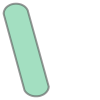

In [166]:
test_str = '
import shapely
test = shapely.from_wkt(test_str)
test

In [164]:
shapely.to_geojson(test)

'{"type":"MultiPolygon","coordinates":[[[[-122.36618779999998,37.585858],[-122.36615839999996,37.58584030000003],[-122.36616879999997,37.58582930000006],[-122.36613459999995,37.58580870000003],[-122.36621009999999,37.58572970000006],[-122.36627359999994,37.58576810000005],[-122.36626519999999,37.58577690000004],[-122.36618779999998,37.585858]]]]}'

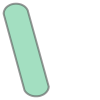

In [170]:
shapely.from_wkt('MULTIPOLYGON (((-122.049212 37.565836, -122.04921349999995 37.565836, -122.049215 37.565836, -122.04921649999994 37.565836, -122.04921749999994 37.565836, -122.049219 37.565836, -122.0492205 37.565836500000046, -122.049222 37.565836500000046, -122.04922349999998 37.565836500000046, -122.049225 37.565837, -122.049226 37.565837, -122.04922749999997 37.565837500000043, -122.049229 37.565837500000043, -122.04923049999996 37.565838, -122.04923149999996 37.565838, -122.049233 37.565838500000041, -122.04923449999995 37.565838500000041, -122.04923549999995 37.565839, -122.049237 37.565839500000038, -122.04923849999994 37.56584, -122.04924 37.56584, -122.049241 37.565840500000036, -122.0492425 37.565841, -122.04924349999999 37.565841500000033, -122.049245 37.565842, -122.049246 37.565842500000031, -122.04924749999998 37.565843, -122.049249 37.565843500000028, -122.04925 37.565844, -122.049251 37.565844500000026, -122.04925249999997 37.565845, -122.04925349999996 37.565846, -122.049255 37.565846500000077, -122.049256 37.565847, -122.049257 37.565847500000075, -122.04925849999995 37.565848500000072, -122.04925949999995 37.565849, -122.04926049999995 37.56584950000007, -122.04926149999994 37.565850500000067, -122.049263 37.565851, -122.049264 37.565852, -122.049265 37.565852500000062, -122.049266 37.56585350000006, -122.049267 37.565854, -122.049268 37.565855, -122.049269 37.565855500000055, -122.04927 37.565856500000052, -122.049271 37.56585750000005, -122.049272 37.565858, -122.049273 37.565859, -122.04927349999997 37.56586, -122.04927449999997 37.565861, -122.04927549999996 37.56586150000004, -122.04927649999996 37.565862500000037, -122.049277 37.565863500000034, -122.049278 37.565864500000032, -122.04927849999996 37.565865500000029, -122.04927949999995 37.565866500000027, -122.04928 37.565867500000024, -122.049281 37.565868500000079, -122.04928149999995 37.565869500000076, -122.04928249999995 37.565870500000074, -122.049283 37.565871500000071, -122.04928349999994 37.565872500000069, -122.049284 37.565873500000066, -122.049285 37.565875, -122.04941849999994 37.566364500000077, -122.04941849999994 37.566366, -122.04941849999994 37.566367, -122.049419 37.566368, -122.049419 37.566369, -122.049419 37.56637, -122.049419 37.566371500000059, -122.04941849999994 37.566372500000057, -122.04941849999994 37.566373500000054, -122.04941849999994 37.566374500000052, -122.04941849999994 37.566375500000049, -122.04941849999994 37.566377, -122.049418 37.566378, -122.049418 37.566379, -122.04941749999995 37.56638, -122.04941749999995 37.566381, -122.049417 37.566382, -122.049417 37.566383500000029, -122.04941649999995 37.566384500000026, -122.049416 37.566385500000024, -122.049416 37.566386500000078, -122.04941549999995 37.566387500000076, -122.049415 37.566388500000073, -122.04941449999995 37.566389500000071, -122.049414 37.566390500000068, -122.04941349999996 37.566391500000066, -122.049413 37.566392500000063, -122.04941249999996 37.566394, -122.049412 37.566395, -122.04941149999996 37.566396, -122.049411 37.566397, -122.04941049999996 37.566397500000051, -122.04941 37.566398500000048, -122.049409 37.566399500000045, -122.04940849999997 37.566400500000043, -122.049408 37.56640150000004, -122.049407 37.566402500000038, -122.04940649999998 37.566403500000035, -122.04940549999998 37.566404500000033, -122.049405 37.56640550000003, -122.049404 37.566406, -122.049403 37.566407, -122.04940249999999 37.566408, -122.04940149999999 37.566409, -122.0494005 37.566409500000077, -122.0493995 37.566410500000075, -122.049399 37.566411500000072, -122.049398 37.566412, -122.049397 37.566413, -122.049396 37.566414, -122.049395 37.566414500000064, -122.049394 37.566415500000062, -122.049393 37.566416, -122.049392 37.566417, -122.049391 37.566417500000057, -122.04939 37.566418, -122.049389 37.566419, -122.04938749999997 37.566419500000052, -122.04938649999997 37.56642, -122.04938549999997 37.566421, -122.04938449999997 37.566421500000047, -122.049383 37.566422, -122.049382 37.566422500000044, -122.049381 37.566423500000042, -122.04937949999999 37.566424, -122.04937849999999 37.566424500000039, -122.0493775 37.566425, -122.049376 37.566425500000037, -122.049375 37.566426, -122.04937349999994 37.566426500000034, -122.04937249999995 37.566427, -122.049371 37.566427500000032, -122.04937 37.566428, -122.04936849999996 37.566428, -122.049367 37.566428500000029, -122.049366 37.566429, -122.04936449999997 37.566429500000027, -122.04936349999997 37.566429500000027, -122.049362 37.56643, -122.04936049999998 37.566430500000024, -122.04935949999998 37.566430500000024, -122.049358 37.566431, -122.04935649999999 37.566431, -122.0493555 37.566431500000078, -122.049354 37.566431500000078, -122.04935249999994 37.566431500000078, -122.049351 37.566432, -122.04935 37.566432, -122.04934849999995 37.566432, -122.049347 37.566432, -122.04934549999996 37.566432500000076, -122.04934449999996 37.566432500000076, -122.049343 37.566432500000076, -122.04934149999997 37.566432500000076, -122.04934 37.566432500000076, -122.049339 37.566432500000076, -122.04933749999998 37.566432500000076, -122.049336 37.566432500000076, -122.04933449999999 37.566432500000076, -122.04933349999999 37.566432500000076, -122.049332 37.566432, -122.04933049999994 37.566432, -122.049329 37.566432, -122.049328 37.566432, -122.04932649999995 37.566431500000078, -122.049325 37.566431500000078, -122.04932349999996 37.566431, -122.04932249999996 37.566431, -122.049321 37.566431, -122.04931949999997 37.566430500000024, -122.04931849999997 37.56643, -122.049317 37.56643, -122.04931549999998 37.566429500000027, -122.04931449999998 37.566429, -122.049313 37.566429, -122.049312 37.566428500000029, -122.0493105 37.566428, -122.049309 37.566427500000032, -122.049308 37.566427500000032, -122.04930649999994 37.566427, -122.04930549999995 37.566426500000034, -122.049304 37.566426, -122.049303 37.566425500000037, -122.04930149999996 37.566425, -122.04930049999996 37.566424500000039, -122.04929949999996 37.566423500000042, -122.049298 37.566423, -122.049297 37.566422500000044, -122.049296 37.566422, -122.04929449999997 37.566421500000047, -122.04929349999998 37.566420500000049, -122.04929249999998 37.56642, -122.04929149999998 37.566419500000052, -122.04929049999998 37.566419, -122.049289 37.566418, -122.049288 37.566417500000057, -122.049287 37.566416500000059, -122.049286 37.566416, -122.049285 37.566415, -122.049284 37.566414500000064, -122.049283 37.566413500000067, -122.049282 37.566413, -122.049281 37.566412, -122.04928049999995 37.566411, -122.04927949999995 37.566410500000075, -122.04927849999996 37.566409500000077, -122.04927749999996 37.56640850000008, -122.049277 37.566408, -122.049276 37.566407, -122.049275 37.566406, -122.04927449999997 37.566405, -122.04927349999997 37.566404, -122.049273 37.566403500000035, -122.049272 37.566402500000038, -122.04927149999997 37.56640150000004, -122.04927049999998 37.566400500000043, -122.04927 37.566399500000045, -122.04926949999998 37.566398500000048, -122.049269 37.566397500000051, -122.049268 37.566396500000053, -122.04926749999998 37.566395500000056, -122.049267 37.566394500000058, -122.04926649999999 37.566393500000061, -122.049266 37.566392500000063, -122.0492655 37.566391500000066, -122.049265 37.566390500000068, -122.0492645 37.566389500000071, -122.049264 37.566388500000073, -122.0492635 37.566387500000076, -122.0492635 37.566386, -122.049129 37.565898, -122.0491295 37.565897, -122.0491295 37.565896, -122.0491295 37.56589450000007, -122.0491295 37.565893500000072, -122.04913 37.565892500000075, -122.04913 37.565891500000077, -122.04913 37.56589, -122.0491305 37.565889, -122.0491305 37.565888, -122.049131 37.565887, -122.04913149999999 37.565886, -122.04913149999999 37.565884500000038, -122.049132 37.565883500000041, -122.04913249999998 37.565882500000043, -122.049133 37.565881500000046, -122.049133 37.565880500000048, -122.04913349999998 37.565879500000051, -122.049134 37.565878, -122.04913449999998 37.565877, -122.049135 37.565876, -122.04913549999998 37.565875, -122.04913649999997 37.565874, -122.049137 37.565873, -122.04913749999997 37.565872, -122.049138 37.565871, -122.049139 37.56587, -122.04913949999997 37.565869, -122.04914 37.565868, -122.049141 37.565867, -122.04914149999996 37.565866, -122.04914249999996 37.565865, -122.049143 37.565864, -122.049144 37.565863, -122.049145 37.565862500000037, -122.04914549999995 37.56586150000004, -122.04914649999995 37.565860500000042, -122.04914749999995 37.565859500000045, -122.04914849999994 37.565859, -122.049149 37.565858, -122.04915 37.565857, -122.049151 37.565856500000052, -122.049152 37.565855500000055, -122.049153 37.565854500000057, -122.049154 37.565854, -122.049155 37.565853, -122.049156 37.565852500000062, -122.04915749999998 37.565851500000065, -122.04915849999998 37.565851, -122.04915949999997 37.56585, -122.04916049999997 37.56584950000007, -122.04916149999997 37.565848500000072, -122.049163 37.565848, -122.049164 37.565847500000075, -122.049165 37.565847, -122.04916649999996 37.565846, -122.04916749999995 37.56584550000008, -122.049169 37.565845, -122.04917 37.565844500000026, -122.049171 37.565844, -122.04917249999994 37.565843500000028, -122.0491735 37.565843, -122.049175 37.565842500000031, -122.04917649999999 37.565842, -122.04917749999998 37.565841500000033, -122.049179 37.565841, -122.04918 37.565840500000036, -122.04918149999997 37.56584, -122.049183 37.565839500000038, -122.049184 37.565839500000038, -122.04918549999996 37.565839, -122.049187 37.565838500000041, -122.049188 37.565838500000041, -122.04918949999995 37.565838, -122.049191 37.565837500000043, -122.04919249999995 37.565837500000043, -122.049194 37.565837, -122.049195 37.565837, -122.0491965 37.565837, -122.049198 37.565836500000046, -122.04919949999999 37.565836500000046, -122.04920049999998 37.565836500000046, -122.049202 37.565836, -122.04920349999998 37.565836, -122.049205 37.565836, -122.04920649999997 37.565836, -122.049208 37.565836, -122.049209 37.565836, -122.04921049999996 37.565836, -122.049212 37.565836)))')

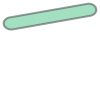

In [169]:
shapely.from_wkt('MULTIPOLYGON (((-122.05064749999997 37.565892, -122.05064849999997 37.565892, -122.05065 37.565892, -122.05065149999996 37.565892, -122.05065249999996 37.565892, -122.050654 37.565892, -122.050655 37.565892500000075, -122.05065649999995 37.565892500000075, -122.050658 37.565892500000075, -122.050659 37.565893, -122.0506605 37.565893, -122.0506615 37.565893, -122.050663 37.565893500000072, -122.05066449999998 37.565893500000072, -122.05066549999998 37.565894, -122.050667 37.565894, -122.050668 37.56589450000007, -122.05066949999997 37.565895, -122.05067049999997 37.565895, -122.050672 37.565895500000067, -122.050673 37.565896, -122.05067449999996 37.565896500000065, -122.05067549999995 37.565896500000065, -122.05067649999995 37.565897, -122.050678 37.565897500000062, -122.050679 37.565898, -122.05068049999994 37.56589850000006, -122.05068149999994 37.565899, -122.0506825 37.565899500000057, -122.050684 37.5659, -122.050685 37.565900500000055, -122.050686 37.565901, -122.050687 37.565901500000052, -122.050688 37.56590250000005, -122.05068949999998 37.565903, -122.05069049999997 37.565903500000047, -122.05069149999997 37.565904, -122.05069249999997 37.565905, -122.05069349999997 37.565905500000042, -122.05069449999996 37.565906, -122.05069549999996 37.565907, -122.05069649999996 37.565907500000037, -122.05069749999996 37.565908500000035, -122.05069849999995 37.565909, -122.05069949999995 37.56591, -122.05070049999995 37.56591050000003, -122.050701 37.565911500000027, -122.050702 37.565912, -122.050703 37.565913, -122.050704 37.565913500000079, -122.0507045 37.565914500000076, -122.0507055 37.565915500000074, -122.050706 37.565916, -122.050707 37.565917, -122.05070749999999 37.565918, -122.05070849999998 37.565918500000066, -122.050709 37.565919500000064, -122.05071 37.565920500000061, -122.05071049999998 37.565921500000059, -122.050711 37.565922500000056, -122.050712 37.565923, -122.05071249999997 37.565924, -122.050713 37.565925, -122.05071349999997 37.565926, -122.050714 37.565927, -122.050715 37.565928, -122.05071549999997 37.565929, -122.050716 37.56593, -122.05071649999996 37.565931, -122.05071649999996 37.565932, -122.050717 37.565933, -122.05071749999996 37.565934, -122.050718 37.565935, -122.05071849999996 37.565936, -122.05071849999996 37.565937, -122.050719 37.565938, -122.05071949999996 37.565939, -122.05071949999996 37.56594, -122.05072 37.565941, -122.05072 37.565942, -122.05072 37.565943, -122.05072049999995 37.565944, -122.05072049999995 37.565945, -122.05072049999995 37.565946, -122.050721 37.565947, -122.050721 37.565948500000047, -122.050721 37.565949500000045, -122.050721 37.565950500000042, -122.050721 37.56595150000004, -122.050721 37.565952500000037, -122.050721 37.565953500000035, -122.050721 37.565954500000032, -122.050721 37.56595550000003, -122.050721 37.565956500000027, -122.05072049999995 37.565957500000025, -122.05072049999995 37.565959, -122.05072049999995 37.56596, -122.05072049999995 37.565961, -122.05072 37.565962, -122.05072 37.565963, -122.05071949999996 37.565964, -122.05071949999996 37.565965, -122.050719 37.565966, -122.05071849999996 37.565967, -122.05071849999996 37.565968, -122.050718 37.565969, -122.05071749999996 37.56597, -122.050717 37.565971, -122.050717 37.565972, -122.05071649999996 37.565973, -122.050716 37.565974, -122.05071549999997 37.565975, -122.050715 37.565976, -122.05071449999997 37.565977, -122.05071349999997 37.565978, -122.050713 37.565979, -122.05071249999997 37.56598, -122.050712 37.56598050000008, -122.05071149999998 37.565981500000078, -122.05071049999998 37.565982500000075, -122.05071 37.565983500000073, -122.05070949999998 37.56598450000007, -122.05070849999998 37.565985, -122.050708 37.565986, -122.050707 37.565987, -122.0507065 37.565988, -122.0507055 37.56598850000006, -122.0507045 37.565989500000057, -122.050704 37.565990500000055, -122.050703 37.565991, -122.050702 37.565992, -122.050701 37.56599250000005, -122.05070049999995 37.565993500000047, -122.05069949999995 37.565994, -122.05069849999995 37.565995, -122.05069749999996 37.565995500000042, -122.05069649999996 37.56599650000004, -122.05069549999996 37.565997, -122.05069449999996 37.565998, -122.05069349999997 37.565998500000035, -122.05069249999997 37.565999, -122.05069149999997 37.566, -122.05069049999997 37.56600050000003, -122.05068949999998 37.566001, -122.05068849999998 37.566001500000027, -122.050687 37.566002, -122.050686 37.566003, -122.050685 37.566003500000079, -122.050684 37.566004, -122.0506825 37.566004500000076, -122.05068149999994 37.566005, -122.05068049999994 37.566005500000074, -122.050679 37.566006, -122.050678 37.566006500000071, -122.050677 37.566007, -122.05067549999995 37.566007, -122.05067449999996 37.566007500000069, -122.050673 37.566008, -122.050672 37.566008500000066, -122.05067049999997 37.566009, -122.05066949999997 37.566009, -122.050668 37.566009500000064, -122.050667 37.56601, -122.05066549999998 37.56601, -122.05066349999998 37.566010500000061, -122.049892 37.566145500000061, -122.04989049999995 37.566145500000061, -122.049889 37.566146, -122.049888 37.566146, -122.04988649999996 37.566146, -122.04988549999996 37.566146, -122.049884 37.566146, -122.04988249999997 37.566146, -122.04988149999997 37.566146, -122.04988 37.566146, -122.04987849999998 37.566145500000061, -122.04987749999998 37.566145500000061, -122.049876 37.566145500000061, -122.049875 37.566145500000061, -122.0498735 37.566145500000061, -122.049872 37.566145, -122.049871 37.566145, -122.04986949999994 37.566144500000064, -122.04986849999995 37.566144500000064, -122.049867 37.566144500000064, -122.04986549999995 37.566144, -122.04986449999996 37.566143500000067, -122.049863 37.566143500000067, -122.049862 37.566143, -122.04986049999997 37.566143, -122.04985949999997 37.566142500000069, -122.049858 37.566142, -122.049857 37.566141500000072, -122.04985549999998 37.566141500000072, -122.04985449999998 37.566141, -122.04985349999998 37.566140500000074, -122.049852 37.56614, -122.049851 37.566139500000077, -122.0498495 37.566139, -122.04984849999994 37.566138500000079, -122.04984749999994 37.566138, -122.04984649999994 37.566137500000025, -122.049845 37.566137, -122.049844 37.566136500000027, -122.049843 37.566136, -122.049842 37.56613550000003, -122.049841 37.566134500000032, -122.04983949999996 37.566134, -122.04983849999996 37.566133500000035, -122.04983749999997 37.566133, -122.04983649999997 37.566132, -122.04983549999997 37.56613150000004, -122.04983449999997 37.566131, -122.04983349999998 37.56613, -122.04983249999998 37.566129500000045, -122.04983149999998 37.566128500000048, -122.049831 37.566128, -122.04983 37.566127, -122.049829 37.566126500000053, -122.049828 37.566125500000055, -122.049827 37.566125, -122.0498265 37.566124, -122.04982549999994 37.566123, -122.04982449999994 37.566122500000063, -122.049824 37.566121500000065, -122.049823 37.566120500000068, -122.04982249999995 37.56612, -122.04982149999995 37.566119, -122.049821 37.566118, -122.04982 37.566117, -122.04981949999996 37.566116500000078, -122.049819 37.56611550000008, -122.04981849999996 37.566114500000026, -122.04981749999996 37.566113500000029, -122.049817 37.566112500000031, -122.04981649999996 37.566111500000034, -122.049816 37.566110500000036, -122.04981549999997 37.566109500000039, -122.049815 37.566109, -122.04981449999997 37.566108, -122.049814 37.566107, -122.04981349999997 37.566106, -122.049813 37.566105, -122.04981249999997 37.566104, -122.049812 37.566103, -122.049812 37.566102, -122.04981149999998 37.566101, -122.049811 37.5661, -122.049811 37.566099, -122.04981049999998 37.566097500000069, -122.04981049999998 37.566096500000072, -122.04981 37.566095500000074, -122.04981 37.566094500000077, -122.04981 37.566093500000079, -122.04980949999998 37.566092500000025, -122.04980949999998 37.566091500000027, -122.04980949999998 37.56609050000003, -122.04980949999998 37.566089500000032, -122.049809 37.566088500000035, -122.049809 37.566087500000037, -122.049809 37.56608650000004, -122.049809 37.566085, -122.049809 37.566084, -122.049809 37.566083, -122.04980949999998 37.566082, -122.04980949999998 37.566081, -122.04980949999998 37.56608, -122.04980949999998 37.566079, -122.04981 37.566078, -122.04981 37.566077, -122.04981 37.566076, -122.04981049999998 37.566075, -122.04981049999998 37.566074, -122.049811 37.566072500000075, -122.049811 37.566071500000078, -122.04981149999998 37.56607050000008, -122.049812 37.566069500000026, -122.04981249999997 37.566068500000029, -122.04981249999997 37.566067500000031, -122.049813 37.566066500000034, -122.04981349999997 37.566065500000036, -122.049814 37.566064500000039, -122.04981449999997 37.566063500000041, -122.049815 37.566062500000044, -122.04981549999997 37.566062, -122.049816 37.566061, -122.04981649999996 37.56606, -122.049817 37.566059, -122.04981749999996 37.566058, -122.04981849999996 37.566057, -122.049819 37.566056, -122.04981949999996 37.566055, -122.04982049999995 37.566054500000064, -122.049821 37.566053500000066, -122.04982149999995 37.566052500000069, -122.04982249999995 37.566051500000071, -122.049823 37.566051, -122.049824 37.56605, -122.049825 37.566049, -122.04982549999994 37.566048500000079, -122.0498265 37.566047500000025, -122.0498275 37.566046500000027, -122.049828 37.566046, -122.049829 37.566045, -122.04983 37.566044500000032, -122.049831 37.566043500000035, -122.049832 37.566043, -122.04983249999998 37.566042, -122.04983349999998 37.56604150000004, -122.04983449999997 37.566040500000042, -122.04983549999997 37.56604, -122.04983649999997 37.566039500000045, -122.04983749999997 37.566038500000047, -122.04983849999996 37.566038, -122.04984 37.56603750000005, -122.049841 37.566037, -122.049842 37.566036, -122.049843 37.566035500000055, -122.049844 37.566035, -122.04984549999995 37.566034500000058, -122.04984649999994 37.566034, -122.04984749999994 37.56603350000006, -122.04984849999994 37.566033, -122.04985 37.566032500000063, -122.049851 37.566032, -122.049852 37.566031500000065, -122.04985349999998 37.566031, -122.04985449999998 37.566030500000068, -122.049856 37.56603, -122.049857 37.56603, -122.04985849999997 37.56602950000007, -122.04985949999997 37.566029, -122.049861 37.566029, -122.049862 37.566028500000073, -122.049864 37.566028, -122.050637 37.565892, -122.050638 37.565892, -122.05063949999999 37.565892, -122.05064049999999 37.565892, -122.050642 37.565892, -122.05064349999998 37.565892, -122.05064449999998 37.565892, -122.050646 37.565892, -122.05064749999997 37.565892)))')

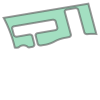

In [168]:
shapely.from_wkt('MULTIPOLYGON (((-122.04878449999995 37.565875500000061, -122.04880049999997 37.565876500000059, -122.04881649999999 37.565876500000059, -122.048832 37.565876500000059, -122.048848 37.565876500000059, -122.048864 37.565876, -122.04888 37.565875500000061, -122.048896 37.565875, -122.04891149999997 37.565874, -122.0489275 37.565872500000069, -122.04894349999995 37.565871, -122.048959 37.565869500000076, -122.048961 37.565869, -122.04896249999996 37.565869, -122.04896349999996 37.565869, -122.048965 37.565869, -122.048966 37.565869, -122.048967 37.565869, -122.04896849999994 37.565868500000079, -122.04896949999994 37.565868500000079, -122.048971 37.565868500000079, -122.048972 37.565868500000079, -122.04897349999999 37.565869, -122.04897449999999 37.565869, -122.048976 37.565869, -122.048977 37.565869, -122.04897849999998 37.565869, -122.04897949999997 37.565869, -122.048981 37.565869500000076, -122.048982 37.565869500000076, -122.048983 37.565869500000076, -122.04898449999996 37.56587, -122.04898549999996 37.56587, -122.048987 37.565870500000074, -122.048988 37.565870500000074, -122.048989 37.565870500000074, -122.04899049999995 37.565871, -122.04899149999994 37.565871500000071, -122.04899249999994 37.565871500000071, -122.048994 37.565872, -122.048995 37.565872500000069, -122.048996 37.565872500000069, -122.04899749999998 37.565873, -122.04899849999998 37.565873500000066, -122.04899949999998 37.565874, -122.04900049999998 37.565874, -122.049002 37.565874500000064, -122.049003 37.565875, -122.049004 37.565875500000061, -122.049005 37.565876, -122.049006 37.565876500000059, -122.049007 37.565877, -122.04900849999996 37.565877500000056, -122.04900949999995 37.565878, -122.04901049999995 37.565878500000053, -122.04901149999995 37.565879, -122.04901249999995 37.565879500000051, -122.04901349999994 37.565880500000048, -122.04901449999994 37.565881, -122.04901549999994 37.565881500000046, -122.049016 37.565882, -122.049017 37.565883, -122.049018 37.565883500000041, -122.049019 37.565884, -122.04902 37.565885, -122.04902049999998 37.565885500000036, -122.04902149999998 37.565886, -122.04902249999998 37.565887, -122.049023 37.565887500000031, -122.049024 37.565888500000028, -122.049025 37.565889, -122.04902549999997 37.56589, -122.04902649999997 37.56589050000008, -122.049027 37.565891500000077, -122.049028 37.565892500000075, -122.04902849999996 37.565893, -122.04902949999996 37.565894, -122.04903 37.56589450000007, -122.04903049999996 37.565895500000067, -122.049031 37.565896500000065, -122.049032 37.565897, -122.04903249999995 37.565898, -122.049033 37.565899, -122.04903349999995 37.5659, -122.049034 37.565900500000055, -122.04903449999995 37.565901500000052, -122.049035 37.56590250000005, -122.04903549999995 37.565903500000047, -122.049036 37.565904500000045, -122.04903649999994 37.565905, -122.049037 37.565906, -122.04903749999994 37.565907, -122.04903749999994 37.565908, -122.049038 37.565909, -122.0490385 37.56591, -122.0490385 37.565911, -122.049039 37.565912, -122.0490395 37.565913, -122.0490395 37.565913500000079, -122.04919149999995 37.566474, -122.049192 37.566476, -122.04919249999995 37.566477, -122.049193 37.566477500000076, -122.04919349999994 37.566478500000073, -122.04919349999994 37.566479500000071, -122.049194 37.566480500000068, -122.04919449999994 37.566481500000066, -122.049195 37.566482, -122.04919549999994 37.566483, -122.049196 37.566484, -122.0491965 37.566485, -122.049197 37.566485500000056, -122.0491975 37.566486500000053, -122.049198 37.566487500000051, -122.04919849999999 37.566488, -122.049199 37.566489, -122.0492 37.566489500000046, -122.04920049999998 37.566490500000043, -122.049201 37.566491500000041, -122.049202 37.566492, -122.04920249999998 37.566493, -122.049203 37.566493500000036, -122.049204 37.566494500000033, -122.04920449999997 37.566495, -122.04920549999997 37.566496, -122.049206 37.566496500000028, -122.049207 37.566497500000025, -122.04920749999997 37.566498, -122.04920849999996 37.56649850000008, -122.04920949999996 37.566499500000077, -122.04921 37.5665, -122.049211 37.566500500000075, -122.049212 37.566501500000072, -122.049213 37.566502, -122.04921349999995 37.56650250000007, -122.04921449999995 37.566503, -122.04921549999995 37.566504, -122.04921649999994 37.566504500000065, -122.04921749999994 37.566505, -122.0492185 37.566505500000062, -122.0492195 37.566506, -122.0492205 37.56650650000006, -122.04922149999999 37.566507, -122.04922249999998 37.566507500000057, -122.04922349999998 37.566508, -122.04922449999998 37.566508500000054, -122.04922549999998 37.566509, -122.04922649999997 37.566509500000052, -122.04922749999997 37.56651, -122.04922849999997 37.566510500000049, -122.04922949999997 37.566510500000049, -122.049231 37.566511, -122.049232 37.566511500000047, -122.049233 37.566512, -122.049234 37.566512, -122.049235 37.566512500000044, -122.04923649999995 37.566513, -122.04923749999995 37.566513, -122.04923849999994 37.566513500000042, -122.04923949999994 37.566513500000042, -122.049241 37.566514, -122.049242 37.566514, -122.049243 37.566514500000039, -122.04924449999999 37.566514500000039, -122.04924549999998 37.566514500000039, -122.04924649999998 37.566515, -122.049248 37.566515, -122.049249 37.566515, -122.04925 37.566515, -122.04925149999997 37.566515500000037, -122.04925249999997 37.566515500000037, -122.049254 37.566515500000037, -122.049255 37.566515500000037, -122.049256 37.566515500000037, -122.04925749999995 37.566515500000037, -122.04925849999995 37.566515500000037, -122.04925949999995 37.566515500000037, -122.049261 37.566515500000037, -122.049262 37.566515500000037, -122.0492635 37.566515500000037, -122.0492645 37.566515500000037, -122.04947449999997 37.566480500000068, -122.04947649999997 37.56648, -122.04947749999997 37.56648, -122.04947849999996 37.566479500000071, -122.04947949999996 37.566479500000071, -122.04948049999996 37.566479, -122.049482 37.566479, -122.049483 37.566478500000073, -122.049484 37.566478500000073, -122.049485 37.566478, -122.049486 37.566478, -122.049487 37.566477500000076, -122.049488 37.566477500000076, -122.049489 37.566477, -122.04949 37.566476500000078, -122.049491 37.566476, -122.049492 37.566476, -122.049493 37.566475500000024, -122.049494 37.566475, -122.049495 37.566474500000027, -122.049496 37.566474, -122.04949649999998 37.566473500000029, -122.04949749999997 37.566473, -122.04949849999997 37.566473, -122.04949949999997 37.566472500000032, -122.04950049999997 37.566472, -122.04950149999996 37.566471500000034, -122.049502 37.566470500000037, -122.049503 37.56647, -122.049504 37.566469500000039, -122.04950449999995 37.566469, -122.04950549999995 37.566468500000042, -122.04950649999995 37.566468, -122.049507 37.566467500000044, -122.049508 37.566466500000047, -122.04950849999994 37.566466, -122.04950949999994 37.566465500000049, -122.04951 37.566465, -122.049511 37.566464, -122.0495115 37.566463500000054, -122.0495125 37.566463, -122.049513 37.566462, -122.04951349999999 37.566461500000059, -122.04951449999999 37.566461, -122.049515 37.56646, -122.04951549999998 37.566459500000065, -122.04951649999998 37.566458500000067, -122.049517 37.566458, -122.04951749999998 37.566457, -122.049518 37.566456500000072, -122.04951849999998 37.566455500000075, -122.049519 37.566455, -122.04951949999997 37.566454, -122.04952 37.56645350000008, -122.04952049999997 37.566452500000025, -122.049521 37.566452, -122.04952149999997 37.566451, -122.049522 37.56645, -122.04952249999997 37.566449500000033, -122.04952249999997 37.566448500000035, -122.049523 37.566448, -122.04952349999996 37.566447, -122.049524 37.566446, -122.049524 37.566445500000043, -122.04952449999996 37.566444500000046, -122.04952449999996 37.566443500000048, -122.049525 37.566443, -122.049525 37.566442, -122.04952549999996 37.566441, -122.04952549999996 37.56644, -122.049526 37.566439500000058, -122.049526 37.566438500000061, -122.049526 37.566437500000063, -122.04952649999996 37.566437, -122.04952649999996 37.566436, -122.04952649999996 37.566435, -122.04952649999996 37.566434, -122.04952649999996 37.566433500000073, -122.04952649999996 37.566432500000076, -122.04952649999996 37.566431500000078, -122.04952649999996 37.566430500000024, -122.04952649999996 37.56643, -122.04952649999996 37.566429, -122.04952649999996 37.566428, -122.04952649999996 37.566427, -122.04952649999996 37.566426500000034, -122.04952649999996 37.566425500000037, -122.049526 37.566424500000039, -122.049526 37.566423500000042, -122.049526 37.566423, -122.04952549999996 37.566422, -122.04952549999996 37.566421, -122.049525 37.566420500000049, -122.049525 37.566419500000052, -122.04952449999996 37.566418500000054, -122.0493765 37.565867500000024, -122.049376 37.565866, -122.049376 37.565865, -122.04937549999994 37.565864, -122.049375 37.565863, -122.049375 37.565862500000037, -122.04937449999994 37.56586150000004, -122.04937449999994 37.565860500000042, -122.049374 37.565859500000045, -122.049374 37.565858500000047, -122.04937349999994 37.56585750000005, -122.04937349999994 37.565856500000052, -122.04937349999994 37.565855500000055, -122.04937349999994 37.565854500000057, -122.049373 37.56585350000006, -122.049373 37.565852500000062, -122.049373 37.565851500000065, -122.049373 37.565850500000067, -122.049373 37.56584950000007, -122.049373 37.565848500000072, -122.049373 37.565847500000075, -122.049373 37.565846500000077, -122.04937349999994 37.56584550000008, -122.04937349999994 37.565844500000026, -122.04937349999994 37.565843500000028, -122.04937349999994 37.565842500000031, -122.049374 37.565841500000033, -122.049374 37.565840500000036, -122.049374 37.565839500000038, -122.04937449999994 37.565838500000041, -122.04937449999994 37.565837500000043, -122.049375 37.565836500000046, -122.04937549999994 37.565835500000048, -122.04937549999994 37.565834500000051, -122.049376 37.565833500000053, -122.0493765 37.565832500000056, -122.0493765 37.565831500000058, -122.049377 37.565831, -122.0493775 37.56583, -122.049378 37.565829, -122.04937849999999 37.565828, -122.049379 37.565827, -122.04937949999999 37.565826, -122.04938 37.565825, -122.04938049999998 37.565824500000076, -122.049381 37.565823500000079, -122.04938149999998 37.565822500000024, -122.04938249999998 37.565821500000027, -122.049383 37.565821, -122.04938349999998 37.56582, -122.049384 37.565819, -122.049385 37.565818500000034, -122.04938549999997 37.565817500000037, -122.04938649999997 37.565816500000039, -122.049387 37.565816, -122.049388 37.565815, -122.04938849999996 37.565814, -122.04938949999996 37.565813500000047, -122.04939 37.56581250000005, -122.049391 37.565812, -122.049392 37.565811, -122.04939249999995 37.565810500000055, -122.04939349999995 37.565809500000057, -122.04939449999995 37.565809, -122.04939549999995 37.56580850000006, -122.049396 37.565807500000062, -122.049397 37.565807, -122.049398 37.565806500000065, -122.049399 37.565805500000067, -122.0494 37.565805, -122.049401 37.56580450000007, -122.049402 37.565804, -122.049403 37.565803, -122.049404 37.565802500000075, -122.049405 37.565802, -122.049406 37.565801500000077, -122.049407 37.565801, -122.049408 37.56580050000008, -122.04940949999997 37.5658, -122.04941049999996 37.565799500000026, -122.04941149999996 37.565799, -122.04941249999996 37.565798500000028, -122.04941349999996 37.565798, -122.049415 37.565797500000031, -122.049416 37.565797500000031, -122.049417 37.565797, -122.04941849999994 37.565796500000033, -122.04941949999994 37.565796, -122.04942049999994 37.565796, -122.049422 37.565795500000036, -122.049423 37.565795, -122.04942449999999 37.565795, -122.04950449999995 37.565779500000076, -122.049523 37.565776500000027, -122.0495355 37.565774, -122.049548 37.565771500000039, -122.04956049999998 37.565769, -122.049573 37.565766, -122.04958549999998 37.565763, -122.04959749999995 37.56576, -122.04960949999997 37.565756500000077, -122.049622 37.565753, -122.049634 37.565749, -122.04964549999994 37.565745500000048, -122.04965749999997 37.565741500000058, -122.0496695 37.565737, -122.049681 37.565733, -122.0496925 37.565728500000034, -122.049704 37.565723500000047, -122.0497155 37.565719, -122.04972649999996 37.565714, -122.0497375 37.565708500000028, -122.04974849999996 37.565703500000041, -122.0497595 37.565698, -122.04978 37.565686500000027, -122.049791 37.565681, -122.04980149999994 37.565675500000054, -122.04981249999997 37.56567, -122.04982349999995 37.565665, -122.04983449999997 37.56566, -122.04984549999995 37.565655, -122.049857 37.565650500000061, -122.04986849999995 37.565646, -122.04988 37.565641500000027, -122.04989149999994 37.565637, -122.049903 37.565633, -122.049915 37.565629500000057, -122.049927 37.565625500000067, -122.049939 37.565622, -122.049951 37.565618500000028, -122.049963 37.565615500000035, -122.049975 37.565612500000043, -122.04998749999999 37.565609500000051, -122.04999949999996 37.565606500000058, -122.05010449999997 37.565590500000042, -122.050106 37.56559, -122.05010749999997 37.56559, -122.05010849999996 37.565589500000044, -122.05010949999996 37.565589, -122.050111 37.565589, -122.050112 37.565588500000047, -122.050113 37.565588500000047, -122.05011449999995 37.565588, -122.05011549999995 37.565588, -122.05011649999994 37.565588, -122.050118 37.565587500000049, -122.050119 37.565587500000049, -122.0501205 37.565587500000049, -122.05012149999999 37.565587, -122.05012249999999 37.565587, -122.050124 37.565587, -122.050125 37.565587, -122.05012649999998 37.565587, -122.05012749999997 37.565587, -122.050129 37.565587, -122.05013 37.565587, -122.050131 37.565587, -122.05013249999996 37.565587, -122.05013349999996 37.565587, -122.050135 37.565587, -122.050136 37.565587, -122.05013749999995 37.565587, -122.05013849999995 37.565587, -122.05013949999994 37.565587500000049, -122.050141 37.565587500000049, -122.050142 37.565587500000049, -122.0501435 37.565588, -122.05014449999999 37.565588, -122.05014549999999 37.565588, -122.050147 37.565588500000047, -122.050148 37.565588500000047, -122.050149 37.565589, -122.05015049999997 37.565589, -122.05015149999997 37.565589500000044, -122.05015249999997 37.565589500000044, -122.050154 37.56559, -122.050155 37.565590500000042, -122.050156 37.565591, -122.05015749999995 37.565591, -122.05015849999995 37.565591500000039, -122.05015949999995 37.565592, -122.05016049999995 37.565592500000037, -122.05016149999994 37.565593, -122.050163 37.565593, -122.050164 37.565593500000034, -122.050165 37.565594, -122.050166 37.565594500000032, -122.050167 37.565595, -122.050168 37.565595500000029, -122.050169 37.565596, -122.05017 37.565596500000026, -122.050171 37.565597500000024, -122.050172 37.565598, -122.050173 37.565598500000078, -122.050174 37.565599, -122.050175 37.565599500000076, -122.050176 37.565600500000073, -122.05017649999996 37.565601, -122.05017749999996 37.565601500000071, -122.05017849999996 37.565602500000068, -122.05017949999996 37.565603, -122.05018 37.565603500000066, -122.050181 37.565604500000063, -122.050182 37.565605, -122.05018249999995 37.565606, -122.05018349999995 37.565606500000058, -122.05018449999994 37.565607, -122.050185 37.565608, -122.050186 37.565609, -122.0501865 37.565609500000051, -122.050187 37.565610500000048, -122.050188 37.565611, -122.0501885 37.565612, -122.05018949999999 37.565613, -122.05019 37.56561350000004, -122.05019049999999 37.565614500000038, -122.050191 37.565615500000035, -122.05019149999998 37.565616, -122.05019249999998 37.565617, -122.050193 37.565618, -122.05019349999998 37.565618500000028, -122.050194 37.565619500000025, -122.05019449999998 37.56562050000008, -122.050195 37.565621500000077, -122.05019549999997 37.565622500000075, -122.05019549999997 37.565623, -122.050196 37.565624, -122.05019649999997 37.565625, -122.050197 37.565626, -122.050197 37.565627, -122.050249 37.565828, -122.05024949999995 37.565829500000063, -122.05025 37.565830500000061, -122.05025 37.565831500000058, -122.05025 37.565832500000056, -122.05025049999995 37.565833500000053, -122.05025049999995 37.565834500000051, -122.050251 37.565835, -122.050251 37.565836, -122.050251 37.565837, -122.050251 37.565838, -122.050251 37.565839, -122.05025149999994 37.56584, -122.05025149999994 37.565840500000036, -122.05025149999994 37.565841500000033, -122.05025149999994 37.565842500000031, -122.05025149999994 37.565843500000028, -122.05025149999994 37.565844500000026, -122.050251 37.56584550000008, -122.050251 37.565846, -122.050251 37.565847, -122.050251 37.565848, -122.050251 37.565849, -122.05025049999995 37.56585, -122.05025049999995 37.565851, -122.05025 37.565851500000065, -122.05025 37.565852500000062, -122.05025 37.56585350000006, -122.05024949999995 37.565854500000057, -122.050249 37.565855500000055, -122.050249 37.565856, -122.05024849999995 37.565857, -122.05024849999995 37.565858, -122.050248 37.565859, -122.05024749999995 37.565859500000045, -122.050247 37.565860500000042, -122.05024649999996 37.56586150000004, -122.05024649999996 37.565862500000037, -122.050246 37.565863, -122.05024549999996 37.565864, -122.050245 37.565865, -122.05024449999996 37.565865500000029, -122.050244 37.565866500000027, -122.05024349999997 37.565867500000024, -122.05024249999997 37.565868, -122.050242 37.565869, -122.05024149999997 37.565869500000076, -122.050241 37.565870500000074, -122.05024049999997 37.565871500000071, -122.05023949999998 37.565872, -122.050239 37.565873, -122.05023849999998 37.565873500000066, -122.05023749999998 37.565874500000064, -122.050237 37.565875, -122.050236 37.565876, -122.05023549999999 37.565876500000059, -122.05023449999999 37.565877, -122.050234 37.565878, -122.050233 37.565878500000053, -122.0502325 37.565879, -122.05023149999994 37.56588, -122.05023049999994 37.565880500000048, -122.05023 37.565881, -122.050229 37.565881500000046, -122.050228 37.565882500000043, -122.050227 37.565883, -122.050226 37.565883500000041, -122.05022549999995 37.565884, -122.05022449999996 37.565884500000038, -122.05022349999996 37.565885, -122.05022249999996 37.565885500000036, -122.05022149999996 37.565886, -122.05022049999997 37.565886500000033, -122.05021949999997 37.565887, -122.05021849999997 37.565887500000031, -122.05021749999997 37.565888, -122.05021649999998 37.565888500000028, -122.05021549999998 37.565889, -122.05021449999998 37.565889500000026, -122.05021349999998 37.56589, -122.05021249999999 37.56589, -122.05021149999999 37.56589050000008, -122.0502105 37.565891, -122.050209 37.565891500000077, -122.050208 37.565891500000077, -122.050207 37.565892, -122.050206 37.565892500000075, -122.050205 37.565892500000075, -122.05020349999995 37.565893, -122.05020249999995 37.565893, -122.049758 37.565969, -122.049756 37.565969500000051, -122.04975449999995 37.56597, -122.04975349999995 37.565970500000049, -122.049752 37.565971, -122.049751 37.565971500000046, -122.04975 37.565972, -122.04974849999996 37.565972500000044, -122.04974749999997 37.565973, -122.04974649999997 37.565973500000041, -122.04974549999997 37.565974, -122.049744 37.565974500000038, -122.049743 37.565975, -122.049742 37.565975500000036, -122.049741 37.565976500000033, -122.04974 37.565977, -122.049739 37.565977500000031, -122.049738 37.565978500000028, -122.049737 37.565979, -122.049736 37.565979500000026, -122.049735 37.56598050000008, -122.049734 37.565981, -122.049733 37.565982, -122.049732 37.565982500000075, -122.049731 37.565983500000073, -122.04973 37.565984, -122.049729 37.565985, -122.04972849999996 37.565985500000068, -122.04972749999996 37.565986500000065, -122.04972649999996 37.565987, -122.049726 37.565988, -122.049725 37.565989, -122.04972449999997 37.565989500000057, -122.04972349999997 37.565990500000055, -122.049723 37.565991500000052, -122.049722 37.56599250000005, -122.04972149999998 37.565993, -122.04972049999998 37.565994, -122.04972 37.565995, -122.04971949999998 37.565996, -122.04971849999998 37.565997, -122.049718 37.565998, -122.04971749999999 37.565998500000035, -122.049717 37.565999500000032, -122.04971649999999 37.56600050000003, -122.049716 37.566001500000027, -122.0497155 37.566002500000025, -122.049715 37.566003500000079, -122.0497145 37.566004500000076, -122.049714 37.566005500000074, -122.04971349999994 37.566006500000071, -122.049713 37.566007500000069, -122.049713 37.566008500000066, -122.04971249999994 37.566009500000064, -122.049712 37.566010500000061, -122.049712 37.566011500000059, -122.04971149999994 37.566012500000056, -122.04971149999994 37.566013500000054, -122.049711 37.566014500000051, -122.049711 37.566015500000049, -122.04971049999995 37.566016500000046, -122.04971049999995 37.566018, -122.04971049999995 37.566019, -122.04971049999995 37.56602, -122.04971 37.566021, -122.04971 37.566022, -122.04971 37.566023, -122.04971 37.566024, -122.04971 37.566025, -122.04971 37.566026, -122.04971 37.566027, -122.04971 37.566028, -122.04971 37.56602950000007, -122.04971049999995 37.566030500000068, -122.049753 37.566189500000064, -122.04975349999995 37.566190500000062, -122.049754 37.566191500000059, -122.04975449999995 37.566192500000056, -122.049755 37.566193500000054, -122.04975549999995 37.566194, -122.049756 37.566195, -122.04975649999994 37.566196, -122.049757 37.566197, -122.049758 37.566198, -122.04975849999994 37.566198500000041, -122.049759 37.566199500000039, -122.04976 37.566200500000036, -122.0497605 37.566201500000034, -122.049761 37.566202, -122.049762 37.566203, -122.04976249999999 37.566204, -122.04976349999998 37.566204500000026, -122.049764 37.566205500000081, -122.049765 37.566206, -122.04976549999998 37.566207, -122.04976649999998 37.566207500000075, -122.04976749999997 37.566208500000073, -122.049768 37.566209, -122.049769 37.56621, -122.04977 37.566210500000068, -122.049771 37.566211500000065, -122.049772 37.566212, -122.04977249999996 37.566213, -122.04977349999996 37.56621350000006, -122.04977449999996 37.566214, -122.04977549999995 37.566215, -122.04977649999995 37.566215500000055, -122.04977749999995 37.566216, -122.04977849999995 37.566216500000053, -122.04977949999994 37.566217, -122.04978049999994 37.566218, -122.049782 37.566218500000048, -122.049783 37.566219, -122.049784 37.566219500000045, -122.049785 37.56622, -122.049786 37.566220500000043, -122.049787 37.566221, -122.04978849999998 37.56622150000004, -122.04978949999997 37.566222, -122.04979049999997 37.566222500000038, -122.049792 37.566222500000038, -122.049793 37.566223, -122.049794 37.566223500000035, -122.04979549999996 37.566224, -122.04979649999996 37.566224, -122.04979749999995 37.566224500000033, -122.049799 37.566225, -122.0498 37.566225, -122.04980149999994 37.56622550000003, -122.04980249999994 37.566226, -122.049804 37.566226, -122.049805 37.566226500000027, -122.04980649999999 37.566226500000027, -122.04980749999999 37.566226500000027, -122.04980849999998 37.566227, -122.04981 37.566227, -122.04981149999998 37.566227, -122.04981249999997 37.566227500000025, -122.049814 37.566227500000025, -122.049815 37.566227500000025, -122.04981649999996 37.566227500000025, -122.04981749999996 37.566227500000025, -122.049819 37.566227500000025, -122.04982 37.566228, -122.04982149999995 37.566228, -122.04982249999995 37.566228, -122.049824 37.566228, -122.049825 37.566227500000025, -122.0498265 37.566227500000025, -122.0498275 37.566227500000025, -122.049829 37.566227500000025, -122.04983049999998 37.566227500000025, -122.04983149999998 37.566227500000025, -122.049833 37.566227, -122.050783 37.566065500000036, -122.05078449999996 37.566065, -122.05078549999996 37.566065, -122.05078649999996 37.566065, -122.05078749999996 37.566064500000039, -122.05078849999995 37.566064500000039, -122.05078949999995 37.566064, -122.05079049999995 37.566064, -122.05079149999995 37.566064, -122.05079249999994 37.566063500000041, -122.050794 37.566063500000041, -122.050795 37.566063, -122.050796 37.566062500000044, -122.050797 37.566062500000044, -122.050798 37.566062, -122.050799 37.566061500000046, -122.0508 37.566061500000046, -122.050801 37.566061, -122.050802 37.566060500000049, -122.050803 37.566060500000049, -122.05080349999997 37.56606, -122.05080449999997 37.566059500000051, -122.05080549999997 37.566059, -122.05080649999996 37.566058500000054, -122.05080749999996 37.566058, -122.05080849999996 37.566057500000056, -122.05080949999996 37.566057, -122.05081 37.566056500000059, -122.050811 37.566056, -122.050812 37.566055500000061, -122.050813 37.566055, -122.05081349999995 37.566054500000064, -122.05081449999994 37.566054, -122.05081549999994 37.566053500000066, -122.050816 37.566053, -122.050817 37.566052500000069, -122.0508175 37.566051500000071, -122.0508185 37.566051, -122.050819 37.566050500000074, -122.05082 37.56605, -122.05082049999999 37.566049, -122.05082149999998 37.566048500000079, -122.050822 37.566048, -122.050823 37.566047, -122.05082349999998 37.566046500000027, -122.050824 37.566046, -122.05082449999998 37.566045, -122.05082549999997 37.566044500000032, -122.050826 37.566043500000035, -122.05082649999997 37.566043, -122.050827 37.566042500000037, -122.05082749999997 37.56604150000004, -122.05082849999997 37.566041, -122.050829 37.56604, -122.05082949999996 37.566039500000045, -122.05083 37.566038500000047, -122.05083049999996 37.56603750000005, -122.05083049999996 37.566037, -122.050831 37.566036, -122.05083149999996 37.566035500000055, -122.050832 37.566034500000058, -122.05083249999996 37.566034, -122.050833 37.566033, -122.050833 37.566032, -122.05083349999995 37.566031500000065, -122.050834 37.566030500000068, -122.050834 37.56602950000007, -122.05083449999995 37.566029, -122.05083449999995 37.566028, -122.050835 37.566027, -122.050835 37.566026500000078, -122.05083549999995 37.56602550000008, -122.05083549999995 37.566024500000026, -122.05083549999995 37.566024, -122.050836 37.566023, -122.050836 37.566022, -122.050836 37.566021, -122.050836 37.566020500000036, -122.05083649999995 37.566019500000039, -122.05083649999995 37.566018500000041, -122.05083649999995 37.566017500000044, -122.05083649999995 37.566017, -122.05083649999995 37.566016, -122.05083649999995 37.566015, -122.05083649999995 37.566014500000051, -122.05083649999995 37.566013500000054, -122.050836 37.566012500000056, -122.050836 37.566011500000059, -122.050836 37.566011, -122.050836 37.56601, -122.050836 37.566009, -122.050792 37.565846500000077, -122.05079149999995 37.56584550000008, -122.050791 37.565844500000026, -122.050791 37.565843500000028, -122.05079049999995 37.565843, -122.05079 37.565842, -122.05078949999995 37.565841, -122.05078949999995 37.56584, -122.050789 37.565839, -122.05078849999995 37.565838500000041, -122.050788 37.565837500000043, -122.05078749999996 37.565836500000046, -122.050787 37.565835500000048, -122.05078649999996 37.565835, -122.050786 37.565834, -122.050785 37.565833, -122.05078449999996 37.565832500000056, -122.050784 37.565831500000058, -122.05078349999997 37.565831, -122.05078249999997 37.56583, -122.050782 37.565829, -122.05078149999997 37.565828500000066, -122.05078049999997 37.565827500000069, -122.05078 37.565827, -122.050779 37.565826, -122.05077849999998 37.565825500000074, -122.05077749999998 37.565824500000076, -122.050777 37.565824, -122.050776 37.565823, -122.050775 37.565822500000024, -122.05077449999999 37.565822, -122.0507735 37.565821, -122.0507725 37.565820500000029, -122.050772 37.56582, -122.050771 37.565819, -122.05077 37.565818500000034, -122.050769 37.565818, -122.050768 37.565817500000037, -122.05076749999995 37.565817, -122.05076649999995 37.565816, -122.05076549999995 37.565815500000042, -122.05076449999996 37.565815, -122.05076349999996 37.565814500000045, -122.05076249999996 37.565814, -122.05076149999996 37.565813500000047, -122.05076049999997 37.565813, -122.05075949999997 37.56581250000005, -122.050758 37.565812, -122.050757 37.565811500000052, -122.050756 37.565811500000052, -122.050755 37.565811, -122.050754 37.565810500000055, -122.050753 37.56581, -122.050752 37.565809500000057, -122.0507505 37.565809500000057, -122.0507495 37.565809, -122.05074849999994 37.56580850000006, -122.05074749999994 37.56580850000006, -122.050746 37.565808, -122.050745 37.565808, -122.050744 37.565807500000062, -122.05074249999996 37.565807500000062, -122.05074149999996 37.565807, -122.05074049999996 37.565807, -122.050739 37.565806500000065, -122.050738 37.565806500000065, -122.050737 37.565806500000065, -122.05073549999997 37.565806, -122.05073449999998 37.565806, -122.05073349999998 37.565806, -122.050732 37.565806, -122.050731 37.565805500000067, -122.05072949999999 37.565805500000067, -122.0507285 37.565805500000067, -122.0507275 37.565805500000067, -122.050726 37.565805500000067, -122.050725 37.565805500000067, -122.050724 37.565805500000067, -122.05072249999995 37.565805500000067, -122.05072149999995 37.565805500000067, -122.05072 37.565805500000067, -122.050719 37.565806, -122.050718 37.565806, -122.05071649999996 37.565806, -122.05071549999997 37.565806, -122.05071449999997 37.565806500000065, -122.050713 37.565806500000065, -122.05041049999994 37.565859500000045, -122.050409 37.565859500000045, -122.05040749999995 37.565859500000045, -122.05040649999995 37.56586, -122.05040549999995 37.56586, -122.050404 37.56586, -122.050403 37.56586, -122.050402 37.56586, -122.05040049999997 37.56586, -122.05039949999997 37.56586, -122.05039849999997 37.565860500000042, -122.050397 37.565860500000042, -122.050396 37.565860500000042, -122.050395 37.56586, -122.050394 37.56586, -122.05039249999999 37.56586, -122.05039149999999 37.56586, -122.0503905 37.56586, -122.050389 37.56586, -122.050388 37.565859500000045, -122.050387 37.565859500000045, -122.05038549999995 37.565859500000045, -122.05038449999995 37.565859, -122.05038349999995 37.565859, -122.050382 37.565859, -122.050381 37.565858500000047, -122.05038 37.565858500000047, -122.050379 37.565858, -122.05037749999997 37.565858, -122.05037649999997 37.56585750000005, -122.05037549999997 37.56585750000005, -122.05037449999998 37.565857, -122.05037349999998 37.565856500000052, -122.05037249999998 37.565856500000052, -122.050371 37.565856, -122.05037 37.565855500000055, -122.050369 37.565855, -122.050368 37.565855, -122.050367 37.565854500000057, -122.050366 37.565854, -122.050365 37.56585350000006, -122.050364 37.565853, -122.050363 37.565852500000062, -122.050362 37.565852, -122.050361 37.565851500000065, -122.05036 37.565851, -122.050359 37.565850500000067, -122.050358 37.56585, -122.050357 37.56584950000007, -122.050356 37.565849, -122.05035549999997 37.565848, -122.05035449999997 37.565847500000075, -122.05035349999997 37.565847, -122.05035249999997 37.565846500000077, -122.050352 37.565846, -122.050351 37.565845, -122.05035 37.565844500000026, -122.05034949999998 37.565844, -122.05034849999998 37.565843, -122.050348 37.565842500000031, -122.050347 37.565842, -122.050346 37.565841, -122.0503455 37.565840500000036, -122.050345 37.565839500000038, -122.050344 37.565839, -122.05034349999994 37.565838, -122.05034249999994 37.565837500000043, -122.050342 37.565836500000046, -122.05034149999994 37.565836, -122.050341 37.565835, -122.05034 37.565834, -122.05033949999995 37.565833500000053, -122.050339 37.565832500000056, -122.05033849999995 37.565832, -122.050338 37.565831, -122.05033749999996 37.56583, -122.050337 37.565829500000063, -122.05033649999996 37.565828500000066, -122.050336 37.565827500000069, -122.05033549999996 37.565827, -122.050335 37.565826, -122.050335 37.565825, -122.05033449999996 37.565824, -122.050334 37.565823500000079, -122.05033349999997 37.565822500000024, -122.05033349999997 37.565821500000027, -122.050283 37.56561750000003, -122.05028249999998 37.565615500000035, -122.05028249999998 37.565614500000038, -122.050282 37.56561350000004, -122.050282 37.565612500000043, -122.050282 37.565611500000045, -122.050282 37.565610500000048, -122.050282 37.565609500000051, -122.050282 37.565608500000053, -122.050282 37.565607500000056, -122.050282 37.565606500000058, -122.050282 37.565605500000061, -122.050282 37.565604500000063, -122.050282 37.565603500000066, -122.050282 37.565602500000068, -122.050282 37.565601500000071, -122.05028249999998 37.565600500000073, -122.05028249999998 37.565599500000076, -122.050283 37.565598500000078, -122.050283 37.565597500000024, -122.050283 37.565596500000026, -122.05028349999998 37.565595500000029, -122.05028349999998 37.565594500000032, -122.050284 37.565593500000034, -122.05028449999998 37.565592500000037, -122.05028449999998 37.565591500000039, -122.050285 37.565590500000042, -122.05028549999997 37.56559, -122.050286 37.565589, -122.05028649999997 37.565588, -122.05028649999997 37.565587, -122.050287 37.565586, -122.05028749999997 37.565585, -122.050288 37.565584, -122.05028849999997 37.565583, -122.05028949999996 37.565582500000062, -122.05029 37.565581500000064, -122.05029049999996 37.565580500000067, -122.050291 37.565579500000069, -122.05029149999996 37.565578500000072, -122.05029249999995 37.565578, -122.050293 37.565577, -122.05029349999995 37.565576, -122.05029449999995 37.56557550000008, -122.050295 37.565574500000025, -122.050296 37.565573500000028, -122.05029649999994 37.565573, -122.05029749999994 37.565572, -122.050298 37.565571500000033, -122.050299 37.565570500000035, -122.0503 37.565569500000038, -122.0503005 37.565569, -122.05030149999999 37.565568, -122.05030249999999 37.565567500000043, -122.05030349999998 37.565567, -122.050304 37.565566, -122.050305 37.565565500000048, -122.050306 37.56556450000005, -122.050307 37.565564, -122.050308 37.565563500000053, -122.050309 37.565562500000055, -122.05031 37.565562, -122.050311 37.565561500000058, -122.050312 37.565561, -122.050313 37.565560500000061, -122.050314 37.56556, -122.050315 37.565559, -122.050316 37.565558500000066, -122.05031749999995 37.565558, -122.05031849999995 37.565557500000068, -122.05031949999994 37.565557, -122.05032049999994 37.565556500000071, -122.05032149999994 37.565556, -122.050323 37.565555500000073, -122.050324 37.565555500000073, -122.050325 37.565555, -122.05032649999998 37.565554500000076, -122.05032749999998 37.565554, -122.05032849999998 37.565553500000078, -122.05033 37.565553500000078, -122.050331 37.565553, -122.05033249999997 37.565553, -122.05039749999997 37.565542, -122.05039849999997 37.565541500000052, -122.0504 37.565541, -122.05040149999996 37.565540500000054, -122.050403 37.56554, -122.05040449999996 37.56554, -122.050406 37.565539500000057, -122.05040749999995 37.565539500000057, -122.050409 37.565539, -122.05041049999994 37.565539, -122.050412 37.565539, -122.0504135 37.565539, -122.050415 37.565539, -122.05041649999998 37.565539, -122.050418 37.565539, -122.05041949999998 37.565539, -122.050421 37.565539500000057, -122.05042249999997 37.565539500000057, -122.050424 37.565539500000057, -122.05042549999996 37.56554, -122.050427 37.565540500000054, -122.050428 37.565540500000054, -122.05042949999995 37.565541, -122.050431 37.565541500000052, -122.05043249999994 37.565542, -122.050434 37.565542500000049, -122.050435 37.565543, -122.05043649999999 37.565543500000047, -122.05043749999999 37.565544500000044, -122.050439 37.565545, -122.05044 37.565545500000042, -122.05044149999998 37.565546500000039, -122.05044249999997 37.565547, -122.05044349999997 37.565548, -122.050445 37.565549, -122.050446 37.565549500000031, -122.050447 37.565550500000029, -122.050448 37.565551500000026, -122.050449 37.565552500000024, -122.050452 37.565555, -122.05045349999995 37.565556500000071, -122.05045549999994 37.565558, -122.050457 37.565559500000063, -122.050459 37.565560500000061, -122.05046049999999 37.565562, -122.05046249999998 37.565563500000053, -122.05046449999998 37.56556450000005, -122.050466 37.565566, -122.050468 37.565567, -122.05047 37.565568, -122.050472 37.565569500000038, -122.050474 37.565570500000035, -122.050476 37.565571500000033, -122.050478 37.56557250000003, -122.05048 37.565573500000028, -122.050482 37.565574500000025, -122.050484 37.56557550000008, -122.050486 37.565576500000077, -122.050488 37.565577500000074, -122.05049049999997 37.565578500000072, -122.05049249999996 37.565579500000069, -122.05049449999996 37.56558, -122.05049699999999 37.565581, -122.050499 37.565581500000064, -122.05050149999994 37.565582500000062, -122.0505035 37.565583, -122.050506 37.565584, -122.050508 37.565584500000057, -122.05051049999997 37.565585, -122.050513 37.565585500000054, -122.050515 37.565586, -122.05051749999996 37.565586500000052, -122.05051949999995 37.565587, -122.050522 37.565587500000049, -122.0505245 37.565588, -122.050527 37.565588500000047, -122.050529 37.565589, -122.05053149999998 37.565589, -122.050534 37.565589500000044, -122.05053649999996 37.565589500000044, -122.050539 37.56559, -122.050541 37.56559, -122.05054349999995 37.565590500000042, -122.050546 37.565590500000042, -122.0505485 37.565590500000042, -122.050551 37.565590500000042, -122.05055349999998 37.565590500000042, -122.05055549999997 37.565590500000042, -122.050558 37.565590500000042, -122.05056049999996 37.565590500000042, -122.050563 37.565590500000042, -122.05056549999995 37.56559, -122.05056749999994 37.56559, -122.05057 37.56559, -122.05057249999999 37.565589500000044, -122.050575 37.565589500000044, -122.05057749999997 37.565589, -122.05057949999997 37.565588500000047, -122.050582 37.565588, -122.05058449999996 37.565588, -122.050587 37.565587500000049, -122.050589 37.565587, -122.05059149999994 37.565586500000052, -122.050594 37.565586, -122.050596 37.565585500000054, -122.05059849999998 37.565584500000057, -122.05060049999997 37.565584, -122.050603 37.565583500000059, -122.050605 37.565582500000062, -122.05060749999996 37.565582, -122.05060949999995 37.565581, -122.050612 37.565580500000067, -122.050614 37.565579500000069, -122.050616 37.565578500000072, -122.05061849999998 37.565578, -122.05062049999998 37.565577, -122.05062249999997 37.565576, -122.05062449999997 37.565575, -122.050627 37.565574, -122.050629 37.565573, -122.050631 37.565572, -122.050633 37.565571, -122.050635 37.565569500000038, -122.05063649999994 37.56556850000004, -122.0506385 37.565567500000043, -122.05064049999999 37.565566, -122.05064249999998 37.565565, -122.05064449999998 37.565563500000053, -122.050646 37.565562500000055, -122.050648 37.565561, -122.05064949999996 37.56556, -122.05065149999996 37.565558500000066, -122.050653 37.565557, -122.05065449999995 37.565555500000073, -122.05065649999995 37.565554500000076, -122.050658 37.565553, -122.0506595 37.565551500000026, -122.050661 37.56555, -122.050662 37.565549500000031, -122.05066249999999 37.565548500000034, -122.05066349999998 37.565548, -122.050664 37.565547500000037, -122.050665 37.565547, -122.05066549999998 37.565546500000039, -122.05066649999998 37.565546, -122.050667 37.565545500000042, -122.050668 37.565545, -122.05066849999997 37.565544500000044, -122.05066949999997 37.565544, -122.05067049999997 37.565543500000047, -122.050671 37.565543, -122.050672 37.565542500000049, -122.050673 37.565542, -122.050674 37.565541500000052, -122.05067449999996 37.565541, -122.05067549999995 37.565540500000054, -122.05067649999995 37.56554, -122.05067749999995 37.56554, -122.05067849999995 37.565539500000057, -122.05067949999994 37.565539, -122.05068 37.565538500000059, -122.050681 37.565538500000059, -122.050682 37.565538, -122.050683 37.565537500000062, -122.050684 37.565537500000062, -122.050685 37.565537, -122.050686 37.565537, -122.050687 37.565536500000064, -122.050688 37.565536500000064, -122.050689 37.565536, -122.05069 37.565536, -122.050691 37.565535500000067, -122.050692 37.565535500000067, -122.050693 37.565535, -122.05069399999999 37.565535, -122.050695 37.565535, -122.050696 37.565535, -122.050697 37.565534500000069, -122.050698 37.565534500000069, -122.050699 37.565534500000069, -122.0507 37.565534500000069, -122.050702 37.565534, -122.05070349999994 37.565534, -122.0507055 37.565533500000072, -122.050707 37.565533500000072, -122.050709 37.565533, -122.05071049999998 37.565533, -122.05071249999997 37.565532500000074, -122.050714 37.565532500000074, -122.050716 37.565532500000074, -122.05071749999996 37.565532, -122.05071949999996 37.565532, -122.050721 37.565532, -122.050723 37.565532, -122.050725 37.565532, -122.05072649999994 37.565532, -122.0507285 37.565531500000077, -122.05072949999999 37.565531500000077, -122.05073049999999 37.565531500000077, -122.050732 37.565531500000077, -122.050733 37.565531, -122.050734 37.565531, -122.050735 37.565531, -122.05073649999997 37.565531, -122.05073749999997 37.565531, -122.05073849999997 37.565530500000079, -122.05074 37.565530500000079, -122.050741 37.565530500000079, -122.050742 37.565530500000079, -122.05074349999995 37.565530500000079, -122.05074449999995 37.565530500000079, -122.05074549999995 37.565531, -122.05074649999995 37.565531, -122.050748 37.565531, -122.050749 37.565531, -122.05075 37.565531, -122.0507515 37.565531, -122.05075249999999 37.565531500000077, -122.05075349999998 37.565531500000077, -122.05075449999998 37.565531500000077, -122.050756 37.565532, -122.050757 37.565532, -122.050758 37.565532500000074, -122.050759 37.565532500000074, -122.05076049999997 37.565533, -122.05076149999996 37.565533, -122.05076249999996 37.565533500000072, -122.05076349999996 37.565533500000072, -122.05076449999996 37.565534, -122.050766 37.565534500000069, -122.050767 37.565534500000069, -122.05076849999995 37.565535, -122.05077649999998 37.565569, -122.050792 37.565630500000054, -122.05080949999996 37.565692, -122.05082749999997 37.565753, -122.05084749999997 37.565814, -122.05086849999998 37.565874500000064, -122.05089099999999 37.565934500000026, -122.05091449999998 37.565994500000045, -122.05094 37.566054, -122.050966 37.566113500000029, -122.050994 37.566172, -122.05102249999999 37.566230500000074, -122.051045 37.566273500000079, -122.0509305 37.566292500000031, -122.05082849999997 37.566309500000045, -122.05072949999999 37.566326500000059, -122.050625 37.566344, -122.050525 37.56636050000003, -122.05042549999996 37.566377500000044, -122.050323 37.566394500000058, -122.050222 37.566411500000072, -122.050119 37.566428500000029, -122.05001649999997 37.566446, -122.049917 37.566462500000057, -122.04980349999994 37.566481500000066, -122.049693 37.5665, -122.04959 37.566517500000032, -122.04949 37.566534, -122.04939 37.566551, -122.049283 37.566569, -122.049186 37.566585, -122.049084 37.566602500000045, -122.048982 37.566619500000058, -122.04894 37.566626500000041, -122.04874149999995 37.565873, -122.0487685 37.565875, -122.04878449999995 37.565875500000061)))')

In [200]:
import geopandas as gpd
geos = ['MULTIPOLYGON (((-122.049212 37.565836, -122.04921349999995 37.565836, -122.049215 37.565836, -122.04921649999994 37.565836, -122.04921749999994 37.565836, -122.049219 37.565836, -122.0492205 37.565836500000046, -122.049222 37.565836500000046, -122.04922349999998 37.565836500000046, -122.049225 37.565837, -122.049226 37.565837, -122.04922749999997 37.565837500000043, -122.049229 37.565837500000043, -122.04923049999996 37.565838, -122.04923149999996 37.565838, -122.049233 37.565838500000041, -122.04923449999995 37.565838500000041, -122.04923549999995 37.565839, -122.049237 37.565839500000038, -122.04923849999994 37.56584, -122.04924 37.56584, -122.049241 37.565840500000036, -122.0492425 37.565841, -122.04924349999999 37.565841500000033, -122.049245 37.565842, -122.049246 37.565842500000031, -122.04924749999998 37.565843, -122.049249 37.565843500000028, -122.04925 37.565844, -122.049251 37.565844500000026, -122.04925249999997 37.565845, -122.04925349999996 37.565846, -122.049255 37.565846500000077, -122.049256 37.565847, -122.049257 37.565847500000075, -122.04925849999995 37.565848500000072, -122.04925949999995 37.565849, -122.04926049999995 37.56584950000007, -122.04926149999994 37.565850500000067, -122.049263 37.565851, -122.049264 37.565852, -122.049265 37.565852500000062, -122.049266 37.56585350000006, -122.049267 37.565854, -122.049268 37.565855, -122.049269 37.565855500000055, -122.04927 37.565856500000052, -122.049271 37.56585750000005, -122.049272 37.565858, -122.049273 37.565859, -122.04927349999997 37.56586, -122.04927449999997 37.565861, -122.04927549999996 37.56586150000004, -122.04927649999996 37.565862500000037, -122.049277 37.565863500000034, -122.049278 37.565864500000032, -122.04927849999996 37.565865500000029, -122.04927949999995 37.565866500000027, -122.04928 37.565867500000024, -122.049281 37.565868500000079, -122.04928149999995 37.565869500000076, -122.04928249999995 37.565870500000074, -122.049283 37.565871500000071, -122.04928349999994 37.565872500000069, -122.049284 37.565873500000066, -122.049285 37.565875, -122.04941849999994 37.566364500000077, -122.04941849999994 37.566366, -122.04941849999994 37.566367, -122.049419 37.566368, -122.049419 37.566369, -122.049419 37.56637, -122.049419 37.566371500000059, -122.04941849999994 37.566372500000057, -122.04941849999994 37.566373500000054, -122.04941849999994 37.566374500000052, -122.04941849999994 37.566375500000049, -122.04941849999994 37.566377, -122.049418 37.566378, -122.049418 37.566379, -122.04941749999995 37.56638, -122.04941749999995 37.566381, -122.049417 37.566382, -122.049417 37.566383500000029, -122.04941649999995 37.566384500000026, -122.049416 37.566385500000024, -122.049416 37.566386500000078, -122.04941549999995 37.566387500000076, -122.049415 37.566388500000073, -122.04941449999995 37.566389500000071, -122.049414 37.566390500000068, -122.04941349999996 37.566391500000066, -122.049413 37.566392500000063, -122.04941249999996 37.566394, -122.049412 37.566395, -122.04941149999996 37.566396, -122.049411 37.566397, -122.04941049999996 37.566397500000051, -122.04941 37.566398500000048, -122.049409 37.566399500000045, -122.04940849999997 37.566400500000043, -122.049408 37.56640150000004, -122.049407 37.566402500000038, -122.04940649999998 37.566403500000035, -122.04940549999998 37.566404500000033, -122.049405 37.56640550000003, -122.049404 37.566406, -122.049403 37.566407, -122.04940249999999 37.566408, -122.04940149999999 37.566409, -122.0494005 37.566409500000077, -122.0493995 37.566410500000075, -122.049399 37.566411500000072, -122.049398 37.566412, -122.049397 37.566413, -122.049396 37.566414, -122.049395 37.566414500000064, -122.049394 37.566415500000062, -122.049393 37.566416, -122.049392 37.566417, -122.049391 37.566417500000057, -122.04939 37.566418, -122.049389 37.566419, -122.04938749999997 37.566419500000052, -122.04938649999997 37.56642, -122.04938549999997 37.566421, -122.04938449999997 37.566421500000047, -122.049383 37.566422, -122.049382 37.566422500000044, -122.049381 37.566423500000042, -122.04937949999999 37.566424, -122.04937849999999 37.566424500000039, -122.0493775 37.566425, -122.049376 37.566425500000037, -122.049375 37.566426, -122.04937349999994 37.566426500000034, -122.04937249999995 37.566427, -122.049371 37.566427500000032, -122.04937 37.566428, -122.04936849999996 37.566428, -122.049367 37.566428500000029, -122.049366 37.566429, -122.04936449999997 37.566429500000027, -122.04936349999997 37.566429500000027, -122.049362 37.56643, -122.04936049999998 37.566430500000024, -122.04935949999998 37.566430500000024, -122.049358 37.566431, -122.04935649999999 37.566431, -122.0493555 37.566431500000078, -122.049354 37.566431500000078, -122.04935249999994 37.566431500000078, -122.049351 37.566432, -122.04935 37.566432, -122.04934849999995 37.566432, -122.049347 37.566432, -122.04934549999996 37.566432500000076, -122.04934449999996 37.566432500000076, -122.049343 37.566432500000076, -122.04934149999997 37.566432500000076, -122.04934 37.566432500000076, -122.049339 37.566432500000076, -122.04933749999998 37.566432500000076, -122.049336 37.566432500000076, -122.04933449999999 37.566432500000076, -122.04933349999999 37.566432500000076, -122.049332 37.566432, -122.04933049999994 37.566432, -122.049329 37.566432, -122.049328 37.566432, -122.04932649999995 37.566431500000078, -122.049325 37.566431500000078, -122.04932349999996 37.566431, -122.04932249999996 37.566431, -122.049321 37.566431, -122.04931949999997 37.566430500000024, -122.04931849999997 37.56643, -122.049317 37.56643, -122.04931549999998 37.566429500000027, -122.04931449999998 37.566429, -122.049313 37.566429, -122.049312 37.566428500000029, -122.0493105 37.566428, -122.049309 37.566427500000032, -122.049308 37.566427500000032, -122.04930649999994 37.566427, -122.04930549999995 37.566426500000034, -122.049304 37.566426, -122.049303 37.566425500000037, -122.04930149999996 37.566425, -122.04930049999996 37.566424500000039, -122.04929949999996 37.566423500000042, -122.049298 37.566423, -122.049297 37.566422500000044, -122.049296 37.566422, -122.04929449999997 37.566421500000047, -122.04929349999998 37.566420500000049, -122.04929249999998 37.56642, -122.04929149999998 37.566419500000052, -122.04929049999998 37.566419, -122.049289 37.566418, -122.049288 37.566417500000057, -122.049287 37.566416500000059, -122.049286 37.566416, -122.049285 37.566415, -122.049284 37.566414500000064, -122.049283 37.566413500000067, -122.049282 37.566413, -122.049281 37.566412, -122.04928049999995 37.566411, -122.04927949999995 37.566410500000075, -122.04927849999996 37.566409500000077, -122.04927749999996 37.56640850000008, -122.049277 37.566408, -122.049276 37.566407, -122.049275 37.566406, -122.04927449999997 37.566405, -122.04927349999997 37.566404, -122.049273 37.566403500000035, -122.049272 37.566402500000038, -122.04927149999997 37.56640150000004, -122.04927049999998 37.566400500000043, -122.04927 37.566399500000045, -122.04926949999998 37.566398500000048, -122.049269 37.566397500000051, -122.049268 37.566396500000053, -122.04926749999998 37.566395500000056, -122.049267 37.566394500000058, -122.04926649999999 37.566393500000061, -122.049266 37.566392500000063, -122.0492655 37.566391500000066, -122.049265 37.566390500000068, -122.0492645 37.566389500000071, -122.049264 37.566388500000073, -122.0492635 37.566387500000076, -122.0492635 37.566386, -122.049129 37.565898, -122.0491295 37.565897, -122.0491295 37.565896, -122.0491295 37.56589450000007, -122.0491295 37.565893500000072, -122.04913 37.565892500000075, -122.04913 37.565891500000077, -122.04913 37.56589, -122.0491305 37.565889, -122.0491305 37.565888, -122.049131 37.565887, -122.04913149999999 37.565886, -122.04913149999999 37.565884500000038, -122.049132 37.565883500000041, -122.04913249999998 37.565882500000043, -122.049133 37.565881500000046, -122.049133 37.565880500000048, -122.04913349999998 37.565879500000051, -122.049134 37.565878, -122.04913449999998 37.565877, -122.049135 37.565876, -122.04913549999998 37.565875, -122.04913649999997 37.565874, -122.049137 37.565873, -122.04913749999997 37.565872, -122.049138 37.565871, -122.049139 37.56587, -122.04913949999997 37.565869, -122.04914 37.565868, -122.049141 37.565867, -122.04914149999996 37.565866, -122.04914249999996 37.565865, -122.049143 37.565864, -122.049144 37.565863, -122.049145 37.565862500000037, -122.04914549999995 37.56586150000004, -122.04914649999995 37.565860500000042, -122.04914749999995 37.565859500000045, -122.04914849999994 37.565859, -122.049149 37.565858, -122.04915 37.565857, -122.049151 37.565856500000052, -122.049152 37.565855500000055, -122.049153 37.565854500000057, -122.049154 37.565854, -122.049155 37.565853, -122.049156 37.565852500000062, -122.04915749999998 37.565851500000065, -122.04915849999998 37.565851, -122.04915949999997 37.56585, -122.04916049999997 37.56584950000007, -122.04916149999997 37.565848500000072, -122.049163 37.565848, -122.049164 37.565847500000075, -122.049165 37.565847, -122.04916649999996 37.565846, -122.04916749999995 37.56584550000008, -122.049169 37.565845, -122.04917 37.565844500000026, -122.049171 37.565844, -122.04917249999994 37.565843500000028, -122.0491735 37.565843, -122.049175 37.565842500000031, -122.04917649999999 37.565842, -122.04917749999998 37.565841500000033, -122.049179 37.565841, -122.04918 37.565840500000036, -122.04918149999997 37.56584, -122.049183 37.565839500000038, -122.049184 37.565839500000038, -122.04918549999996 37.565839, -122.049187 37.565838500000041, -122.049188 37.565838500000041, -122.04918949999995 37.565838, -122.049191 37.565837500000043, -122.04919249999995 37.565837500000043, -122.049194 37.565837, -122.049195 37.565837, -122.0491965 37.565837, -122.049198 37.565836500000046, -122.04919949999999 37.565836500000046, -122.04920049999998 37.565836500000046, -122.049202 37.565836, -122.04920349999998 37.565836, -122.049205 37.565836, -122.04920649999997 37.565836, -122.049208 37.565836, -122.049209 37.565836, -122.04921049999996 37.565836, -122.049212 37.565836)))',
        'MULTIPOLYGON (((-122.05064749999997 37.565892, -122.05064849999997 37.565892, -122.05065 37.565892, -122.05065149999996 37.565892, -122.05065249999996 37.565892, -122.050654 37.565892, -122.050655 37.565892500000075, -122.05065649999995 37.565892500000075, -122.050658 37.565892500000075, -122.050659 37.565893, -122.0506605 37.565893, -122.0506615 37.565893, -122.050663 37.565893500000072, -122.05066449999998 37.565893500000072, -122.05066549999998 37.565894, -122.050667 37.565894, -122.050668 37.56589450000007, -122.05066949999997 37.565895, -122.05067049999997 37.565895, -122.050672 37.565895500000067, -122.050673 37.565896, -122.05067449999996 37.565896500000065, -122.05067549999995 37.565896500000065, -122.05067649999995 37.565897, -122.050678 37.565897500000062, -122.050679 37.565898, -122.05068049999994 37.56589850000006, -122.05068149999994 37.565899, -122.0506825 37.565899500000057, -122.050684 37.5659, -122.050685 37.565900500000055, -122.050686 37.565901, -122.050687 37.565901500000052, -122.050688 37.56590250000005, -122.05068949999998 37.565903, -122.05069049999997 37.565903500000047, -122.05069149999997 37.565904, -122.05069249999997 37.565905, -122.05069349999997 37.565905500000042, -122.05069449999996 37.565906, -122.05069549999996 37.565907, -122.05069649999996 37.565907500000037, -122.05069749999996 37.565908500000035, -122.05069849999995 37.565909, -122.05069949999995 37.56591, -122.05070049999995 37.56591050000003, -122.050701 37.565911500000027, -122.050702 37.565912, -122.050703 37.565913, -122.050704 37.565913500000079, -122.0507045 37.565914500000076, -122.0507055 37.565915500000074, -122.050706 37.565916, -122.050707 37.565917, -122.05070749999999 37.565918, -122.05070849999998 37.565918500000066, -122.050709 37.565919500000064, -122.05071 37.565920500000061, -122.05071049999998 37.565921500000059, -122.050711 37.565922500000056, -122.050712 37.565923, -122.05071249999997 37.565924, -122.050713 37.565925, -122.05071349999997 37.565926, -122.050714 37.565927, -122.050715 37.565928, -122.05071549999997 37.565929, -122.050716 37.56593, -122.05071649999996 37.565931, -122.05071649999996 37.565932, -122.050717 37.565933, -122.05071749999996 37.565934, -122.050718 37.565935, -122.05071849999996 37.565936, -122.05071849999996 37.565937, -122.050719 37.565938, -122.05071949999996 37.565939, -122.05071949999996 37.56594, -122.05072 37.565941, -122.05072 37.565942, -122.05072 37.565943, -122.05072049999995 37.565944, -122.05072049999995 37.565945, -122.05072049999995 37.565946, -122.050721 37.565947, -122.050721 37.565948500000047, -122.050721 37.565949500000045, -122.050721 37.565950500000042, -122.050721 37.56595150000004, -122.050721 37.565952500000037, -122.050721 37.565953500000035, -122.050721 37.565954500000032, -122.050721 37.56595550000003, -122.050721 37.565956500000027, -122.05072049999995 37.565957500000025, -122.05072049999995 37.565959, -122.05072049999995 37.56596, -122.05072049999995 37.565961, -122.05072 37.565962, -122.05072 37.565963, -122.05071949999996 37.565964, -122.05071949999996 37.565965, -122.050719 37.565966, -122.05071849999996 37.565967, -122.05071849999996 37.565968, -122.050718 37.565969, -122.05071749999996 37.56597, -122.050717 37.565971, -122.050717 37.565972, -122.05071649999996 37.565973, -122.050716 37.565974, -122.05071549999997 37.565975, -122.050715 37.565976, -122.05071449999997 37.565977, -122.05071349999997 37.565978, -122.050713 37.565979, -122.05071249999997 37.56598, -122.050712 37.56598050000008, -122.05071149999998 37.565981500000078, -122.05071049999998 37.565982500000075, -122.05071 37.565983500000073, -122.05070949999998 37.56598450000007, -122.05070849999998 37.565985, -122.050708 37.565986, -122.050707 37.565987, -122.0507065 37.565988, -122.0507055 37.56598850000006, -122.0507045 37.565989500000057, -122.050704 37.565990500000055, -122.050703 37.565991, -122.050702 37.565992, -122.050701 37.56599250000005, -122.05070049999995 37.565993500000047, -122.05069949999995 37.565994, -122.05069849999995 37.565995, -122.05069749999996 37.565995500000042, -122.05069649999996 37.56599650000004, -122.05069549999996 37.565997, -122.05069449999996 37.565998, -122.05069349999997 37.565998500000035, -122.05069249999997 37.565999, -122.05069149999997 37.566, -122.05069049999997 37.56600050000003, -122.05068949999998 37.566001, -122.05068849999998 37.566001500000027, -122.050687 37.566002, -122.050686 37.566003, -122.050685 37.566003500000079, -122.050684 37.566004, -122.0506825 37.566004500000076, -122.05068149999994 37.566005, -122.05068049999994 37.566005500000074, -122.050679 37.566006, -122.050678 37.566006500000071, -122.050677 37.566007, -122.05067549999995 37.566007, -122.05067449999996 37.566007500000069, -122.050673 37.566008, -122.050672 37.566008500000066, -122.05067049999997 37.566009, -122.05066949999997 37.566009, -122.050668 37.566009500000064, -122.050667 37.56601, -122.05066549999998 37.56601, -122.05066349999998 37.566010500000061, -122.049892 37.566145500000061, -122.04989049999995 37.566145500000061, -122.049889 37.566146, -122.049888 37.566146, -122.04988649999996 37.566146, -122.04988549999996 37.566146, -122.049884 37.566146, -122.04988249999997 37.566146, -122.04988149999997 37.566146, -122.04988 37.566146, -122.04987849999998 37.566145500000061, -122.04987749999998 37.566145500000061, -122.049876 37.566145500000061, -122.049875 37.566145500000061, -122.0498735 37.566145500000061, -122.049872 37.566145, -122.049871 37.566145, -122.04986949999994 37.566144500000064, -122.04986849999995 37.566144500000064, -122.049867 37.566144500000064, -122.04986549999995 37.566144, -122.04986449999996 37.566143500000067, -122.049863 37.566143500000067, -122.049862 37.566143, -122.04986049999997 37.566143, -122.04985949999997 37.566142500000069, -122.049858 37.566142, -122.049857 37.566141500000072, -122.04985549999998 37.566141500000072, -122.04985449999998 37.566141, -122.04985349999998 37.566140500000074, -122.049852 37.56614, -122.049851 37.566139500000077, -122.0498495 37.566139, -122.04984849999994 37.566138500000079, -122.04984749999994 37.566138, -122.04984649999994 37.566137500000025, -122.049845 37.566137, -122.049844 37.566136500000027, -122.049843 37.566136, -122.049842 37.56613550000003, -122.049841 37.566134500000032, -122.04983949999996 37.566134, -122.04983849999996 37.566133500000035, -122.04983749999997 37.566133, -122.04983649999997 37.566132, -122.04983549999997 37.56613150000004, -122.04983449999997 37.566131, -122.04983349999998 37.56613, -122.04983249999998 37.566129500000045, -122.04983149999998 37.566128500000048, -122.049831 37.566128, -122.04983 37.566127, -122.049829 37.566126500000053, -122.049828 37.566125500000055, -122.049827 37.566125, -122.0498265 37.566124, -122.04982549999994 37.566123, -122.04982449999994 37.566122500000063, -122.049824 37.566121500000065, -122.049823 37.566120500000068, -122.04982249999995 37.56612, -122.04982149999995 37.566119, -122.049821 37.566118, -122.04982 37.566117, -122.04981949999996 37.566116500000078, -122.049819 37.56611550000008, -122.04981849999996 37.566114500000026, -122.04981749999996 37.566113500000029, -122.049817 37.566112500000031, -122.04981649999996 37.566111500000034, -122.049816 37.566110500000036, -122.04981549999997 37.566109500000039, -122.049815 37.566109, -122.04981449999997 37.566108, -122.049814 37.566107, -122.04981349999997 37.566106, -122.049813 37.566105, -122.04981249999997 37.566104, -122.049812 37.566103, -122.049812 37.566102, -122.04981149999998 37.566101, -122.049811 37.5661, -122.049811 37.566099, -122.04981049999998 37.566097500000069, -122.04981049999998 37.566096500000072, -122.04981 37.566095500000074, -122.04981 37.566094500000077, -122.04981 37.566093500000079, -122.04980949999998 37.566092500000025, -122.04980949999998 37.566091500000027, -122.04980949999998 37.56609050000003, -122.04980949999998 37.566089500000032, -122.049809 37.566088500000035, -122.049809 37.566087500000037, -122.049809 37.56608650000004, -122.049809 37.566085, -122.049809 37.566084, -122.049809 37.566083, -122.04980949999998 37.566082, -122.04980949999998 37.566081, -122.04980949999998 37.56608, -122.04980949999998 37.566079, -122.04981 37.566078, -122.04981 37.566077, -122.04981 37.566076, -122.04981049999998 37.566075, -122.04981049999998 37.566074, -122.049811 37.566072500000075, -122.049811 37.566071500000078, -122.04981149999998 37.56607050000008, -122.049812 37.566069500000026, -122.04981249999997 37.566068500000029, -122.04981249999997 37.566067500000031, -122.049813 37.566066500000034, -122.04981349999997 37.566065500000036, -122.049814 37.566064500000039, -122.04981449999997 37.566063500000041, -122.049815 37.566062500000044, -122.04981549999997 37.566062, -122.049816 37.566061, -122.04981649999996 37.56606, -122.049817 37.566059, -122.04981749999996 37.566058, -122.04981849999996 37.566057, -122.049819 37.566056, -122.04981949999996 37.566055, -122.04982049999995 37.566054500000064, -122.049821 37.566053500000066, -122.04982149999995 37.566052500000069, -122.04982249999995 37.566051500000071, -122.049823 37.566051, -122.049824 37.56605, -122.049825 37.566049, -122.04982549999994 37.566048500000079, -122.0498265 37.566047500000025, -122.0498275 37.566046500000027, -122.049828 37.566046, -122.049829 37.566045, -122.04983 37.566044500000032, -122.049831 37.566043500000035, -122.049832 37.566043, -122.04983249999998 37.566042, -122.04983349999998 37.56604150000004, -122.04983449999997 37.566040500000042, -122.04983549999997 37.56604, -122.04983649999997 37.566039500000045, -122.04983749999997 37.566038500000047, -122.04983849999996 37.566038, -122.04984 37.56603750000005, -122.049841 37.566037, -122.049842 37.566036, -122.049843 37.566035500000055, -122.049844 37.566035, -122.04984549999995 37.566034500000058, -122.04984649999994 37.566034, -122.04984749999994 37.56603350000006, -122.04984849999994 37.566033, -122.04985 37.566032500000063, -122.049851 37.566032, -122.049852 37.566031500000065, -122.04985349999998 37.566031, -122.04985449999998 37.566030500000068, -122.049856 37.56603, -122.049857 37.56603, -122.04985849999997 37.56602950000007, -122.04985949999997 37.566029, -122.049861 37.566029, -122.049862 37.566028500000073, -122.049864 37.566028, -122.050637 37.565892, -122.050638 37.565892, -122.05063949999999 37.565892, -122.05064049999999 37.565892, -122.050642 37.565892, -122.05064349999998 37.565892, -122.05064449999998 37.565892, -122.050646 37.565892, -122.05064749999997 37.565892)))',
        'MULTIPOLYGON (((-122.04878449999995 37.565875500000061, -122.04880049999997 37.565876500000059, -122.04881649999999 37.565876500000059, -122.048832 37.565876500000059, -122.048848 37.565876500000059, -122.048864 37.565876, -122.04888 37.565875500000061, -122.048896 37.565875, -122.04891149999997 37.565874, -122.0489275 37.565872500000069, -122.04894349999995 37.565871, -122.048959 37.565869500000076, -122.048961 37.565869, -122.04896249999996 37.565869, -122.04896349999996 37.565869, -122.048965 37.565869, -122.048966 37.565869, -122.048967 37.565869, -122.04896849999994 37.565868500000079, -122.04896949999994 37.565868500000079, -122.048971 37.565868500000079, -122.048972 37.565868500000079, -122.04897349999999 37.565869, -122.04897449999999 37.565869, -122.048976 37.565869, -122.048977 37.565869, -122.04897849999998 37.565869, -122.04897949999997 37.565869, -122.048981 37.565869500000076, -122.048982 37.565869500000076, -122.048983 37.565869500000076, -122.04898449999996 37.56587, -122.04898549999996 37.56587, -122.048987 37.565870500000074, -122.048988 37.565870500000074, -122.048989 37.565870500000074, -122.04899049999995 37.565871, -122.04899149999994 37.565871500000071, -122.04899249999994 37.565871500000071, -122.048994 37.565872, -122.048995 37.565872500000069, -122.048996 37.565872500000069, -122.04899749999998 37.565873, -122.04899849999998 37.565873500000066, -122.04899949999998 37.565874, -122.04900049999998 37.565874, -122.049002 37.565874500000064, -122.049003 37.565875, -122.049004 37.565875500000061, -122.049005 37.565876, -122.049006 37.565876500000059, -122.049007 37.565877, -122.04900849999996 37.565877500000056, -122.04900949999995 37.565878, -122.04901049999995 37.565878500000053, -122.04901149999995 37.565879, -122.04901249999995 37.565879500000051, -122.04901349999994 37.565880500000048, -122.04901449999994 37.565881, -122.04901549999994 37.565881500000046, -122.049016 37.565882, -122.049017 37.565883, -122.049018 37.565883500000041, -122.049019 37.565884, -122.04902 37.565885, -122.04902049999998 37.565885500000036, -122.04902149999998 37.565886, -122.04902249999998 37.565887, -122.049023 37.565887500000031, -122.049024 37.565888500000028, -122.049025 37.565889, -122.04902549999997 37.56589, -122.04902649999997 37.56589050000008, -122.049027 37.565891500000077, -122.049028 37.565892500000075, -122.04902849999996 37.565893, -122.04902949999996 37.565894, -122.04903 37.56589450000007, -122.04903049999996 37.565895500000067, -122.049031 37.565896500000065, -122.049032 37.565897, -122.04903249999995 37.565898, -122.049033 37.565899, -122.04903349999995 37.5659, -122.049034 37.565900500000055, -122.04903449999995 37.565901500000052, -122.049035 37.56590250000005, -122.04903549999995 37.565903500000047, -122.049036 37.565904500000045, -122.04903649999994 37.565905, -122.049037 37.565906, -122.04903749999994 37.565907, -122.04903749999994 37.565908, -122.049038 37.565909, -122.0490385 37.56591, -122.0490385 37.565911, -122.049039 37.565912, -122.0490395 37.565913, -122.0490395 37.565913500000079, -122.04919149999995 37.566474, -122.049192 37.566476, -122.04919249999995 37.566477, -122.049193 37.566477500000076, -122.04919349999994 37.566478500000073, -122.04919349999994 37.566479500000071, -122.049194 37.566480500000068, -122.04919449999994 37.566481500000066, -122.049195 37.566482, -122.04919549999994 37.566483, -122.049196 37.566484, -122.0491965 37.566485, -122.049197 37.566485500000056, -122.0491975 37.566486500000053, -122.049198 37.566487500000051, -122.04919849999999 37.566488, -122.049199 37.566489, -122.0492 37.566489500000046, -122.04920049999998 37.566490500000043, -122.049201 37.566491500000041, -122.049202 37.566492, -122.04920249999998 37.566493, -122.049203 37.566493500000036, -122.049204 37.566494500000033, -122.04920449999997 37.566495, -122.04920549999997 37.566496, -122.049206 37.566496500000028, -122.049207 37.566497500000025, -122.04920749999997 37.566498, -122.04920849999996 37.56649850000008, -122.04920949999996 37.566499500000077, -122.04921 37.5665, -122.049211 37.566500500000075, -122.049212 37.566501500000072, -122.049213 37.566502, -122.04921349999995 37.56650250000007, -122.04921449999995 37.566503, -122.04921549999995 37.566504, -122.04921649999994 37.566504500000065, -122.04921749999994 37.566505, -122.0492185 37.566505500000062, -122.0492195 37.566506, -122.0492205 37.56650650000006, -122.04922149999999 37.566507, -122.04922249999998 37.566507500000057, -122.04922349999998 37.566508, -122.04922449999998 37.566508500000054, -122.04922549999998 37.566509, -122.04922649999997 37.566509500000052, -122.04922749999997 37.56651, -122.04922849999997 37.566510500000049, -122.04922949999997 37.566510500000049, -122.049231 37.566511, -122.049232 37.566511500000047, -122.049233 37.566512, -122.049234 37.566512, -122.049235 37.566512500000044, -122.04923649999995 37.566513, -122.04923749999995 37.566513, -122.04923849999994 37.566513500000042, -122.04923949999994 37.566513500000042, -122.049241 37.566514, -122.049242 37.566514, -122.049243 37.566514500000039, -122.04924449999999 37.566514500000039, -122.04924549999998 37.566514500000039, -122.04924649999998 37.566515, -122.049248 37.566515, -122.049249 37.566515, -122.04925 37.566515, -122.04925149999997 37.566515500000037, -122.04925249999997 37.566515500000037, -122.049254 37.566515500000037, -122.049255 37.566515500000037, -122.049256 37.566515500000037, -122.04925749999995 37.566515500000037, -122.04925849999995 37.566515500000037, -122.04925949999995 37.566515500000037, -122.049261 37.566515500000037, -122.049262 37.566515500000037, -122.0492635 37.566515500000037, -122.0492645 37.566515500000037, -122.04947449999997 37.566480500000068, -122.04947649999997 37.56648, -122.04947749999997 37.56648, -122.04947849999996 37.566479500000071, -122.04947949999996 37.566479500000071, -122.04948049999996 37.566479, -122.049482 37.566479, -122.049483 37.566478500000073, -122.049484 37.566478500000073, -122.049485 37.566478, -122.049486 37.566478, -122.049487 37.566477500000076, -122.049488 37.566477500000076, -122.049489 37.566477, -122.04949 37.566476500000078, -122.049491 37.566476, -122.049492 37.566476, -122.049493 37.566475500000024, -122.049494 37.566475, -122.049495 37.566474500000027, -122.049496 37.566474, -122.04949649999998 37.566473500000029, -122.04949749999997 37.566473, -122.04949849999997 37.566473, -122.04949949999997 37.566472500000032, -122.04950049999997 37.566472, -122.04950149999996 37.566471500000034, -122.049502 37.566470500000037, -122.049503 37.56647, -122.049504 37.566469500000039, -122.04950449999995 37.566469, -122.04950549999995 37.566468500000042, -122.04950649999995 37.566468, -122.049507 37.566467500000044, -122.049508 37.566466500000047, -122.04950849999994 37.566466, -122.04950949999994 37.566465500000049, -122.04951 37.566465, -122.049511 37.566464, -122.0495115 37.566463500000054, -122.0495125 37.566463, -122.049513 37.566462, -122.04951349999999 37.566461500000059, -122.04951449999999 37.566461, -122.049515 37.56646, -122.04951549999998 37.566459500000065, -122.04951649999998 37.566458500000067, -122.049517 37.566458, -122.04951749999998 37.566457, -122.049518 37.566456500000072, -122.04951849999998 37.566455500000075, -122.049519 37.566455, -122.04951949999997 37.566454, -122.04952 37.56645350000008, -122.04952049999997 37.566452500000025, -122.049521 37.566452, -122.04952149999997 37.566451, -122.049522 37.56645, -122.04952249999997 37.566449500000033, -122.04952249999997 37.566448500000035, -122.049523 37.566448, -122.04952349999996 37.566447, -122.049524 37.566446, -122.049524 37.566445500000043, -122.04952449999996 37.566444500000046, -122.04952449999996 37.566443500000048, -122.049525 37.566443, -122.049525 37.566442, -122.04952549999996 37.566441, -122.04952549999996 37.56644, -122.049526 37.566439500000058, -122.049526 37.566438500000061, -122.049526 37.566437500000063, -122.04952649999996 37.566437, -122.04952649999996 37.566436, -122.04952649999996 37.566435, -122.04952649999996 37.566434, -122.04952649999996 37.566433500000073, -122.04952649999996 37.566432500000076, -122.04952649999996 37.566431500000078, -122.04952649999996 37.566430500000024, -122.04952649999996 37.56643, -122.04952649999996 37.566429, -122.04952649999996 37.566428, -122.04952649999996 37.566427, -122.04952649999996 37.566426500000034, -122.04952649999996 37.566425500000037, -122.049526 37.566424500000039, -122.049526 37.566423500000042, -122.049526 37.566423, -122.04952549999996 37.566422, -122.04952549999996 37.566421, -122.049525 37.566420500000049, -122.049525 37.566419500000052, -122.04952449999996 37.566418500000054, -122.0493765 37.565867500000024, -122.049376 37.565866, -122.049376 37.565865, -122.04937549999994 37.565864, -122.049375 37.565863, -122.049375 37.565862500000037, -122.04937449999994 37.56586150000004, -122.04937449999994 37.565860500000042, -122.049374 37.565859500000045, -122.049374 37.565858500000047, -122.04937349999994 37.56585750000005, -122.04937349999994 37.565856500000052, -122.04937349999994 37.565855500000055, -122.04937349999994 37.565854500000057, -122.049373 37.56585350000006, -122.049373 37.565852500000062, -122.049373 37.565851500000065, -122.049373 37.565850500000067, -122.049373 37.56584950000007, -122.049373 37.565848500000072, -122.049373 37.565847500000075, -122.049373 37.565846500000077, -122.04937349999994 37.56584550000008, -122.04937349999994 37.565844500000026, -122.04937349999994 37.565843500000028, -122.04937349999994 37.565842500000031, -122.049374 37.565841500000033, -122.049374 37.565840500000036, -122.049374 37.565839500000038, -122.04937449999994 37.565838500000041, -122.04937449999994 37.565837500000043, -122.049375 37.565836500000046, -122.04937549999994 37.565835500000048, -122.04937549999994 37.565834500000051, -122.049376 37.565833500000053, -122.0493765 37.565832500000056, -122.0493765 37.565831500000058, -122.049377 37.565831, -122.0493775 37.56583, -122.049378 37.565829, -122.04937849999999 37.565828, -122.049379 37.565827, -122.04937949999999 37.565826, -122.04938 37.565825, -122.04938049999998 37.565824500000076, -122.049381 37.565823500000079, -122.04938149999998 37.565822500000024, -122.04938249999998 37.565821500000027, -122.049383 37.565821, -122.04938349999998 37.56582, -122.049384 37.565819, -122.049385 37.565818500000034, -122.04938549999997 37.565817500000037, -122.04938649999997 37.565816500000039, -122.049387 37.565816, -122.049388 37.565815, -122.04938849999996 37.565814, -122.04938949999996 37.565813500000047, -122.04939 37.56581250000005, -122.049391 37.565812, -122.049392 37.565811, -122.04939249999995 37.565810500000055, -122.04939349999995 37.565809500000057, -122.04939449999995 37.565809, -122.04939549999995 37.56580850000006, -122.049396 37.565807500000062, -122.049397 37.565807, -122.049398 37.565806500000065, -122.049399 37.565805500000067, -122.0494 37.565805, -122.049401 37.56580450000007, -122.049402 37.565804, -122.049403 37.565803, -122.049404 37.565802500000075, -122.049405 37.565802, -122.049406 37.565801500000077, -122.049407 37.565801, -122.049408 37.56580050000008, -122.04940949999997 37.5658, -122.04941049999996 37.565799500000026, -122.04941149999996 37.565799, -122.04941249999996 37.565798500000028, -122.04941349999996 37.565798, -122.049415 37.565797500000031, -122.049416 37.565797500000031, -122.049417 37.565797, -122.04941849999994 37.565796500000033, -122.04941949999994 37.565796, -122.04942049999994 37.565796, -122.049422 37.565795500000036, -122.049423 37.565795, -122.04942449999999 37.565795, -122.04950449999995 37.565779500000076, -122.049523 37.565776500000027, -122.0495355 37.565774, -122.049548 37.565771500000039, -122.04956049999998 37.565769, -122.049573 37.565766, -122.04958549999998 37.565763, -122.04959749999995 37.56576, -122.04960949999997 37.565756500000077, -122.049622 37.565753, -122.049634 37.565749, -122.04964549999994 37.565745500000048, -122.04965749999997 37.565741500000058, -122.0496695 37.565737, -122.049681 37.565733, -122.0496925 37.565728500000034, -122.049704 37.565723500000047, -122.0497155 37.565719, -122.04972649999996 37.565714, -122.0497375 37.565708500000028, -122.04974849999996 37.565703500000041, -122.0497595 37.565698, -122.04978 37.565686500000027, -122.049791 37.565681, -122.04980149999994 37.565675500000054, -122.04981249999997 37.56567, -122.04982349999995 37.565665, -122.04983449999997 37.56566, -122.04984549999995 37.565655, -122.049857 37.565650500000061, -122.04986849999995 37.565646, -122.04988 37.565641500000027, -122.04989149999994 37.565637, -122.049903 37.565633, -122.049915 37.565629500000057, -122.049927 37.565625500000067, -122.049939 37.565622, -122.049951 37.565618500000028, -122.049963 37.565615500000035, -122.049975 37.565612500000043, -122.04998749999999 37.565609500000051, -122.04999949999996 37.565606500000058, -122.05010449999997 37.565590500000042, -122.050106 37.56559, -122.05010749999997 37.56559, -122.05010849999996 37.565589500000044, -122.05010949999996 37.565589, -122.050111 37.565589, -122.050112 37.565588500000047, -122.050113 37.565588500000047, -122.05011449999995 37.565588, -122.05011549999995 37.565588, -122.05011649999994 37.565588, -122.050118 37.565587500000049, -122.050119 37.565587500000049, -122.0501205 37.565587500000049, -122.05012149999999 37.565587, -122.05012249999999 37.565587, -122.050124 37.565587, -122.050125 37.565587, -122.05012649999998 37.565587, -122.05012749999997 37.565587, -122.050129 37.565587, -122.05013 37.565587, -122.050131 37.565587, -122.05013249999996 37.565587, -122.05013349999996 37.565587, -122.050135 37.565587, -122.050136 37.565587, -122.05013749999995 37.565587, -122.05013849999995 37.565587, -122.05013949999994 37.565587500000049, -122.050141 37.565587500000049, -122.050142 37.565587500000049, -122.0501435 37.565588, -122.05014449999999 37.565588, -122.05014549999999 37.565588, -122.050147 37.565588500000047, -122.050148 37.565588500000047, -122.050149 37.565589, -122.05015049999997 37.565589, -122.05015149999997 37.565589500000044, -122.05015249999997 37.565589500000044, -122.050154 37.56559, -122.050155 37.565590500000042, -122.050156 37.565591, -122.05015749999995 37.565591, -122.05015849999995 37.565591500000039, -122.05015949999995 37.565592, -122.05016049999995 37.565592500000037, -122.05016149999994 37.565593, -122.050163 37.565593, -122.050164 37.565593500000034, -122.050165 37.565594, -122.050166 37.565594500000032, -122.050167 37.565595, -122.050168 37.565595500000029, -122.050169 37.565596, -122.05017 37.565596500000026, -122.050171 37.565597500000024, -122.050172 37.565598, -122.050173 37.565598500000078, -122.050174 37.565599, -122.050175 37.565599500000076, -122.050176 37.565600500000073, -122.05017649999996 37.565601, -122.05017749999996 37.565601500000071, -122.05017849999996 37.565602500000068, -122.05017949999996 37.565603, -122.05018 37.565603500000066, -122.050181 37.565604500000063, -122.050182 37.565605, -122.05018249999995 37.565606, -122.05018349999995 37.565606500000058, -122.05018449999994 37.565607, -122.050185 37.565608, -122.050186 37.565609, -122.0501865 37.565609500000051, -122.050187 37.565610500000048, -122.050188 37.565611, -122.0501885 37.565612, -122.05018949999999 37.565613, -122.05019 37.56561350000004, -122.05019049999999 37.565614500000038, -122.050191 37.565615500000035, -122.05019149999998 37.565616, -122.05019249999998 37.565617, -122.050193 37.565618, -122.05019349999998 37.565618500000028, -122.050194 37.565619500000025, -122.05019449999998 37.56562050000008, -122.050195 37.565621500000077, -122.05019549999997 37.565622500000075, -122.05019549999997 37.565623, -122.050196 37.565624, -122.05019649999997 37.565625, -122.050197 37.565626, -122.050197 37.565627, -122.050249 37.565828, -122.05024949999995 37.565829500000063, -122.05025 37.565830500000061, -122.05025 37.565831500000058, -122.05025 37.565832500000056, -122.05025049999995 37.565833500000053, -122.05025049999995 37.565834500000051, -122.050251 37.565835, -122.050251 37.565836, -122.050251 37.565837, -122.050251 37.565838, -122.050251 37.565839, -122.05025149999994 37.56584, -122.05025149999994 37.565840500000036, -122.05025149999994 37.565841500000033, -122.05025149999994 37.565842500000031, -122.05025149999994 37.565843500000028, -122.05025149999994 37.565844500000026, -122.050251 37.56584550000008, -122.050251 37.565846, -122.050251 37.565847, -122.050251 37.565848, -122.050251 37.565849, -122.05025049999995 37.56585, -122.05025049999995 37.565851, -122.05025 37.565851500000065, -122.05025 37.565852500000062, -122.05025 37.56585350000006, -122.05024949999995 37.565854500000057, -122.050249 37.565855500000055, -122.050249 37.565856, -122.05024849999995 37.565857, -122.05024849999995 37.565858, -122.050248 37.565859, -122.05024749999995 37.565859500000045, -122.050247 37.565860500000042, -122.05024649999996 37.56586150000004, -122.05024649999996 37.565862500000037, -122.050246 37.565863, -122.05024549999996 37.565864, -122.050245 37.565865, -122.05024449999996 37.565865500000029, -122.050244 37.565866500000027, -122.05024349999997 37.565867500000024, -122.05024249999997 37.565868, -122.050242 37.565869, -122.05024149999997 37.565869500000076, -122.050241 37.565870500000074, -122.05024049999997 37.565871500000071, -122.05023949999998 37.565872, -122.050239 37.565873, -122.05023849999998 37.565873500000066, -122.05023749999998 37.565874500000064, -122.050237 37.565875, -122.050236 37.565876, -122.05023549999999 37.565876500000059, -122.05023449999999 37.565877, -122.050234 37.565878, -122.050233 37.565878500000053, -122.0502325 37.565879, -122.05023149999994 37.56588, -122.05023049999994 37.565880500000048, -122.05023 37.565881, -122.050229 37.565881500000046, -122.050228 37.565882500000043, -122.050227 37.565883, -122.050226 37.565883500000041, -122.05022549999995 37.565884, -122.05022449999996 37.565884500000038, -122.05022349999996 37.565885, -122.05022249999996 37.565885500000036, -122.05022149999996 37.565886, -122.05022049999997 37.565886500000033, -122.05021949999997 37.565887, -122.05021849999997 37.565887500000031, -122.05021749999997 37.565888, -122.05021649999998 37.565888500000028, -122.05021549999998 37.565889, -122.05021449999998 37.565889500000026, -122.05021349999998 37.56589, -122.05021249999999 37.56589, -122.05021149999999 37.56589050000008, -122.0502105 37.565891, -122.050209 37.565891500000077, -122.050208 37.565891500000077, -122.050207 37.565892, -122.050206 37.565892500000075, -122.050205 37.565892500000075, -122.05020349999995 37.565893, -122.05020249999995 37.565893, -122.049758 37.565969, -122.049756 37.565969500000051, -122.04975449999995 37.56597, -122.04975349999995 37.565970500000049, -122.049752 37.565971, -122.049751 37.565971500000046, -122.04975 37.565972, -122.04974849999996 37.565972500000044, -122.04974749999997 37.565973, -122.04974649999997 37.565973500000041, -122.04974549999997 37.565974, -122.049744 37.565974500000038, -122.049743 37.565975, -122.049742 37.565975500000036, -122.049741 37.565976500000033, -122.04974 37.565977, -122.049739 37.565977500000031, -122.049738 37.565978500000028, -122.049737 37.565979, -122.049736 37.565979500000026, -122.049735 37.56598050000008, -122.049734 37.565981, -122.049733 37.565982, -122.049732 37.565982500000075, -122.049731 37.565983500000073, -122.04973 37.565984, -122.049729 37.565985, -122.04972849999996 37.565985500000068, -122.04972749999996 37.565986500000065, -122.04972649999996 37.565987, -122.049726 37.565988, -122.049725 37.565989, -122.04972449999997 37.565989500000057, -122.04972349999997 37.565990500000055, -122.049723 37.565991500000052, -122.049722 37.56599250000005, -122.04972149999998 37.565993, -122.04972049999998 37.565994, -122.04972 37.565995, -122.04971949999998 37.565996, -122.04971849999998 37.565997, -122.049718 37.565998, -122.04971749999999 37.565998500000035, -122.049717 37.565999500000032, -122.04971649999999 37.56600050000003, -122.049716 37.566001500000027, -122.0497155 37.566002500000025, -122.049715 37.566003500000079, -122.0497145 37.566004500000076, -122.049714 37.566005500000074, -122.04971349999994 37.566006500000071, -122.049713 37.566007500000069, -122.049713 37.566008500000066, -122.04971249999994 37.566009500000064, -122.049712 37.566010500000061, -122.049712 37.566011500000059, -122.04971149999994 37.566012500000056, -122.04971149999994 37.566013500000054, -122.049711 37.566014500000051, -122.049711 37.566015500000049, -122.04971049999995 37.566016500000046, -122.04971049999995 37.566018, -122.04971049999995 37.566019, -122.04971049999995 37.56602, -122.04971 37.566021, -122.04971 37.566022, -122.04971 37.566023, -122.04971 37.566024, -122.04971 37.566025, -122.04971 37.566026, -122.04971 37.566027, -122.04971 37.566028, -122.04971 37.56602950000007, -122.04971049999995 37.566030500000068, -122.049753 37.566189500000064, -122.04975349999995 37.566190500000062, -122.049754 37.566191500000059, -122.04975449999995 37.566192500000056, -122.049755 37.566193500000054, -122.04975549999995 37.566194, -122.049756 37.566195, -122.04975649999994 37.566196, -122.049757 37.566197, -122.049758 37.566198, -122.04975849999994 37.566198500000041, -122.049759 37.566199500000039, -122.04976 37.566200500000036, -122.0497605 37.566201500000034, -122.049761 37.566202, -122.049762 37.566203, -122.04976249999999 37.566204, -122.04976349999998 37.566204500000026, -122.049764 37.566205500000081, -122.049765 37.566206, -122.04976549999998 37.566207, -122.04976649999998 37.566207500000075, -122.04976749999997 37.566208500000073, -122.049768 37.566209, -122.049769 37.56621, -122.04977 37.566210500000068, -122.049771 37.566211500000065, -122.049772 37.566212, -122.04977249999996 37.566213, -122.04977349999996 37.56621350000006, -122.04977449999996 37.566214, -122.04977549999995 37.566215, -122.04977649999995 37.566215500000055, -122.04977749999995 37.566216, -122.04977849999995 37.566216500000053, -122.04977949999994 37.566217, -122.04978049999994 37.566218, -122.049782 37.566218500000048, -122.049783 37.566219, -122.049784 37.566219500000045, -122.049785 37.56622, -122.049786 37.566220500000043, -122.049787 37.566221, -122.04978849999998 37.56622150000004, -122.04978949999997 37.566222, -122.04979049999997 37.566222500000038, -122.049792 37.566222500000038, -122.049793 37.566223, -122.049794 37.566223500000035, -122.04979549999996 37.566224, -122.04979649999996 37.566224, -122.04979749999995 37.566224500000033, -122.049799 37.566225, -122.0498 37.566225, -122.04980149999994 37.56622550000003, -122.04980249999994 37.566226, -122.049804 37.566226, -122.049805 37.566226500000027, -122.04980649999999 37.566226500000027, -122.04980749999999 37.566226500000027, -122.04980849999998 37.566227, -122.04981 37.566227, -122.04981149999998 37.566227, -122.04981249999997 37.566227500000025, -122.049814 37.566227500000025, -122.049815 37.566227500000025, -122.04981649999996 37.566227500000025, -122.04981749999996 37.566227500000025, -122.049819 37.566227500000025, -122.04982 37.566228, -122.04982149999995 37.566228, -122.04982249999995 37.566228, -122.049824 37.566228, -122.049825 37.566227500000025, -122.0498265 37.566227500000025, -122.0498275 37.566227500000025, -122.049829 37.566227500000025, -122.04983049999998 37.566227500000025, -122.04983149999998 37.566227500000025, -122.049833 37.566227, -122.050783 37.566065500000036, -122.05078449999996 37.566065, -122.05078549999996 37.566065, -122.05078649999996 37.566065, -122.05078749999996 37.566064500000039, -122.05078849999995 37.566064500000039, -122.05078949999995 37.566064, -122.05079049999995 37.566064, -122.05079149999995 37.566064, -122.05079249999994 37.566063500000041, -122.050794 37.566063500000041, -122.050795 37.566063, -122.050796 37.566062500000044, -122.050797 37.566062500000044, -122.050798 37.566062, -122.050799 37.566061500000046, -122.0508 37.566061500000046, -122.050801 37.566061, -122.050802 37.566060500000049, -122.050803 37.566060500000049, -122.05080349999997 37.56606, -122.05080449999997 37.566059500000051, -122.05080549999997 37.566059, -122.05080649999996 37.566058500000054, -122.05080749999996 37.566058, -122.05080849999996 37.566057500000056, -122.05080949999996 37.566057, -122.05081 37.566056500000059, -122.050811 37.566056, -122.050812 37.566055500000061, -122.050813 37.566055, -122.05081349999995 37.566054500000064, -122.05081449999994 37.566054, -122.05081549999994 37.566053500000066, -122.050816 37.566053, -122.050817 37.566052500000069, -122.0508175 37.566051500000071, -122.0508185 37.566051, -122.050819 37.566050500000074, -122.05082 37.56605, -122.05082049999999 37.566049, -122.05082149999998 37.566048500000079, -122.050822 37.566048, -122.050823 37.566047, -122.05082349999998 37.566046500000027, -122.050824 37.566046, -122.05082449999998 37.566045, -122.05082549999997 37.566044500000032, -122.050826 37.566043500000035, -122.05082649999997 37.566043, -122.050827 37.566042500000037, -122.05082749999997 37.56604150000004, -122.05082849999997 37.566041, -122.050829 37.56604, -122.05082949999996 37.566039500000045, -122.05083 37.566038500000047, -122.05083049999996 37.56603750000005, -122.05083049999996 37.566037, -122.050831 37.566036, -122.05083149999996 37.566035500000055, -122.050832 37.566034500000058, -122.05083249999996 37.566034, -122.050833 37.566033, -122.050833 37.566032, -122.05083349999995 37.566031500000065, -122.050834 37.566030500000068, -122.050834 37.56602950000007, -122.05083449999995 37.566029, -122.05083449999995 37.566028, -122.050835 37.566027, -122.050835 37.566026500000078, -122.05083549999995 37.56602550000008, -122.05083549999995 37.566024500000026, -122.05083549999995 37.566024, -122.050836 37.566023, -122.050836 37.566022, -122.050836 37.566021, -122.050836 37.566020500000036, -122.05083649999995 37.566019500000039, -122.05083649999995 37.566018500000041, -122.05083649999995 37.566017500000044, -122.05083649999995 37.566017, -122.05083649999995 37.566016, -122.05083649999995 37.566015, -122.05083649999995 37.566014500000051, -122.05083649999995 37.566013500000054, -122.050836 37.566012500000056, -122.050836 37.566011500000059, -122.050836 37.566011, -122.050836 37.56601, -122.050836 37.566009, -122.050792 37.565846500000077, -122.05079149999995 37.56584550000008, -122.050791 37.565844500000026, -122.050791 37.565843500000028, -122.05079049999995 37.565843, -122.05079 37.565842, -122.05078949999995 37.565841, -122.05078949999995 37.56584, -122.050789 37.565839, -122.05078849999995 37.565838500000041, -122.050788 37.565837500000043, -122.05078749999996 37.565836500000046, -122.050787 37.565835500000048, -122.05078649999996 37.565835, -122.050786 37.565834, -122.050785 37.565833, -122.05078449999996 37.565832500000056, -122.050784 37.565831500000058, -122.05078349999997 37.565831, -122.05078249999997 37.56583, -122.050782 37.565829, -122.05078149999997 37.565828500000066, -122.05078049999997 37.565827500000069, -122.05078 37.565827, -122.050779 37.565826, -122.05077849999998 37.565825500000074, -122.05077749999998 37.565824500000076, -122.050777 37.565824, -122.050776 37.565823, -122.050775 37.565822500000024, -122.05077449999999 37.565822, -122.0507735 37.565821, -122.0507725 37.565820500000029, -122.050772 37.56582, -122.050771 37.565819, -122.05077 37.565818500000034, -122.050769 37.565818, -122.050768 37.565817500000037, -122.05076749999995 37.565817, -122.05076649999995 37.565816, -122.05076549999995 37.565815500000042, -122.05076449999996 37.565815, -122.05076349999996 37.565814500000045, -122.05076249999996 37.565814, -122.05076149999996 37.565813500000047, -122.05076049999997 37.565813, -122.05075949999997 37.56581250000005, -122.050758 37.565812, -122.050757 37.565811500000052, -122.050756 37.565811500000052, -122.050755 37.565811, -122.050754 37.565810500000055, -122.050753 37.56581, -122.050752 37.565809500000057, -122.0507505 37.565809500000057, -122.0507495 37.565809, -122.05074849999994 37.56580850000006, -122.05074749999994 37.56580850000006, -122.050746 37.565808, -122.050745 37.565808, -122.050744 37.565807500000062, -122.05074249999996 37.565807500000062, -122.05074149999996 37.565807, -122.05074049999996 37.565807, -122.050739 37.565806500000065, -122.050738 37.565806500000065, -122.050737 37.565806500000065, -122.05073549999997 37.565806, -122.05073449999998 37.565806, -122.05073349999998 37.565806, -122.050732 37.565806, -122.050731 37.565805500000067, -122.05072949999999 37.565805500000067, -122.0507285 37.565805500000067, -122.0507275 37.565805500000067, -122.050726 37.565805500000067, -122.050725 37.565805500000067, -122.050724 37.565805500000067, -122.05072249999995 37.565805500000067, -122.05072149999995 37.565805500000067, -122.05072 37.565805500000067, -122.050719 37.565806, -122.050718 37.565806, -122.05071649999996 37.565806, -122.05071549999997 37.565806, -122.05071449999997 37.565806500000065, -122.050713 37.565806500000065, -122.05041049999994 37.565859500000045, -122.050409 37.565859500000045, -122.05040749999995 37.565859500000045, -122.05040649999995 37.56586, -122.05040549999995 37.56586, -122.050404 37.56586, -122.050403 37.56586, -122.050402 37.56586, -122.05040049999997 37.56586, -122.05039949999997 37.56586, -122.05039849999997 37.565860500000042, -122.050397 37.565860500000042, -122.050396 37.565860500000042, -122.050395 37.56586, -122.050394 37.56586, -122.05039249999999 37.56586, -122.05039149999999 37.56586, -122.0503905 37.56586, -122.050389 37.56586, -122.050388 37.565859500000045, -122.050387 37.565859500000045, -122.05038549999995 37.565859500000045, -122.05038449999995 37.565859, -122.05038349999995 37.565859, -122.050382 37.565859, -122.050381 37.565858500000047, -122.05038 37.565858500000047, -122.050379 37.565858, -122.05037749999997 37.565858, -122.05037649999997 37.56585750000005, -122.05037549999997 37.56585750000005, -122.05037449999998 37.565857, -122.05037349999998 37.565856500000052, -122.05037249999998 37.565856500000052, -122.050371 37.565856, -122.05037 37.565855500000055, -122.050369 37.565855, -122.050368 37.565855, -122.050367 37.565854500000057, -122.050366 37.565854, -122.050365 37.56585350000006, -122.050364 37.565853, -122.050363 37.565852500000062, -122.050362 37.565852, -122.050361 37.565851500000065, -122.05036 37.565851, -122.050359 37.565850500000067, -122.050358 37.56585, -122.050357 37.56584950000007, -122.050356 37.565849, -122.05035549999997 37.565848, -122.05035449999997 37.565847500000075, -122.05035349999997 37.565847, -122.05035249999997 37.565846500000077, -122.050352 37.565846, -122.050351 37.565845, -122.05035 37.565844500000026, -122.05034949999998 37.565844, -122.05034849999998 37.565843, -122.050348 37.565842500000031, -122.050347 37.565842, -122.050346 37.565841, -122.0503455 37.565840500000036, -122.050345 37.565839500000038, -122.050344 37.565839, -122.05034349999994 37.565838, -122.05034249999994 37.565837500000043, -122.050342 37.565836500000046, -122.05034149999994 37.565836, -122.050341 37.565835, -122.05034 37.565834, -122.05033949999995 37.565833500000053, -122.050339 37.565832500000056, -122.05033849999995 37.565832, -122.050338 37.565831, -122.05033749999996 37.56583, -122.050337 37.565829500000063, -122.05033649999996 37.565828500000066, -122.050336 37.565827500000069, -122.05033549999996 37.565827, -122.050335 37.565826, -122.050335 37.565825, -122.05033449999996 37.565824, -122.050334 37.565823500000079, -122.05033349999997 37.565822500000024, -122.05033349999997 37.565821500000027, -122.050283 37.56561750000003, -122.05028249999998 37.565615500000035, -122.05028249999998 37.565614500000038, -122.050282 37.56561350000004, -122.050282 37.565612500000043, -122.050282 37.565611500000045, -122.050282 37.565610500000048, -122.050282 37.565609500000051, -122.050282 37.565608500000053, -122.050282 37.565607500000056, -122.050282 37.565606500000058, -122.050282 37.565605500000061, -122.050282 37.565604500000063, -122.050282 37.565603500000066, -122.050282 37.565602500000068, -122.050282 37.565601500000071, -122.05028249999998 37.565600500000073, -122.05028249999998 37.565599500000076, -122.050283 37.565598500000078, -122.050283 37.565597500000024, -122.050283 37.565596500000026, -122.05028349999998 37.565595500000029, -122.05028349999998 37.565594500000032, -122.050284 37.565593500000034, -122.05028449999998 37.565592500000037, -122.05028449999998 37.565591500000039, -122.050285 37.565590500000042, -122.05028549999997 37.56559, -122.050286 37.565589, -122.05028649999997 37.565588, -122.05028649999997 37.565587, -122.050287 37.565586, -122.05028749999997 37.565585, -122.050288 37.565584, -122.05028849999997 37.565583, -122.05028949999996 37.565582500000062, -122.05029 37.565581500000064, -122.05029049999996 37.565580500000067, -122.050291 37.565579500000069, -122.05029149999996 37.565578500000072, -122.05029249999995 37.565578, -122.050293 37.565577, -122.05029349999995 37.565576, -122.05029449999995 37.56557550000008, -122.050295 37.565574500000025, -122.050296 37.565573500000028, -122.05029649999994 37.565573, -122.05029749999994 37.565572, -122.050298 37.565571500000033, -122.050299 37.565570500000035, -122.0503 37.565569500000038, -122.0503005 37.565569, -122.05030149999999 37.565568, -122.05030249999999 37.565567500000043, -122.05030349999998 37.565567, -122.050304 37.565566, -122.050305 37.565565500000048, -122.050306 37.56556450000005, -122.050307 37.565564, -122.050308 37.565563500000053, -122.050309 37.565562500000055, -122.05031 37.565562, -122.050311 37.565561500000058, -122.050312 37.565561, -122.050313 37.565560500000061, -122.050314 37.56556, -122.050315 37.565559, -122.050316 37.565558500000066, -122.05031749999995 37.565558, -122.05031849999995 37.565557500000068, -122.05031949999994 37.565557, -122.05032049999994 37.565556500000071, -122.05032149999994 37.565556, -122.050323 37.565555500000073, -122.050324 37.565555500000073, -122.050325 37.565555, -122.05032649999998 37.565554500000076, -122.05032749999998 37.565554, -122.05032849999998 37.565553500000078, -122.05033 37.565553500000078, -122.050331 37.565553, -122.05033249999997 37.565553, -122.05039749999997 37.565542, -122.05039849999997 37.565541500000052, -122.0504 37.565541, -122.05040149999996 37.565540500000054, -122.050403 37.56554, -122.05040449999996 37.56554, -122.050406 37.565539500000057, -122.05040749999995 37.565539500000057, -122.050409 37.565539, -122.05041049999994 37.565539, -122.050412 37.565539, -122.0504135 37.565539, -122.050415 37.565539, -122.05041649999998 37.565539, -122.050418 37.565539, -122.05041949999998 37.565539, -122.050421 37.565539500000057, -122.05042249999997 37.565539500000057, -122.050424 37.565539500000057, -122.05042549999996 37.56554, -122.050427 37.565540500000054, -122.050428 37.565540500000054, -122.05042949999995 37.565541, -122.050431 37.565541500000052, -122.05043249999994 37.565542, -122.050434 37.565542500000049, -122.050435 37.565543, -122.05043649999999 37.565543500000047, -122.05043749999999 37.565544500000044, -122.050439 37.565545, -122.05044 37.565545500000042, -122.05044149999998 37.565546500000039, -122.05044249999997 37.565547, -122.05044349999997 37.565548, -122.050445 37.565549, -122.050446 37.565549500000031, -122.050447 37.565550500000029, -122.050448 37.565551500000026, -122.050449 37.565552500000024, -122.050452 37.565555, -122.05045349999995 37.565556500000071, -122.05045549999994 37.565558, -122.050457 37.565559500000063, -122.050459 37.565560500000061, -122.05046049999999 37.565562, -122.05046249999998 37.565563500000053, -122.05046449999998 37.56556450000005, -122.050466 37.565566, -122.050468 37.565567, -122.05047 37.565568, -122.050472 37.565569500000038, -122.050474 37.565570500000035, -122.050476 37.565571500000033, -122.050478 37.56557250000003, -122.05048 37.565573500000028, -122.050482 37.565574500000025, -122.050484 37.56557550000008, -122.050486 37.565576500000077, -122.050488 37.565577500000074, -122.05049049999997 37.565578500000072, -122.05049249999996 37.565579500000069, -122.05049449999996 37.56558, -122.05049699999999 37.565581, -122.050499 37.565581500000064, -122.05050149999994 37.565582500000062, -122.0505035 37.565583, -122.050506 37.565584, -122.050508 37.565584500000057, -122.05051049999997 37.565585, -122.050513 37.565585500000054, -122.050515 37.565586, -122.05051749999996 37.565586500000052, -122.05051949999995 37.565587, -122.050522 37.565587500000049, -122.0505245 37.565588, -122.050527 37.565588500000047, -122.050529 37.565589, -122.05053149999998 37.565589, -122.050534 37.565589500000044, -122.05053649999996 37.565589500000044, -122.050539 37.56559, -122.050541 37.56559, -122.05054349999995 37.565590500000042, -122.050546 37.565590500000042, -122.0505485 37.565590500000042, -122.050551 37.565590500000042, -122.05055349999998 37.565590500000042, -122.05055549999997 37.565590500000042, -122.050558 37.565590500000042, -122.05056049999996 37.565590500000042, -122.050563 37.565590500000042, -122.05056549999995 37.56559, -122.05056749999994 37.56559, -122.05057 37.56559, -122.05057249999999 37.565589500000044, -122.050575 37.565589500000044, -122.05057749999997 37.565589, -122.05057949999997 37.565588500000047, -122.050582 37.565588, -122.05058449999996 37.565588, -122.050587 37.565587500000049, -122.050589 37.565587, -122.05059149999994 37.565586500000052, -122.050594 37.565586, -122.050596 37.565585500000054, -122.05059849999998 37.565584500000057, -122.05060049999997 37.565584, -122.050603 37.565583500000059, -122.050605 37.565582500000062, -122.05060749999996 37.565582, -122.05060949999995 37.565581, -122.050612 37.565580500000067, -122.050614 37.565579500000069, -122.050616 37.565578500000072, -122.05061849999998 37.565578, -122.05062049999998 37.565577, -122.05062249999997 37.565576, -122.05062449999997 37.565575, -122.050627 37.565574, -122.050629 37.565573, -122.050631 37.565572, -122.050633 37.565571, -122.050635 37.565569500000038, -122.05063649999994 37.56556850000004, -122.0506385 37.565567500000043, -122.05064049999999 37.565566, -122.05064249999998 37.565565, -122.05064449999998 37.565563500000053, -122.050646 37.565562500000055, -122.050648 37.565561, -122.05064949999996 37.56556, -122.05065149999996 37.565558500000066, -122.050653 37.565557, -122.05065449999995 37.565555500000073, -122.05065649999995 37.565554500000076, -122.050658 37.565553, -122.0506595 37.565551500000026, -122.050661 37.56555, -122.050662 37.565549500000031, -122.05066249999999 37.565548500000034, -122.05066349999998 37.565548, -122.050664 37.565547500000037, -122.050665 37.565547, -122.05066549999998 37.565546500000039, -122.05066649999998 37.565546, -122.050667 37.565545500000042, -122.050668 37.565545, -122.05066849999997 37.565544500000044, -122.05066949999997 37.565544, -122.05067049999997 37.565543500000047, -122.050671 37.565543, -122.050672 37.565542500000049, -122.050673 37.565542, -122.050674 37.565541500000052, -122.05067449999996 37.565541, -122.05067549999995 37.565540500000054, -122.05067649999995 37.56554, -122.05067749999995 37.56554, -122.05067849999995 37.565539500000057, -122.05067949999994 37.565539, -122.05068 37.565538500000059, -122.050681 37.565538500000059, -122.050682 37.565538, -122.050683 37.565537500000062, -122.050684 37.565537500000062, -122.050685 37.565537, -122.050686 37.565537, -122.050687 37.565536500000064, -122.050688 37.565536500000064, -122.050689 37.565536, -122.05069 37.565536, -122.050691 37.565535500000067, -122.050692 37.565535500000067, -122.050693 37.565535, -122.05069399999999 37.565535, -122.050695 37.565535, -122.050696 37.565535, -122.050697 37.565534500000069, -122.050698 37.565534500000069, -122.050699 37.565534500000069, -122.0507 37.565534500000069, -122.050702 37.565534, -122.05070349999994 37.565534, -122.0507055 37.565533500000072, -122.050707 37.565533500000072, -122.050709 37.565533, -122.05071049999998 37.565533, -122.05071249999997 37.565532500000074, -122.050714 37.565532500000074, -122.050716 37.565532500000074, -122.05071749999996 37.565532, -122.05071949999996 37.565532, -122.050721 37.565532, -122.050723 37.565532, -122.050725 37.565532, -122.05072649999994 37.565532, -122.0507285 37.565531500000077, -122.05072949999999 37.565531500000077, -122.05073049999999 37.565531500000077, -122.050732 37.565531500000077, -122.050733 37.565531, -122.050734 37.565531, -122.050735 37.565531, -122.05073649999997 37.565531, -122.05073749999997 37.565531, -122.05073849999997 37.565530500000079, -122.05074 37.565530500000079, -122.050741 37.565530500000079, -122.050742 37.565530500000079, -122.05074349999995 37.565530500000079, -122.05074449999995 37.565530500000079, -122.05074549999995 37.565531, -122.05074649999995 37.565531, -122.050748 37.565531, -122.050749 37.565531, -122.05075 37.565531, -122.0507515 37.565531, -122.05075249999999 37.565531500000077, -122.05075349999998 37.565531500000077, -122.05075449999998 37.565531500000077, -122.050756 37.565532, -122.050757 37.565532, -122.050758 37.565532500000074, -122.050759 37.565532500000074, -122.05076049999997 37.565533, -122.05076149999996 37.565533, -122.05076249999996 37.565533500000072, -122.05076349999996 37.565533500000072, -122.05076449999996 37.565534, -122.050766 37.565534500000069, -122.050767 37.565534500000069, -122.05076849999995 37.565535, -122.05077649999998 37.565569, -122.050792 37.565630500000054, -122.05080949999996 37.565692, -122.05082749999997 37.565753, -122.05084749999997 37.565814, -122.05086849999998 37.565874500000064, -122.05089099999999 37.565934500000026, -122.05091449999998 37.565994500000045, -122.05094 37.566054, -122.050966 37.566113500000029, -122.050994 37.566172, -122.05102249999999 37.566230500000074, -122.051045 37.566273500000079, -122.0509305 37.566292500000031, -122.05082849999997 37.566309500000045, -122.05072949999999 37.566326500000059, -122.050625 37.566344, -122.050525 37.56636050000003, -122.05042549999996 37.566377500000044, -122.050323 37.566394500000058, -122.050222 37.566411500000072, -122.050119 37.566428500000029, -122.05001649999997 37.566446, -122.049917 37.566462500000057, -122.04980349999994 37.566481500000066, -122.049693 37.5665, -122.04959 37.566517500000032, -122.04949 37.566534, -122.04939 37.566551, -122.049283 37.566569, -122.049186 37.566585, -122.049084 37.566602500000045, -122.048982 37.566619500000058, -122.04894 37.566626500000041, -122.04874149999995 37.565873, -122.0487685 37.565875, -122.04878449999995 37.565875500000061)))',
        'POLYGON ((-122.050734 37.565364, -122.05073249999998 37.565365, -122.05073049999999 37.565366, -122.0507285 37.565367, -122.05072649999994 37.565368, -122.05072449999994 37.565369, -122.050722 37.565370500000029, -122.05072 37.565371500000026, -122.050718 37.56537250000008, -122.05071549999997 37.565373, -122.05071349999997 37.565374, -122.050711 37.565375, -122.050708 37.565376, -122.05065549999995 37.565383500000053, -122.05065349999995 37.565384, -122.05065149999996 37.565384, -122.05064949999996 37.56538450000005, -122.05064749999997 37.56538450000005, -122.05064549999997 37.56538450000005, -122.05064349999998 37.56538450000005, -122.050641 37.56538450000005, -122.050639 37.56538450000005, -122.050637 37.56538450000005, -122.050635 37.56538450000005, -122.050633 37.565384, -122.050631 37.565384, -122.050629 37.565383500000053, -122.050627 37.565383, -122.050625 37.565383, -122.050623 37.565382500000055, -122.050621 37.565382, -122.050619 37.565381, -122.05061749999999 37.56538050000006, -122.0506155 37.56538, -122.05061349999994 37.565379, -122.05061249999994 37.565378500000065, -122.05061 37.565378, -122.05060749999996 37.565377, -122.050605 37.56537650000007, -122.05060249999997 37.565375500000073, -122.0506 37.565375, -122.050597 37.565374500000075, -122.05059449999999 37.565374, -122.050592 37.565373500000078, -122.05058949999994 37.565373, -122.050587 37.56537250000008, -122.050584 37.565372, -122.05058149999996 37.565371500000026, -122.050579 37.565371500000026, -122.05057649999998 37.565371, -122.05057349999998 37.565371, -122.050571 37.565370500000029, -122.05056849999994 37.565370500000029, -122.05056549999995 37.56537, -122.050563 37.56537, -122.05056049999996 37.56537, -122.05055749999997 37.56537, -122.050555 37.56537, -122.050552 37.56537, -122.05054949999999 37.56537, -122.050547 37.56537, -122.050544 37.565370500000029, -122.05054149999995 37.565370500000029, -122.050539 37.565370500000029, -122.050536 37.565371, -122.05053349999997 37.565371, -122.050531 37.565371500000026, -122.05052849999998 37.565372, -122.0505255 37.56537250000008, -122.050523 37.565373, -122.05052049999995 37.565373, -122.050518 37.565374, -122.050515 37.565374500000075, -122.05051249999997 37.565375, -122.05051 37.565375500000073, -122.05050749999998 37.565376, -122.050505 37.565377, -122.0505025 37.565377500000068, -122.0505 37.565378500000065, -122.05049749999995 37.565379, -122.050495 37.56538, -122.05049249999996 37.565381, -122.05049 37.565381500000058, -122.05048749999997 37.565382500000055, -122.05048549999998 37.565383500000053, -122.050483 37.56538450000005, -122.0504805 37.565385500000048, -122.05047849999994 37.565386500000045, -122.050476 37.565388, -122.05047349999995 37.565389, -122.05047149999996 37.56539, -122.05046949999996 37.565391, -122.050467 37.56539250000003, -122.050465 37.565393500000027, -122.05046249999998 37.565395, -122.05046049999999 37.565396500000077, -122.0504585 37.565397500000074, -122.05045649999994 37.565399, -122.05045449999994 37.565400500000067, -122.05045249999995 37.565402, -122.05045049999995 37.565403500000059, -122.05044849999996 37.565404500000056, -122.05044649999996 37.565406, -122.050445 37.565408, -122.050443 37.565409500000044, -122.050441 37.565411, -122.05043949999998 37.565412500000036, -122.05043749999999 37.565414, -122.050436 37.565416, -122.0504345 37.565417500000081, -122.05043249999994 37.565419, -122.050431 37.565421, -122.05042949999995 37.565422500000068, -122.050428 37.565424500000063, -122.05042649999996 37.565426, -122.050425 37.565428, -122.050424 37.56543, -122.05042249999997 37.565431500000045, -122.050421 37.56543350000004, -122.05042 37.565435500000035, -122.05041849999998 37.56543750000003, -122.05041749999998 37.565439, -122.050416 37.565441500000077, -122.05041549999999 37.565442500000074, -122.050415 37.565443500000072, -122.05041449999999 37.565444500000069, -122.050414 37.565445500000067, -122.0504135 37.565446500000064, -122.0504125 37.565447500000062, -122.050412 37.565448500000059, -122.05041149999994 37.565449, -122.05041049999994 37.56545, -122.05041 37.565451, -122.050409 37.565452, -122.05040849999995 37.565453, -122.05040749999995 37.565453500000046, -122.050407 37.565454500000044, -122.050406 37.565455500000041, -122.05040549999995 37.565456, -122.05040449999996 37.565457, -122.05040349999996 37.565458, -122.050403 37.565458500000034, -122.050402 37.565459500000031, -122.050401 37.56546, -122.0504 37.565461, -122.050399 37.565461500000026, -122.050398 37.565462500000081, -122.050397 37.565463, -122.050396 37.565464, -122.050395 37.565464500000076, -122.050394 37.565465, -122.050393 37.565466, -122.050392 37.56546650000007, -122.050391 37.565467, -122.05039 37.565467500000068, -122.050389 37.565468500000065, -122.050388 37.565469, -122.05038649999995 37.565469500000063, -122.05038549999995 37.56547, -122.05038449999995 37.56547050000006, -122.05038349999995 37.565471, -122.050382 37.565471500000058, -122.050381 37.565472, -122.05037949999996 37.565472500000055, -122.05037849999997 37.565473, -122.05037749999997 37.565473500000053, -122.050376 37.565474, -122.050375 37.56547450000005, -122.05037349999998 37.565475, -122.050372 37.565475500000048, -122.050302 37.565487500000074, -122.0503005 37.565487500000074, -122.050112 37.56552, -122.050003 37.565538500000059, -122.04999049999998 37.565540500000054, -122.04997749999995 37.565543, -122.049965 37.565545500000042, -122.04995249999996 37.565548, -122.04994 37.565551, -122.04993 37.565553500000078, -122.049928 37.565553, -122.04991549999994 37.565557, -122.049903 37.565560500000061, -122.049891 37.565564, -122.049879 37.565567500000043, -122.049867 37.565571500000033, -122.049855 37.56557550000008, -122.049843 37.565579500000069, -122.049831 37.565584, -122.04981949999996 37.565588500000047, -122.049808 37.565593, -122.04979649999996 37.565598, -122.049785 37.565603, -122.049774 37.565608, -122.049771 37.565609500000051, -122.04977 37.56561, -122.04976849999997 37.565610500000048, -122.04976749999997 37.565611, -122.04976649999998 37.565611500000045, -122.049763 37.56561350000004, -122.049752 37.565619, -122.049733 37.565628500000059, -122.04972549999997 37.565633, -122.04971749999999 37.565638, -122.04970899999999 37.565642500000024, -122.049701 37.565646500000071, -122.0496925 37.565651, -122.04968449999996 37.565655, -122.049676 37.565659, -122.04966749999994 37.565663, -122.04965849999996 37.565666500000077, -122.04965 37.565670500000067, -122.049641 37.565674, -122.04963249999997 37.565677500000049, -122.04962349999994 37.565680500000042, -122.04961449999996 37.565683500000034, -122.049605 37.565687, -122.049596 37.565689500000076, -122.049587 37.565692500000068, -122.04957749999994 37.565695, -122.049568 37.565697500000056, -122.049559 37.5657, -122.04954949999996 37.565702500000043, -122.04954 37.565704500000038, -122.04953049999995 37.565706500000033, -122.049521 37.565708500000028, -122.049511 37.56571, -122.049497 37.565712500000075, -122.04924049999994 37.565753, -122.04922749999997 37.565706, -122.04911 37.565725, -122.049119 37.565761, -122.049119 37.565762, -122.04911849999996 37.565763, -122.04911849999996 37.56576350000006, -122.049118 37.565764500000057, -122.049118 37.565765, -122.04911749999997 37.565766, -122.049117 37.565767, -122.04911649999997 37.565767500000049, -122.049116 37.565768, -122.04911549999997 37.565769, -122.04911449999997 37.565769500000044, -122.049114 37.56577, -122.04911349999998 37.565771, -122.04911249999998 37.565771500000039, -122.04911149999998 37.565772, -122.049111 37.565772500000037, -122.04911 37.565773, -122.049109 37.565773500000034, -122.049108 37.565773500000034, -122.0491075 37.565774, -122.0491065 37.565774500000032, -122.04910549999994 37.565774500000032, -122.04910449999994 37.565775, -122.04910349999994 37.565775, -122.04910249999995 37.565775, -122.04910149999995 37.565775500000029, -122.0491 37.565775500000029, -122.049099 37.565775500000029, -122.049098 37.565775500000029, -122.049097 37.565775500000029, -122.049096 37.565775, -122.049095 37.565775, -122.049094 37.565775, -122.049093 37.565774500000032, -122.049092 37.565774500000032, -122.049091 37.565774, -122.04909 37.565773500000034, -122.049089 37.565773, -122.04908849999998 37.565773, -122.04908749999998 37.565772500000037, -122.04908649999999 37.565772, -122.049086 37.565771, -122.049074 37.565731, -122.048956 37.565750500000036, -122.04896749999995 37.565798500000028, -122.048957 37.56580050000008, -122.048947 37.565802, -122.04893649999997 37.565803500000072, -122.048926 37.56580450000007, -122.04891549999996 37.565806, -122.048905 37.565807, -122.04889449999996 37.565808, -122.04888349999999 37.56580850000006, -122.048873 37.565809, -122.04886249999998 37.565809500000057, -122.048852 37.56581, -122.04884149999998 37.56581, -122.048831 37.56581, -122.04882 37.56581, -122.04880949999995 37.565809500000057, -122.048799 37.565809, -122.04878849999994 37.56580850000006, -122.048778 37.565808, -122.04876749999994 37.565807, -122.04875349999998 37.565805500000067, -122.048752 37.565805500000067, -122.04874149999995 37.565873, -122.0487685 37.565875, -122.04878449999995 37.565875500000061, -122.04880049999997 37.565876500000059, -122.04881649999999 37.565876500000059, -122.048832 37.565876500000059, -122.048848 37.565876500000059, -122.048864 37.565876, -122.04888 37.565875500000061, -122.048896 37.565875, -122.04891149999997 37.565874, -122.0489275 37.565872500000069, -122.04894349999995 37.565871, -122.048959 37.565869500000076, -122.048961 37.565869, -122.04896249999996 37.565869, -122.04896349999996 37.565869, -122.048965 37.565869, -122.048966 37.565869, -122.048967 37.565869, -122.04896849999994 37.565868500000079, -122.04896949999994 37.565868500000079, -122.048971 37.565868500000079, -122.048972 37.565868500000079, -122.04897349999999 37.565869, -122.04897449999999 37.565869, -122.048976 37.565869, -122.048977 37.565869, -122.04897849999998 37.565869, -122.04897949999997 37.565869, -122.048981 37.565869500000076, -122.048982 37.565869500000076, -122.048983 37.565869500000076, -122.04898449999996 37.56587, -122.04898549999996 37.56587, -122.048987 37.565870500000074, -122.048988 37.565870500000074, -122.048989 37.565870500000074, -122.04899049999995 37.565871, -122.04899149999994 37.565871500000071, -122.04899249999994 37.565871500000071, -122.048994 37.565872, -122.048995 37.565872500000069, -122.048996 37.565872500000069, -122.04899749999998 37.565873, -122.04899849999998 37.565873500000066, -122.04899949999998 37.565874, -122.04900049999998 37.565874, -122.049002 37.565874500000064, -122.049003 37.565875, -122.049004 37.565875500000061, -122.049005 37.565876, -122.049006 37.565876500000059, -122.049007 37.565877, -122.04900849999996 37.565877500000056, -122.04900949999995 37.565878, -122.04901049999995 37.565878500000053, -122.04901149999995 37.565879, -122.04901249999995 37.565879500000051, -122.04901349999994 37.565880500000048, -122.04901449999994 37.565881, -122.04901549999994 37.565881500000046, -122.049016 37.565882, -122.049017 37.565883, -122.049018 37.565883500000041, -122.049019 37.565884, -122.04902 37.565885, -122.04902049999998 37.565885500000036, -122.04902149999998 37.565886, -122.04902249999998 37.565887, -122.049023 37.565887500000031, -122.049024 37.565888500000028, -122.049025 37.565889, -122.04902549999997 37.56589, -122.04902649999997 37.56589050000008, -122.049027 37.565891500000077, -122.049028 37.565892500000075, -122.04902849999996 37.565893, -122.04902949999996 37.565894, -122.04903 37.56589450000007, -122.04903049999996 37.565895500000067, -122.049031 37.565896500000065, -122.049032 37.565897, -122.04903249999995 37.565898, -122.049033 37.565899, -122.04903349999995 37.5659, -122.049034 37.565900500000055, -122.04903449999995 37.565901500000052, -122.049035 37.56590250000005, -122.04903549999995 37.565903500000047, -122.049036 37.565904500000045, -122.04903649999994 37.565905, -122.049037 37.565906, -122.04903749999994 37.565907, -122.04903749999994 37.565908, -122.049038 37.565909, -122.0490385 37.56591, -122.0490385 37.565911, -122.049039 37.565912, -122.0490395 37.565913, -122.0490395 37.565913500000079, -122.04919149999995 37.566474, -122.049192 37.566476, -122.04919249999995 37.566477, -122.049193 37.566477500000076, -122.04919349999994 37.566478500000073, -122.04919349999994 37.566479500000071, -122.049194 37.566480500000068, -122.04919449999994 37.566481500000066, -122.049195 37.566482, -122.04919549999994 37.566483, -122.049196 37.566484, -122.0491965 37.566485, -122.049197 37.566485500000056, -122.0491975 37.566486500000053, -122.049198 37.566487500000051, -122.04919849999999 37.566488, -122.049199 37.566489, -122.0492 37.566489500000046, -122.04920049999998 37.566490500000043, -122.049201 37.566491500000041, -122.049202 37.566492, -122.04920249999998 37.566493, -122.049203 37.566493500000036, -122.049204 37.566494500000033, -122.04920449999997 37.566495, -122.04920549999997 37.566496, -122.049206 37.566496500000028, -122.049207 37.566497500000025, -122.04920749999997 37.566498, -122.04920849999996 37.56649850000008, -122.04920949999996 37.566499500000077, -122.04921 37.5665, -122.049211 37.566500500000075, -122.049212 37.566501500000072, -122.049213 37.566502, -122.04921349999995 37.56650250000007, -122.04921449999995 37.566503, -122.04921549999995 37.566504, -122.04921649999994 37.566504500000065, -122.04921749999994 37.566505, -122.0492185 37.566505500000062, -122.0492195 37.566506, -122.0492205 37.56650650000006, -122.04922149999999 37.566507, -122.04922249999998 37.566507500000057, -122.04922349999998 37.566508, -122.04922449999998 37.566508500000054, -122.04922549999998 37.566509, -122.04922649999997 37.566509500000052, -122.04922749999997 37.56651, -122.04922849999997 37.566510500000049, -122.04922949999997 37.566510500000049, -122.049231 37.566511, -122.049232 37.566511500000047, -122.049233 37.566512, -122.049234 37.566512, -122.049235 37.566512500000044, -122.04923649999995 37.566513, -122.04923749999995 37.566513, -122.04923849999994 37.566513500000042, -122.04923949999994 37.566513500000042, -122.049241 37.566514, -122.049242 37.566514, -122.049243 37.566514500000039, -122.04924449999999 37.566514500000039, -122.04924549999998 37.566514500000039, -122.04924649999998 37.566515, -122.049248 37.566515, -122.049249 37.566515, -122.04925 37.566515, -122.04925149999997 37.566515500000037, -122.04925249999997 37.566515500000037, -122.049254 37.566515500000037, -122.049255 37.566515500000037, -122.049256 37.566515500000037, -122.04925749999995 37.566515500000037, -122.04925849999995 37.566515500000037, -122.04925949999995 37.566515500000037, -122.049261 37.566515500000037, -122.049262 37.566515500000037, -122.0492635 37.566515500000037, -122.0492645 37.566515500000037, -122.04947449999997 37.566480500000068, -122.04947649999997 37.56648, -122.04947749999997 37.56648, -122.04947849999996 37.566479500000071, -122.04947949999996 37.566479500000071, -122.04948049999996 37.566479, -122.049482 37.566479, -122.049483 37.566478500000073, -122.049484 37.566478500000073, -122.049485 37.566478, -122.049486 37.566478, -122.049487 37.566477500000076, -122.049488 37.566477500000076, -122.049489 37.566477, -122.04949 37.566476500000078, -122.049491 37.566476, -122.049492 37.566476, -122.049493 37.566475500000024, -122.049494 37.566475, -122.049495 37.566474500000027, -122.049496 37.566474, -122.04949649999998 37.566473500000029, -122.04949749999997 37.566473, -122.04949849999997 37.566473, -122.04949949999997 37.566472500000032, -122.04950049999997 37.566472, -122.04950149999996 37.566471500000034, -122.049502 37.566470500000037, -122.049503 37.56647, -122.049504 37.566469500000039, -122.04950449999995 37.566469, -122.04950549999995 37.566468500000042, -122.04950649999995 37.566468, -122.049507 37.566467500000044, -122.049508 37.566466500000047, -122.04950849999994 37.566466, -122.04950949999994 37.566465500000049, -122.04951 37.566465, -122.049511 37.566464, -122.0495115 37.566463500000054, -122.0495125 37.566463, -122.049513 37.566462, -122.04951349999999 37.566461500000059, -122.04951449999999 37.566461, -122.049515 37.56646, -122.04951549999998 37.566459500000065, -122.04951649999998 37.566458500000067, -122.049517 37.566458, -122.04951749999998 37.566457, -122.049518 37.566456500000072, -122.04951849999998 37.566455500000075, -122.049519 37.566455, -122.04951949999997 37.566454, -122.04952 37.56645350000008, -122.04952049999997 37.566452500000025, -122.049521 37.566452, -122.04952149999997 37.566451, -122.049522 37.56645, -122.04952249999997 37.566449500000033, -122.04952249999997 37.566448500000035, -122.049523 37.566448, -122.04952349999996 37.566447, -122.049524 37.566446, -122.049524 37.566445500000043, -122.04952449999996 37.566444500000046, -122.04952449999996 37.566443500000048, -122.049525 37.566443, -122.049525 37.566442, -122.04952549999996 37.566441, -122.04952549999996 37.56644, -122.049526 37.566439500000058, -122.049526 37.566438500000061, -122.049526 37.566437500000063, -122.04952649999996 37.566437, -122.04952649999996 37.566436, -122.04952649999996 37.566435, -122.04952649999996 37.566434, -122.04952649999996 37.566433500000073, -122.04952649999996 37.566432500000076, -122.04952649999996 37.566431500000078, -122.04952649999996 37.566430500000024, -122.04952649999996 37.56643, -122.04952649999996 37.566429, -122.04952649999996 37.566428, -122.04952649999996 37.566427, -122.04952649999996 37.566426500000034, -122.04952649999996 37.566425500000037, -122.049526 37.566424500000039, -122.049526 37.566423500000042, -122.049526 37.566423, -122.04952549999996 37.566422, -122.04952549999996 37.566421, -122.049525 37.566420500000049, -122.049525 37.566419500000052, -122.04952449999996 37.566418500000054, -122.0493765 37.565867500000024, -122.049376 37.565866, -122.049376 37.565865, -122.04937549999994 37.565864, -122.049375 37.565863, -122.049375 37.565862500000037, -122.04937449999994 37.56586150000004, -122.04937449999994 37.565860500000042, -122.049374 37.565859500000045, -122.049374 37.565858500000047, -122.04937349999994 37.56585750000005, -122.04937349999994 37.565856500000052, -122.04937349999994 37.565855500000055, -122.04937349999994 37.565854500000057, -122.049373 37.56585350000006, -122.049373 37.565852500000062, -122.049373 37.565851500000065, -122.049373 37.565850500000067, -122.049373 37.56584950000007, -122.049373 37.565848500000072, -122.049373 37.565847500000075, -122.049373 37.565846500000077, -122.04937349999994 37.56584550000008, -122.04937349999994 37.565844500000026, -122.04937349999994 37.565843500000028, -122.04937349999994 37.565842500000031, -122.049374 37.565841500000033, -122.049374 37.565840500000036, -122.049374 37.565839500000038, -122.04937449999994 37.565838500000041, -122.04937449999994 37.565837500000043, -122.049375 37.565836500000046, -122.04937549999994 37.565835500000048, -122.04937549999994 37.565834500000051, -122.049376 37.565833500000053, -122.0493765 37.565832500000056, -122.0493765 37.565831500000058, -122.049377 37.565831, -122.0493775 37.56583, -122.049378 37.565829, -122.04937849999999 37.565828, -122.049379 37.565827, -122.04937949999999 37.565826, -122.04938 37.565825, -122.04938049999998 37.565824500000076, -122.049381 37.565823500000079, -122.04938149999998 37.565822500000024, -122.04938249999998 37.565821500000027, -122.049383 37.565821, -122.04938349999998 37.56582, -122.049384 37.565819, -122.049385 37.565818500000034, -122.04938549999997 37.565817500000037, -122.04938649999997 37.565816500000039, -122.049387 37.565816, -122.049388 37.565815, -122.04938849999996 37.565814, -122.04938949999996 37.565813500000047, -122.04939 37.56581250000005, -122.049391 37.565812, -122.049392 37.565811, -122.04939249999995 37.565810500000055, -122.04939349999995 37.565809500000057, -122.04939449999995 37.565809, -122.04939549999995 37.56580850000006, -122.049396 37.565807500000062, -122.049397 37.565807, -122.049398 37.565806500000065, -122.049399 37.565805500000067, -122.0494 37.565805, -122.049401 37.56580450000007, -122.049402 37.565804, -122.049403 37.565803, -122.049404 37.565802500000075, -122.049405 37.565802, -122.049406 37.565801500000077, -122.049407 37.565801, -122.049408 37.56580050000008, -122.04940949999997 37.5658, -122.04941049999996 37.565799500000026, -122.04941149999996 37.565799, -122.04941249999996 37.565798500000028, -122.04941349999996 37.565798, -122.049415 37.565797500000031, -122.049416 37.565797500000031, -122.049417 37.565797, -122.04941849999994 37.565796500000033, -122.04941949999994 37.565796, -122.04942049999994 37.565796, -122.049422 37.565795500000036, -122.049423 37.565795, -122.04942449999999 37.565795, -122.04950449999995 37.565779500000076, -122.049523 37.565776500000027, -122.0495355 37.565774, -122.049548 37.565771500000039, -122.04956049999998 37.565769, -122.049573 37.565766, -122.04958549999998 37.565763, -122.04959749999995 37.56576, -122.04960949999997 37.565756500000077, -122.049622 37.565753, -122.049634 37.565749, -122.04964549999994 37.565745500000048, -122.04965749999997 37.565741500000058, -122.0496695 37.565737, -122.049681 37.565733, -122.0496925 37.565728500000034, -122.049704 37.565723500000047, -122.0497155 37.565719, -122.04972649999996 37.565714, -122.0497375 37.565708500000028, -122.04974849999996 37.565703500000041, -122.0497595 37.565698, -122.04978 37.565686500000027, -122.049791 37.565681, -122.04980149999994 37.565675500000054, -122.04981249999997 37.56567, -122.04982349999995 37.565665, -122.04983449999997 37.56566, -122.04984549999995 37.565655, -122.049857 37.565650500000061, -122.04986849999995 37.565646, -122.04988 37.565641500000027, -122.04989149999994 37.565637, -122.049903 37.565633, -122.049915 37.565629500000057, -122.049927 37.565625500000067, -122.049939 37.565622, -122.049951 37.565618500000028, -122.049963 37.565615500000035, -122.049975 37.565612500000043, -122.04998749999999 37.565609500000051, -122.04999949999996 37.565606500000058, -122.05010449999997 37.565590500000042, -122.050106 37.56559, -122.05010749999997 37.56559, -122.05010849999996 37.565589500000044, -122.05010949999996 37.565589, -122.050111 37.565589, -122.050112 37.565588500000047, -122.050113 37.565588500000047, -122.05011449999995 37.565588, -122.05011549999995 37.565588, -122.05011649999994 37.565588, -122.050118 37.565587500000049, -122.050119 37.565587500000049, -122.0501205 37.565587500000049, -122.05012149999999 37.565587, -122.05012249999999 37.565587, -122.050124 37.565587, -122.050125 37.565587, -122.05012649999998 37.565587, -122.05012749999997 37.565587, -122.050129 37.565587, -122.05013 37.565587, -122.050131 37.565587, -122.05013249999996 37.565587, -122.05013349999996 37.565587, -122.050135 37.565587, -122.050136 37.565587, -122.05013749999995 37.565587, -122.05013849999995 37.565587, -122.05013949999994 37.565587500000049, -122.050141 37.565587500000049, -122.050142 37.565587500000049, -122.0501435 37.565588, -122.05014449999999 37.565588, -122.05014549999999 37.565588, -122.050147 37.565588500000047, -122.050148 37.565588500000047, -122.050149 37.565589, -122.05015049999997 37.565589, -122.05015149999997 37.565589500000044, -122.05015249999997 37.565589500000044, -122.050154 37.56559, -122.050155 37.565590500000042, -122.050156 37.565591, -122.05015749999995 37.565591, -122.05015849999995 37.565591500000039, -122.05015949999995 37.565592, -122.05016049999995 37.565592500000037, -122.05016149999994 37.565593, -122.050163 37.565593, -122.050164 37.565593500000034, -122.050165 37.565594, -122.050166 37.565594500000032, -122.050167 37.565595, -122.050168 37.565595500000029, -122.050169 37.565596, -122.05017 37.565596500000026, -122.050171 37.565597500000024, -122.050172 37.565598, -122.050173 37.565598500000078, -122.050174 37.565599, -122.050175 37.565599500000076, -122.050176 37.565600500000073, -122.05017649999996 37.565601, -122.05017749999996 37.565601500000071, -122.05017849999996 37.565602500000068, -122.05017949999996 37.565603, -122.05018 37.565603500000066, -122.050181 37.565604500000063, -122.050182 37.565605, -122.05018249999995 37.565606, -122.05018349999995 37.565606500000058, -122.05018449999994 37.565607, -122.050185 37.565608, -122.050186 37.565609, -122.0501865 37.565609500000051, -122.050187 37.565610500000048, -122.050188 37.565611, -122.0501885 37.565612, -122.05018949999999 37.565613, -122.05019 37.56561350000004, -122.05019049999999 37.565614500000038, -122.050191 37.565615500000035, -122.05019149999998 37.565616, -122.05019249999998 37.565617, -122.050193 37.565618, -122.05019349999998 37.565618500000028, -122.050194 37.565619500000025, -122.05019449999998 37.56562050000008, -122.050195 37.565621500000077, -122.05019549999997 37.565622500000075, -122.05019549999997 37.565623, -122.050196 37.565624, -122.05019649999997 37.565625, -122.050197 37.565626, -122.050197 37.565627, -122.050249 37.565828, -122.05024949999995 37.565829500000063, -122.05025 37.565830500000061, -122.05025 37.565831500000058, -122.05025 37.565832500000056, -122.05025049999995 37.565833500000053, -122.05025049999995 37.565834500000051, -122.050251 37.565835, -122.050251 37.565836, -122.050251 37.565837, -122.050251 37.565838, -122.050251 37.565839, -122.05025149999994 37.56584, -122.05025149999994 37.565840500000036, -122.05025149999994 37.565841500000033, -122.05025149999994 37.565842500000031, -122.05025149999994 37.565843500000028, -122.05025149999994 37.565844500000026, -122.050251 37.56584550000008, -122.050251 37.565846, -122.050251 37.565847, -122.050251 37.565848, -122.050251 37.565849, -122.05025049999995 37.56585, -122.05025049999995 37.565851, -122.05025 37.565851500000065, -122.05025 37.565852500000062, -122.05025 37.56585350000006, -122.05024949999995 37.565854500000057, -122.050249 37.565855500000055, -122.050249 37.565856, -122.05024849999995 37.565857, -122.05024849999995 37.565858, -122.050248 37.565859, -122.05024749999995 37.565859500000045, -122.050247 37.565860500000042, -122.05024649999996 37.56586150000004, -122.05024649999996 37.565862500000037, -122.050246 37.565863, -122.05024549999996 37.565864, -122.050245 37.565865, -122.05024449999996 37.565865500000029, -122.050244 37.565866500000027, -122.05024349999997 37.565867500000024, -122.05024249999997 37.565868, -122.050242 37.565869, -122.05024149999997 37.565869500000076, -122.050241 37.565870500000074, -122.05024049999997 37.565871500000071, -122.05023949999998 37.565872, -122.050239 37.565873, -122.05023849999998 37.565873500000066, -122.05023749999998 37.565874500000064, -122.050237 37.565875, -122.050236 37.565876, -122.05023549999999 37.565876500000059, -122.05023449999999 37.565877, -122.050234 37.565878, -122.050233 37.565878500000053, -122.0502325 37.565879, -122.05023149999994 37.56588, -122.05023049999994 37.565880500000048, -122.05023 37.565881, -122.050229 37.565881500000046, -122.050228 37.565882500000043, -122.050227 37.565883, -122.050226 37.565883500000041, -122.05022549999995 37.565884, -122.05022449999996 37.565884500000038, -122.05022349999996 37.565885, -122.05022249999996 37.565885500000036, -122.05022149999996 37.565886, -122.05022049999997 37.565886500000033, -122.05021949999997 37.565887, -122.05021849999997 37.565887500000031, -122.05021749999997 37.565888, -122.05021649999998 37.565888500000028, -122.05021549999998 37.565889, -122.05021449999998 37.565889500000026, -122.05021349999998 37.56589, -122.05021249999999 37.56589, -122.05021149999999 37.56589050000008, -122.0502105 37.565891, -122.050209 37.565891500000077, -122.050208 37.565891500000077, -122.050207 37.565892, -122.050206 37.565892500000075, -122.050205 37.565892500000075, -122.05020349999995 37.565893, -122.05020249999995 37.565893, -122.049758 37.565969, -122.049756 37.565969500000051, -122.04975449999995 37.56597, -122.04975349999995 37.565970500000049, -122.049752 37.565971, -122.049751 37.565971500000046, -122.04975 37.565972, -122.04974849999996 37.565972500000044, -122.04974749999997 37.565973, -122.04974649999997 37.565973500000041, -122.04974549999997 37.565974, -122.049744 37.565974500000038, -122.049743 37.565975, -122.049742 37.565975500000036, -122.049741 37.565976500000033, -122.04974 37.565977, -122.049739 37.565977500000031, -122.049738 37.565978500000028, -122.049737 37.565979, -122.049736 37.565979500000026, -122.049735 37.56598050000008, -122.049734 37.565981, -122.049733 37.565982, -122.049732 37.565982500000075, -122.049731 37.565983500000073, -122.04973 37.565984, -122.049729 37.565985, -122.04972849999996 37.565985500000068, -122.04972749999996 37.565986500000065, -122.04972649999996 37.565987, -122.049726 37.565988, -122.049725 37.565989, -122.04972449999997 37.565989500000057, -122.04972349999997 37.565990500000055, -122.049723 37.565991500000052, -122.049722 37.56599250000005, -122.04972149999998 37.565993, -122.04972049999998 37.565994, -122.04972 37.565995, -122.04971949999998 37.565996, -122.04971849999998 37.565997, -122.049718 37.565998, -122.04971749999999 37.565998500000035, -122.049717 37.565999500000032, -122.04971649999999 37.56600050000003, -122.049716 37.566001500000027, -122.0497155 37.566002500000025, -122.049715 37.566003500000079, -122.0497145 37.566004500000076, -122.049714 37.566005500000074, -122.04971349999994 37.566006500000071, -122.049713 37.566007500000069, -122.049713 37.566008500000066, -122.04971249999994 37.566009500000064, -122.049712 37.566010500000061, -122.049712 37.566011500000059, -122.04971149999994 37.566012500000056, -122.04971149999994 37.566013500000054, -122.049711 37.566014500000051, -122.049711 37.566015500000049, -122.04971049999995 37.566016500000046, -122.04971049999995 37.566018, -122.04971049999995 37.566019, -122.04971049999995 37.56602, -122.04971 37.566021, -122.04971 37.566022, -122.04971 37.566023, -122.04971 37.566024, -122.04971 37.566025, -122.04971 37.566026, -122.04971 37.566027, -122.04971 37.566028, -122.04971 37.56602950000007, -122.04971049999995 37.566030500000068, -122.049753 37.566189500000064, -122.04975349999995 37.566190500000062, -122.049754 37.566191500000059, -122.04975449999995 37.566192500000056, -122.049755 37.566193500000054, -122.04975549999995 37.566194, -122.049756 37.566195, -122.04975649999994 37.566196, -122.049757 37.566197, -122.049758 37.566198, -122.04975849999994 37.566198500000041, -122.049759 37.566199500000039, -122.04976 37.566200500000036, -122.0497605 37.566201500000034, -122.049761 37.566202, -122.049762 37.566203, -122.04976249999999 37.566204, -122.04976349999998 37.566204500000026, -122.049764 37.566205500000081, -122.049765 37.566206, -122.04976549999998 37.566207, -122.04976649999998 37.566207500000075, -122.04976749999997 37.566208500000073, -122.049768 37.566209, -122.049769 37.56621, -122.04977 37.566210500000068, -122.049771 37.566211500000065, -122.049772 37.566212, -122.04977249999996 37.566213, -122.04977349999996 37.56621350000006, -122.04977449999996 37.566214, -122.04977549999995 37.566215, -122.04977649999995 37.566215500000055, -122.04977749999995 37.566216, -122.04977849999995 37.566216500000053, -122.04977949999994 37.566217, -122.04978049999994 37.566218, -122.049782 37.566218500000048, -122.049783 37.566219, -122.049784 37.566219500000045, -122.049785 37.56622, -122.049786 37.566220500000043, -122.049787 37.566221, -122.04978849999998 37.56622150000004, -122.04978949999997 37.566222, -122.04979049999997 37.566222500000038, -122.049792 37.566222500000038, -122.049793 37.566223, -122.049794 37.566223500000035, -122.04979549999996 37.566224, -122.04979649999996 37.566224, -122.04979749999995 37.566224500000033, -122.049799 37.566225, -122.0498 37.566225, -122.04980149999994 37.56622550000003, -122.04980249999994 37.566226, -122.049804 37.566226, -122.049805 37.566226500000027, -122.04980649999999 37.566226500000027, -122.04980749999999 37.566226500000027, -122.04980849999998 37.566227, -122.04981 37.566227, -122.04981149999998 37.566227, -122.04981249999997 37.566227500000025, -122.049814 37.566227500000025, -122.049815 37.566227500000025, -122.04981649999996 37.566227500000025, -122.04981749999996 37.566227500000025, -122.049819 37.566227500000025, -122.04982 37.566228, -122.04982149999995 37.566228, -122.04982249999995 37.566228, -122.049824 37.566228, -122.049825 37.566227500000025, -122.0498265 37.566227500000025, -122.0498275 37.566227500000025, -122.049829 37.566227500000025, -122.04983049999998 37.566227500000025, -122.04983149999998 37.566227500000025, -122.049833 37.566227, -122.050783 37.566065500000036, -122.05078449999996 37.566065, -122.05078549999996 37.566065, -122.05078649999996 37.566065, -122.05078749999996 37.566064500000039, -122.05078849999995 37.566064500000039, -122.05078949999995 37.566064, -122.05079049999995 37.566064, -122.05079149999995 37.566064, -122.05079249999994 37.566063500000041, -122.050794 37.566063500000041, -122.050795 37.566063, -122.050796 37.566062500000044, -122.050797 37.566062500000044, -122.050798 37.566062, -122.050799 37.566061500000046, -122.0508 37.566061500000046, -122.050801 37.566061, -122.050802 37.566060500000049, -122.050803 37.566060500000049, -122.05080349999997 37.56606, -122.05080449999997 37.566059500000051, -122.05080549999997 37.566059, -122.05080649999996 37.566058500000054, -122.05080749999996 37.566058, -122.05080849999996 37.566057500000056, -122.05080949999996 37.566057, -122.05081 37.566056500000059, -122.050811 37.566056, -122.050812 37.566055500000061, -122.050813 37.566055, -122.05081349999995 37.566054500000064, -122.05081449999994 37.566054, -122.05081549999994 37.566053500000066, -122.050816 37.566053, -122.050817 37.566052500000069, -122.0508175 37.566051500000071, -122.0508185 37.566051, -122.050819 37.566050500000074, -122.05082 37.56605, -122.05082049999999 37.566049, -122.05082149999998 37.566048500000079, -122.050822 37.566048, -122.050823 37.566047, -122.05082349999998 37.566046500000027, -122.050824 37.566046, -122.05082449999998 37.566045, -122.05082549999997 37.566044500000032, -122.050826 37.566043500000035, -122.05082649999997 37.566043, -122.050827 37.566042500000037, -122.05082749999997 37.56604150000004, -122.05082849999997 37.566041, -122.050829 37.56604, -122.05082949999996 37.566039500000045, -122.05083 37.566038500000047, -122.05083049999996 37.56603750000005, -122.05083049999996 37.566037, -122.050831 37.566036, -122.05083149999996 37.566035500000055, -122.050832 37.566034500000058, -122.05083249999996 37.566034, -122.050833 37.566033, -122.050833 37.566032, -122.05083349999995 37.566031500000065, -122.050834 37.566030500000068, -122.050834 37.56602950000007, -122.05083449999995 37.566029, -122.05083449999995 37.566028, -122.050835 37.566027, -122.050835 37.566026500000078, -122.05083549999995 37.56602550000008, -122.05083549999995 37.566024500000026, -122.05083549999995 37.566024, -122.050836 37.566023, -122.050836 37.566022, -122.050836 37.566021, -122.050836 37.566020500000036, -122.05083649999995 37.566019500000039, -122.05083649999995 37.566018500000041, -122.05083649999995 37.566017500000044, -122.05083649999995 37.566017, -122.05083649999995 37.566016, -122.05083649999995 37.566015, -122.05083649999995 37.566014500000051, -122.05083649999995 37.566013500000054, -122.050836 37.566012500000056, -122.050836 37.566011500000059, -122.050836 37.566011, -122.050836 37.56601, -122.050836 37.566009, -122.050792 37.565846500000077, -122.05079149999995 37.56584550000008, -122.050791 37.565844500000026, -122.050791 37.565843500000028, -122.05079049999995 37.565843, -122.05079 37.565842, -122.05078949999995 37.565841, -122.05078949999995 37.56584, -122.050789 37.565839, -122.05078849999995 37.565838500000041, -122.050788 37.565837500000043, -122.05078749999996 37.565836500000046, -122.050787 37.565835500000048, -122.05078649999996 37.565835, -122.050786 37.565834, -122.050785 37.565833, -122.05078449999996 37.565832500000056, -122.050784 37.565831500000058, -122.05078349999997 37.565831, -122.05078249999997 37.56583, -122.050782 37.565829, -122.05078149999997 37.565828500000066, -122.05078049999997 37.565827500000069, -122.05078 37.565827, -122.050779 37.565826, -122.05077849999998 37.565825500000074, -122.05077749999998 37.565824500000076, -122.050777 37.565824, -122.050776 37.565823, -122.050775 37.565822500000024, -122.05077449999999 37.565822, -122.0507735 37.565821, -122.0507725 37.565820500000029, -122.050772 37.56582, -122.050771 37.565819, -122.05077 37.565818500000034, -122.050769 37.565818, -122.050768 37.565817500000037, -122.05076749999995 37.565817, -122.05076649999995 37.565816, -122.05076549999995 37.565815500000042, -122.05076449999996 37.565815, -122.05076349999996 37.565814500000045, -122.05076249999996 37.565814, -122.05076149999996 37.565813500000047, -122.05076049999997 37.565813, -122.05075949999997 37.56581250000005, -122.050758 37.565812, -122.050757 37.565811500000052, -122.050756 37.565811500000052, -122.050755 37.565811, -122.050754 37.565810500000055, -122.050753 37.56581, -122.050752 37.565809500000057, -122.0507505 37.565809500000057, -122.0507495 37.565809, -122.05074849999994 37.56580850000006, -122.05074749999994 37.56580850000006, -122.050746 37.565808, -122.050745 37.565808, -122.050744 37.565807500000062, -122.05074249999996 37.565807500000062, -122.05074149999996 37.565807, -122.05074049999996 37.565807, -122.050739 37.565806500000065, -122.050738 37.565806500000065, -122.050737 37.565806500000065, -122.05073549999997 37.565806, -122.05073449999998 37.565806, -122.05073349999998 37.565806, -122.050732 37.565806, -122.050731 37.565805500000067, -122.05072949999999 37.565805500000067, -122.0507285 37.565805500000067, -122.0507275 37.565805500000067, -122.050726 37.565805500000067, -122.050725 37.565805500000067, -122.050724 37.565805500000067, -122.05072249999995 37.565805500000067, -122.05072149999995 37.565805500000067, -122.05072 37.565805500000067, -122.050719 37.565806, -122.050718 37.565806, -122.05071649999996 37.565806, -122.05071549999997 37.565806, -122.05071449999997 37.565806500000065, -122.050713 37.565806500000065, -122.05041049999994 37.565859500000045, -122.050409 37.565859500000045, -122.05040749999995 37.565859500000045, -122.05040649999995 37.56586, -122.05040549999995 37.56586, -122.050404 37.56586, -122.050403 37.56586, -122.050402 37.56586, -122.05040049999997 37.56586, -122.05039949999997 37.56586, -122.05039849999997 37.565860500000042, -122.050397 37.565860500000042, -122.050396 37.565860500000042, -122.050395 37.56586, -122.050394 37.56586, -122.05039249999999 37.56586, -122.05039149999999 37.56586, -122.0503905 37.56586, -122.050389 37.56586, -122.050388 37.565859500000045, -122.050387 37.565859500000045, -122.05038549999995 37.565859500000045, -122.05038449999995 37.565859, -122.05038349999995 37.565859, -122.050382 37.565859, -122.050381 37.565858500000047, -122.05038 37.565858500000047, -122.050379 37.565858, -122.05037749999997 37.565858, -122.05037649999997 37.56585750000005, -122.05037549999997 37.56585750000005, -122.05037449999998 37.565857, -122.05037349999998 37.565856500000052, -122.05037249999998 37.565856500000052, -122.050371 37.565856, -122.05037 37.565855500000055, -122.050369 37.565855, -122.050368 37.565855, -122.050367 37.565854500000057, -122.050366 37.565854, -122.050365 37.56585350000006, -122.050364 37.565853, -122.050363 37.565852500000062, -122.050362 37.565852, -122.050361 37.565851500000065, -122.05036 37.565851, -122.050359 37.565850500000067, -122.050358 37.56585, -122.050357 37.56584950000007, -122.050356 37.565849, -122.05035549999997 37.565848, -122.05035449999997 37.565847500000075, -122.05035349999997 37.565847, -122.05035249999997 37.565846500000077, -122.050352 37.565846, -122.050351 37.565845, -122.05035 37.565844500000026, -122.05034949999998 37.565844, -122.05034849999998 37.565843, -122.050348 37.565842500000031, -122.050347 37.565842, -122.050346 37.565841, -122.0503455 37.565840500000036, -122.050345 37.565839500000038, -122.050344 37.565839, -122.05034349999994 37.565838, -122.05034249999994 37.565837500000043, -122.050342 37.565836500000046, -122.05034149999994 37.565836, -122.050341 37.565835, -122.05034 37.565834, -122.05033949999995 37.565833500000053, -122.050339 37.565832500000056, -122.05033849999995 37.565832, -122.050338 37.565831, -122.05033749999996 37.56583, -122.050337 37.565829500000063, -122.05033649999996 37.565828500000066, -122.050336 37.565827500000069, -122.05033549999996 37.565827, -122.050335 37.565826, -122.050335 37.565825, -122.05033449999996 37.565824, -122.050334 37.565823500000079, -122.05033349999997 37.565822500000024, -122.05033349999997 37.565821500000027, -122.050283 37.56561750000003, -122.05028249999998 37.565615500000035, -122.05028249999998 37.565614500000038, -122.050282 37.56561350000004, -122.050282 37.565612500000043, -122.050282 37.565611500000045, -122.050282 37.565610500000048, -122.050282 37.565609500000051, -122.050282 37.565608500000053, -122.050282 37.565607500000056, -122.050282 37.565606500000058, -122.050282 37.565605500000061, -122.050282 37.565604500000063, -122.050282 37.565603500000066, -122.050282 37.565602500000068, -122.050282 37.565601500000071, -122.05028249999998 37.565600500000073, -122.05028249999998 37.565599500000076, -122.050283 37.565598500000078, -122.050283 37.565597500000024, -122.050283 37.565596500000026, -122.05028349999998 37.565595500000029, -122.05028349999998 37.565594500000032, -122.050284 37.565593500000034, -122.05028449999998 37.565592500000037, -122.05028449999998 37.565591500000039, -122.050285 37.565590500000042, -122.05028549999997 37.56559, -122.050286 37.565589, -122.05028649999997 37.565588, -122.05028649999997 37.565587, -122.050287 37.565586, -122.05028749999997 37.565585, -122.050288 37.565584, -122.05028849999997 37.565583, -122.05028949999996 37.565582500000062, -122.05029 37.565581500000064, -122.05029049999996 37.565580500000067, -122.050291 37.565579500000069, -122.05029149999996 37.565578500000072, -122.05029249999995 37.565578, -122.050293 37.565577, -122.05029349999995 37.565576, -122.05029449999995 37.56557550000008, -122.050295 37.565574500000025, -122.050296 37.565573500000028, -122.05029649999994 37.565573, -122.05029749999994 37.565572, -122.050298 37.565571500000033, -122.050299 37.565570500000035, -122.0503 37.565569500000038, -122.0503005 37.565569, -122.05030149999999 37.565568, -122.05030249999999 37.565567500000043, -122.05030349999998 37.565567, -122.050304 37.565566, -122.050305 37.565565500000048, -122.050306 37.56556450000005, -122.050307 37.565564, -122.050308 37.565563500000053, -122.050309 37.565562500000055, -122.05031 37.565562, -122.050311 37.565561500000058, -122.050312 37.565561, -122.050313 37.565560500000061, -122.050314 37.56556, -122.050315 37.565559, -122.050316 37.565558500000066, -122.05031749999995 37.565558, -122.05031849999995 37.565557500000068, -122.05031949999994 37.565557, -122.05032049999994 37.565556500000071, -122.05032149999994 37.565556, -122.050323 37.565555500000073, -122.050324 37.565555500000073, -122.050325 37.565555, -122.05032649999998 37.565554500000076, -122.05032749999998 37.565554, -122.05032849999998 37.565553500000078, -122.05033 37.565553500000078, -122.050331 37.565553, -122.05033249999997 37.565553, -122.05039749999997 37.565542, -122.05039849999997 37.565541500000052, -122.0504 37.565541, -122.05040149999996 37.565540500000054, -122.050403 37.56554, -122.05040449999996 37.56554, -122.050406 37.565539500000057, -122.05040749999995 37.565539500000057, -122.050409 37.565539, -122.05041049999994 37.565539, -122.050412 37.565539, -122.0504135 37.565539, -122.050415 37.565539, -122.05041649999998 37.565539, -122.050418 37.565539, -122.05041949999998 37.565539, -122.050421 37.565539500000057, -122.05042249999997 37.565539500000057, -122.050424 37.565539500000057, -122.05042549999996 37.56554, -122.050427 37.565540500000054, -122.050428 37.565540500000054, -122.05042949999995 37.565541, -122.050431 37.565541500000052, -122.05043249999994 37.565542, -122.050434 37.565542500000049, -122.050435 37.565543, -122.05043649999999 37.565543500000047, -122.05043749999999 37.565544500000044, -122.050439 37.565545, -122.05044 37.565545500000042, -122.05044149999998 37.565546500000039, -122.05044249999997 37.565547, -122.05044349999997 37.565548, -122.050445 37.565549, -122.050446 37.565549500000031, -122.050447 37.565550500000029, -122.050448 37.565551500000026, -122.050449 37.565552500000024, -122.050452 37.565555, -122.05045349999995 37.565556500000071, -122.05045549999994 37.565558, -122.050457 37.565559500000063, -122.050459 37.565560500000061, -122.05046049999999 37.565562, -122.05046249999998 37.565563500000053, -122.05046449999998 37.56556450000005, -122.050466 37.565566, -122.050468 37.565567, -122.05047 37.565568, -122.050472 37.565569500000038, -122.050474 37.565570500000035, -122.050476 37.565571500000033, -122.050478 37.56557250000003, -122.05048 37.565573500000028, -122.050482 37.565574500000025, -122.050484 37.56557550000008, -122.050486 37.565576500000077, -122.050488 37.565577500000074, -122.05049049999997 37.565578500000072, -122.05049249999996 37.565579500000069, -122.05049449999996 37.56558, -122.05049699999999 37.565581, -122.050499 37.565581500000064, -122.05050149999994 37.565582500000062, -122.0505035 37.565583, -122.050506 37.565584, -122.050508 37.565584500000057, -122.05051049999997 37.565585, -122.050513 37.565585500000054, -122.050515 37.565586, -122.05051749999996 37.565586500000052, -122.05051949999995 37.565587, -122.050522 37.565587500000049, -122.0505245 37.565588, -122.050527 37.565588500000047, -122.050529 37.565589, -122.05053149999998 37.565589, -122.050534 37.565589500000044, -122.05053649999996 37.565589500000044, -122.050539 37.56559, -122.050541 37.56559, -122.05054349999995 37.565590500000042, -122.050546 37.565590500000042, -122.0505485 37.565590500000042, -122.050551 37.565590500000042, -122.05055349999998 37.565590500000042, -122.05055549999997 37.565590500000042, -122.050558 37.565590500000042, -122.05056049999996 37.565590500000042, -122.050563 37.565590500000042, -122.05056549999995 37.56559, -122.05056749999994 37.56559, -122.05057 37.56559, -122.05057249999999 37.565589500000044, -122.050575 37.565589500000044, -122.05057749999997 37.565589, -122.05057949999997 37.565588500000047, -122.050582 37.565588, -122.05058449999996 37.565588, -122.050587 37.565587500000049, -122.050589 37.565587, -122.05059149999994 37.565586500000052, -122.050594 37.565586, -122.050596 37.565585500000054, -122.05059849999998 37.565584500000057, -122.05060049999997 37.565584, -122.050603 37.565583500000059, -122.050605 37.565582500000062, -122.05060749999996 37.565582, -122.05060949999995 37.565581, -122.050612 37.565580500000067, -122.050614 37.565579500000069, -122.050616 37.565578500000072, -122.05061849999998 37.565578, -122.05062049999998 37.565577, -122.05062249999997 37.565576, -122.05062449999997 37.565575, -122.050627 37.565574, -122.050629 37.565573, -122.050631 37.565572, -122.050633 37.565571, -122.050635 37.565569500000038, -122.05063649999994 37.56556850000004, -122.0506385 37.565567500000043, -122.05064049999999 37.565566, -122.05064249999998 37.565565, -122.05064449999998 37.565563500000053, -122.050646 37.565562500000055, -122.050648 37.565561, -122.05064949999996 37.56556, -122.05065149999996 37.565558500000066, -122.050653 37.565557, -122.05065449999995 37.565555500000073, -122.05065649999995 37.565554500000076, -122.050658 37.565553, -122.0506595 37.565551500000026, -122.050661 37.56555, -122.050662 37.565549500000031, -122.05066249999999 37.565548500000034, -122.05066349999998 37.565548, -122.050664 37.565547500000037, -122.050665 37.565547, -122.05066549999998 37.565546500000039, -122.05066649999998 37.565546, -122.050667 37.565545500000042, -122.050668 37.565545, -122.05066849999997 37.565544500000044, -122.05066949999997 37.565544, -122.05067049999997 37.565543500000047, -122.050671 37.565543, -122.050672 37.565542500000049, -122.050673 37.565542, -122.050674 37.565541500000052, -122.05067449999996 37.565541, -122.05067549999995 37.565540500000054, -122.05067649999995 37.56554, -122.05067749999995 37.56554, -122.05067849999995 37.565539500000057, -122.05067949999994 37.565539, -122.05068 37.565538500000059, -122.050681 37.565538500000059, -122.050682 37.565538, -122.050683 37.565537500000062, -122.050684 37.565537500000062, -122.050685 37.565537, -122.050686 37.565537, -122.050687 37.565536500000064, -122.050688 37.565536500000064, -122.050689 37.565536, -122.05069 37.565536, -122.050691 37.565535500000067, -122.050692 37.565535500000067, -122.050693 37.565535, -122.05069399999999 37.565535, -122.050695 37.565535, -122.050696 37.565535, -122.050697 37.565534500000069, -122.050698 37.565534500000069, -122.050699 37.565534500000069, -122.0507 37.565534500000069, -122.050702 37.565534, -122.05070349999994 37.565534, -122.0507055 37.565533500000072, -122.050707 37.565533500000072, -122.050709 37.565533, -122.05071049999998 37.565533, -122.05071249999997 37.565532500000074, -122.050714 37.565532500000074, -122.050716 37.565532500000074, -122.05071749999996 37.565532, -122.05071949999996 37.565532, -122.050721 37.565532, -122.050723 37.565532, -122.050725 37.565532, -122.05072649999994 37.565532, -122.0507285 37.565531500000077, -122.05072949999999 37.565531500000077, -122.05073049999999 37.565531500000077, -122.050732 37.565531500000077, -122.050733 37.565531, -122.050734 37.565531, -122.050735 37.565531, -122.05073649999997 37.565531, -122.05073749999997 37.565531, -122.05073849999997 37.565530500000079, -122.05074 37.565530500000079, -122.050741 37.565530500000079, -122.050742 37.565530500000079, -122.05074349999995 37.565530500000079, -122.05074449999995 37.565530500000079, -122.05074549999995 37.565531, -122.05074649999995 37.565531, -122.050748 37.565531, -122.050749 37.565531, -122.05075 37.565531, -122.0507515 37.565531, -122.05075249999999 37.565531500000077, -122.05075349999998 37.565531500000077, -122.05075449999998 37.565531500000077, -122.050756 37.565532, -122.050757 37.565532, -122.050758 37.565532500000074, -122.050759 37.565532500000074, -122.05076049999997 37.565533, -122.05076149999996 37.565533, -122.05076249999996 37.565533500000072, -122.05076349999996 37.565533500000072, -122.05076449999996 37.565534, -122.050766 37.565534500000069, -122.050767 37.565534500000069, -122.05076849999995 37.565535, -122.050762 37.565507500000024, -122.050749 37.565445500000067, -122.05073749999997 37.565383500000053, -122.050734 37.565364), (-122.050654 37.565892, -122.050655 37.565892500000075, -122.05065649999995 37.565892500000075, -122.050658 37.565892500000075, -122.050659 37.565893, -122.0506605 37.565893, -122.0506615 37.565893, -122.050663 37.565893500000072, -122.05066449999998 37.565893500000072, -122.05066549999998 37.565894, -122.050667 37.565894, -122.050668 37.56589450000007, -122.05066949999997 37.565895, -122.05067049999997 37.565895, -122.050672 37.565895500000067, -122.050673 37.565896, -122.05067449999996 37.565896500000065, -122.05067549999995 37.565896500000065, -122.05067649999995 37.565897, -122.050678 37.565897500000062, -122.050679 37.565898, -122.05068049999994 37.56589850000006, -122.05068149999994 37.565899, -122.0506825 37.565899500000057, -122.050684 37.5659, -122.050685 37.565900500000055, -122.050686 37.565901, -122.050687 37.565901500000052, -122.050688 37.56590250000005, -122.05068949999998 37.565903, -122.05069049999997 37.565903500000047, -122.05069149999997 37.565904, -122.05069249999997 37.565905, -122.05069349999997 37.565905500000042, -122.05069449999996 37.565906, -122.05069549999996 37.565907, -122.05069649999996 37.565907500000037, -122.05069749999996 37.565908500000035, -122.05069849999995 37.565909, -122.05069949999995 37.56591, -122.05070049999995 37.56591050000003, -122.050701 37.565911500000027, -122.050702 37.565912, -122.050703 37.565913, -122.050704 37.565913500000079, -122.0507045 37.565914500000076, -122.0507055 37.565915500000074, -122.050706 37.565916, -122.050707 37.565917, -122.05070749999999 37.565918, -122.05070849999998 37.565918500000066, -122.050709 37.565919500000064, -122.05071 37.565920500000061, -122.05071049999998 37.565921500000059, -122.050711 37.565922500000056, -122.050712 37.565923, -122.05071249999997 37.565924, -122.050713 37.565925, -122.05071349999997 37.565926, -122.050714 37.565927, -122.050715 37.565928, -122.05071549999997 37.565929, -122.050716 37.56593, -122.05071649999996 37.565931, -122.05071649999996 37.565932, -122.050717 37.565933, -122.05071749999996 37.565934, -122.050718 37.565935, -122.05071849999996 37.565936, -122.05071849999996 37.565937, -122.050719 37.565938, -122.05071949999996 37.565939, -122.05071949999996 37.56594, -122.05072 37.565941, -122.05072 37.565942, -122.05072 37.565943, -122.05072049999995 37.565944, -122.05072049999995 37.565945, -122.05072049999995 37.565946, -122.050721 37.565947, -122.050721 37.565948500000047, -122.050721 37.565949500000045, -122.050721 37.565950500000042, -122.050721 37.56595150000004, -122.050721 37.565952500000037, -122.050721 37.565953500000035, -122.050721 37.565954500000032, -122.050721 37.56595550000003, -122.050721 37.565956500000027, -122.05072049999995 37.565957500000025, -122.05072049999995 37.565959, -122.05072049999995 37.56596, -122.05072049999995 37.565961, -122.05072 37.565962, -122.05072 37.565963, -122.05071949999996 37.565964, -122.05071949999996 37.565965, -122.050719 37.565966, -122.05071849999996 37.565967, -122.05071849999996 37.565968, -122.050718 37.565969, -122.05071749999996 37.56597, -122.050717 37.565971, -122.050717 37.565972, -122.05071649999996 37.565973, -122.050716 37.565974, -122.05071549999997 37.565975, -122.050715 37.565976, -122.05071449999997 37.565977, -122.05071349999997 37.565978, -122.050713 37.565979, -122.05071249999997 37.56598, -122.050712 37.56598050000008, -122.05071149999998 37.565981500000078, -122.05071049999998 37.565982500000075, -122.05071 37.565983500000073, -122.05070949999998 37.56598450000007, -122.05070849999998 37.565985, -122.050708 37.565986, -122.050707 37.565987, -122.0507065 37.565988, -122.0507055 37.56598850000006, -122.0507045 37.565989500000057, -122.050704 37.565990500000055, -122.050703 37.565991, -122.050702 37.565992, -122.050701 37.56599250000005, -122.05070049999995 37.565993500000047, -122.05069949999995 37.565994, -122.05069849999995 37.565995, -122.05069749999996 37.565995500000042, -122.05069649999996 37.56599650000004, -122.05069549999996 37.565997, -122.05069449999996 37.565998, -122.05069349999997 37.565998500000035, -122.05069249999997 37.565999, -122.05069149999997 37.566, -122.05069049999997 37.56600050000003, -122.05068949999998 37.566001, -122.05068849999998 37.566001500000027, -122.050687 37.566002, -122.050686 37.566003, -122.050685 37.566003500000079, -122.050684 37.566004, -122.0506825 37.566004500000076, -122.05068149999994 37.566005, -122.05068049999994 37.566005500000074, -122.050679 37.566006, -122.050678 37.566006500000071, -122.050677 37.566007, -122.05067549999995 37.566007, -122.05067449999996 37.566007500000069, -122.050673 37.566008, -122.050672 37.566008500000066, -122.05067049999997 37.566009, -122.05066949999997 37.566009, -122.050668 37.566009500000064, -122.050667 37.56601, -122.05066549999998 37.56601, -122.05066349999998 37.566010500000061, -122.049892 37.566145500000061, -122.04989049999995 37.566145500000061, -122.049889 37.566146, -122.049888 37.566146, -122.04988649999996 37.566146, -122.04988549999996 37.566146, -122.049884 37.566146, -122.04988249999997 37.566146, -122.04988149999997 37.566146, -122.04988 37.566146, -122.04987849999998 37.566145500000061, -122.04987749999998 37.566145500000061, -122.049876 37.566145500000061, -122.049875 37.566145500000061, -122.0498735 37.566145500000061, -122.049872 37.566145, -122.049871 37.566145, -122.04986949999994 37.566144500000064, -122.04986849999995 37.566144500000064, -122.049867 37.566144500000064, -122.04986549999995 37.566144, -122.04986449999996 37.566143500000067, -122.049863 37.566143500000067, -122.049862 37.566143, -122.04986049999997 37.566143, -122.04985949999997 37.566142500000069, -122.049858 37.566142, -122.049857 37.566141500000072, -122.04985549999998 37.566141500000072, -122.04985449999998 37.566141, -122.04985349999998 37.566140500000074, -122.049852 37.56614, -122.049851 37.566139500000077, -122.0498495 37.566139, -122.04984849999994 37.566138500000079, -122.04984749999994 37.566138, -122.04984649999994 37.566137500000025, -122.049845 37.566137, -122.049844 37.566136500000027, -122.049843 37.566136, -122.049842 37.56613550000003, -122.049841 37.566134500000032, -122.04983949999996 37.566134, -122.04983849999996 37.566133500000035, -122.04983749999997 37.566133, -122.04983649999997 37.566132, -122.04983549999997 37.56613150000004, -122.04983449999997 37.566131, -122.04983349999998 37.56613, -122.04983249999998 37.566129500000045, -122.04983149999998 37.566128500000048, -122.049831 37.566128, -122.04983 37.566127, -122.049829 37.566126500000053, -122.049828 37.566125500000055, -122.049827 37.566125, -122.0498265 37.566124, -122.04982549999994 37.566123, -122.04982449999994 37.566122500000063, -122.049824 37.566121500000065, -122.049823 37.566120500000068, -122.04982249999995 37.56612, -122.04982149999995 37.566119, -122.049821 37.566118, -122.04982 37.566117, -122.04981949999996 37.566116500000078, -122.049819 37.56611550000008, -122.04981849999996 37.566114500000026, -122.04981749999996 37.566113500000029, -122.049817 37.566112500000031, -122.04981649999996 37.566111500000034, -122.049816 37.566110500000036, -122.04981549999997 37.566109500000039, -122.049815 37.566109, -122.04981449999997 37.566108, -122.049814 37.566107, -122.04981349999997 37.566106, -122.049813 37.566105, -122.04981249999997 37.566104, -122.049812 37.566103, -122.049812 37.566102, -122.04981149999998 37.566101, -122.049811 37.5661, -122.049811 37.566099, -122.04981049999998 37.566097500000069, -122.04981049999998 37.566096500000072, -122.04981 37.566095500000074, -122.04981 37.566094500000077, -122.04981 37.566093500000079, -122.04980949999998 37.566092500000025, -122.04980949999998 37.566091500000027, -122.04980949999998 37.56609050000003, -122.04980949999998 37.566089500000032, -122.049809 37.566088500000035, -122.049809 37.566087500000037, -122.049809 37.56608650000004, -122.049809 37.566085, -122.049809 37.566084, -122.049809 37.566083, -122.04980949999998 37.566082, -122.04980949999998 37.566081, -122.04980949999998 37.56608, -122.04980949999998 37.566079, -122.04981 37.566078, -122.04981 37.566077, -122.04981 37.566076, -122.04981049999998 37.566075, -122.04981049999998 37.566074, -122.049811 37.566072500000075, -122.049811 37.566071500000078, -122.04981149999998 37.56607050000008, -122.049812 37.566069500000026, -122.04981249999997 37.566068500000029, -122.04981249999997 37.566067500000031, -122.049813 37.566066500000034, -122.04981349999997 37.566065500000036, -122.049814 37.566064500000039, -122.04981449999997 37.566063500000041, -122.049815 37.566062500000044, -122.04981549999997 37.566062, -122.049816 37.566061, -122.04981649999996 37.56606, -122.049817 37.566059, -122.04981749999996 37.566058, -122.04981849999996 37.566057, -122.049819 37.566056, -122.04981949999996 37.566055, -122.04982049999995 37.566054500000064, -122.049821 37.566053500000066, -122.04982149999995 37.566052500000069, -122.04982249999995 37.566051500000071, -122.049823 37.566051, -122.049824 37.56605, -122.049825 37.566049, -122.04982549999994 37.566048500000079, -122.0498265 37.566047500000025, -122.0498275 37.566046500000027, -122.049828 37.566046, -122.049829 37.566045, -122.04983 37.566044500000032, -122.049831 37.566043500000035, -122.049832 37.566043, -122.04983249999998 37.566042, -122.04983349999998 37.56604150000004, -122.04983449999997 37.566040500000042, -122.04983549999997 37.56604, -122.04983649999997 37.566039500000045, -122.04983749999997 37.566038500000047, -122.04983849999996 37.566038, -122.04984 37.56603750000005, -122.049841 37.566037, -122.049842 37.566036, -122.049843 37.566035500000055, -122.049844 37.566035, -122.04984549999995 37.566034500000058, -122.04984649999994 37.566034, -122.04984749999994 37.56603350000006, -122.04984849999994 37.566033, -122.04985 37.566032500000063, -122.049851 37.566032, -122.049852 37.566031500000065, -122.04985349999998 37.566031, -122.04985449999998 37.566030500000068, -122.049856 37.56603, -122.049857 37.56603, -122.04985849999997 37.56602950000007, -122.04985949999997 37.566029, -122.049861 37.566029, -122.049862 37.566028500000073, -122.049864 37.566028, -122.050637 37.565892, -122.050638 37.565892, -122.05063949999999 37.565892, -122.05064049999999 37.565892, -122.050642 37.565892, -122.05064349999998 37.565892, -122.05064449999998 37.565892, -122.050646 37.565892, -122.05064749999997 37.565892, -122.05064849999997 37.565892, -122.05065 37.565892, -122.05065149999996 37.565892, -122.05065249999996 37.565892, -122.050654 37.565892), (-122.049219 37.565836, -122.0492205 37.565836500000046, -122.049222 37.565836500000046, -122.04922349999998 37.565836500000046, -122.049225 37.565837, -122.049226 37.565837, -122.04922749999997 37.565837500000043, -122.049229 37.565837500000043, -122.04923049999996 37.565838, -122.04923149999996 37.565838, -122.049233 37.565838500000041, -122.04923449999995 37.565838500000041, -122.04923549999995 37.565839, -122.049237 37.565839500000038, -122.04923849999994 37.56584, -122.04924 37.56584, -122.049241 37.565840500000036, -122.0492425 37.565841, -122.04924349999999 37.565841500000033, -122.049245 37.565842, -122.049246 37.565842500000031, -122.04924749999998 37.565843, -122.049249 37.565843500000028, -122.04925 37.565844, -122.049251 37.565844500000026, -122.04925249999997 37.565845, -122.04925349999996 37.565846, -122.049255 37.565846500000077, -122.049256 37.565847, -122.049257 37.565847500000075, -122.04925849999995 37.565848500000072, -122.04925949999995 37.565849, -122.04926049999995 37.56584950000007, -122.04926149999994 37.565850500000067, -122.049263 37.565851, -122.049264 37.565852, -122.049265 37.565852500000062, -122.049266 37.56585350000006, -122.049267 37.565854, -122.049268 37.565855, -122.049269 37.565855500000055, -122.04927 37.565856500000052, -122.049271 37.56585750000005, -122.049272 37.565858, -122.049273 37.565859, -122.04927349999997 37.56586, -122.04927449999997 37.565861, -122.04927549999996 37.56586150000004, -122.04927649999996 37.565862500000037, -122.049277 37.565863500000034, -122.049278 37.565864500000032, -122.04927849999996 37.565865500000029, -122.04927949999995 37.565866500000027, -122.04928 37.565867500000024, -122.049281 37.565868500000079, -122.04928149999995 37.565869500000076, -122.04928249999995 37.565870500000074, -122.049283 37.565871500000071, -122.04928349999994 37.565872500000069, -122.049284 37.565873500000066, -122.049285 37.565875, -122.04941849999994 37.566364500000077, -122.04941849999994 37.566366, -122.04941849999994 37.566367, -122.049419 37.566368, -122.049419 37.566369, -122.049419 37.56637, -122.049419 37.566371500000059, -122.04941849999994 37.566372500000057, -122.04941849999994 37.566373500000054, -122.04941849999994 37.566374500000052, -122.04941849999994 37.566375500000049, -122.04941849999994 37.566377, -122.049418 37.566378, -122.049418 37.566379, -122.04941749999995 37.56638, -122.04941749999995 37.566381, -122.049417 37.566382, -122.049417 37.566383500000029, -122.04941649999995 37.566384500000026, -122.049416 37.566385500000024, -122.049416 37.566386500000078, -122.04941549999995 37.566387500000076, -122.049415 37.566388500000073, -122.04941449999995 37.566389500000071, -122.049414 37.566390500000068, -122.04941349999996 37.566391500000066, -122.049413 37.566392500000063, -122.04941249999996 37.566394, -122.049412 37.566395, -122.04941149999996 37.566396, -122.049411 37.566397, -122.04941049999996 37.566397500000051, -122.04941 37.566398500000048, -122.049409 37.566399500000045, -122.04940849999997 37.566400500000043, -122.049408 37.56640150000004, -122.049407 37.566402500000038, -122.04940649999998 37.566403500000035, -122.04940549999998 37.566404500000033, -122.049405 37.56640550000003, -122.049404 37.566406, -122.049403 37.566407, -122.04940249999999 37.566408, -122.04940149999999 37.566409, -122.0494005 37.566409500000077, -122.0493995 37.566410500000075, -122.049399 37.566411500000072, -122.049398 37.566412, -122.049397 37.566413, -122.049396 37.566414, -122.049395 37.566414500000064, -122.049394 37.566415500000062, -122.049393 37.566416, -122.049392 37.566417, -122.049391 37.566417500000057, -122.04939 37.566418, -122.049389 37.566419, -122.04938749999997 37.566419500000052, -122.04938649999997 37.56642, -122.04938549999997 37.566421, -122.04938449999997 37.566421500000047, -122.049383 37.566422, -122.049382 37.566422500000044, -122.049381 37.566423500000042, -122.04937949999999 37.566424, -122.04937849999999 37.566424500000039, -122.0493775 37.566425, -122.049376 37.566425500000037, -122.049375 37.566426, -122.04937349999994 37.566426500000034, -122.04937249999995 37.566427, -122.049371 37.566427500000032, -122.04937 37.566428, -122.04936849999996 37.566428, -122.049367 37.566428500000029, -122.049366 37.566429, -122.04936449999997 37.566429500000027, -122.04936349999997 37.566429500000027, -122.049362 37.56643, -122.04936049999998 37.566430500000024, -122.04935949999998 37.566430500000024, -122.049358 37.566431, -122.04935649999999 37.566431, -122.0493555 37.566431500000078, -122.049354 37.566431500000078, -122.04935249999994 37.566431500000078, -122.049351 37.566432, -122.04935 37.566432, -122.04934849999995 37.566432, -122.049347 37.566432, -122.04934549999996 37.566432500000076, -122.04934449999996 37.566432500000076, -122.049343 37.566432500000076, -122.04934149999997 37.566432500000076, -122.04934 37.566432500000076, -122.049339 37.566432500000076, -122.04933749999998 37.566432500000076, -122.049336 37.566432500000076, -122.04933449999999 37.566432500000076, -122.04933349999999 37.566432500000076, -122.049332 37.566432, -122.04933049999994 37.566432, -122.049329 37.566432, -122.049328 37.566432, -122.04932649999995 37.566431500000078, -122.049325 37.566431500000078, -122.04932349999996 37.566431, -122.04932249999996 37.566431, -122.049321 37.566431, -122.04931949999997 37.566430500000024, -122.04931849999997 37.56643, -122.049317 37.56643, -122.04931549999998 37.566429500000027, -122.04931449999998 37.566429, -122.049313 37.566429, -122.049312 37.566428500000029, -122.0493105 37.566428, -122.049309 37.566427500000032, -122.049308 37.566427500000032, -122.04930649999994 37.566427, -122.04930549999995 37.566426500000034, -122.049304 37.566426, -122.049303 37.566425500000037, -122.04930149999996 37.566425, -122.04930049999996 37.566424500000039, -122.04929949999996 37.566423500000042, -122.049298 37.566423, -122.049297 37.566422500000044, -122.049296 37.566422, -122.04929449999997 37.566421500000047, -122.04929349999998 37.566420500000049, -122.04929249999998 37.56642, -122.04929149999998 37.566419500000052, -122.04929049999998 37.566419, -122.049289 37.566418, -122.049288 37.566417500000057, -122.049287 37.566416500000059, -122.049286 37.566416, -122.049285 37.566415, -122.049284 37.566414500000064, -122.049283 37.566413500000067, -122.049282 37.566413, -122.049281 37.566412, -122.04928049999995 37.566411, -122.04927949999995 37.566410500000075, -122.04927849999996 37.566409500000077, -122.04927749999996 37.56640850000008, -122.049277 37.566408, -122.049276 37.566407, -122.049275 37.566406, -122.04927449999997 37.566405, -122.04927349999997 37.566404, -122.049273 37.566403500000035, -122.049272 37.566402500000038, -122.04927149999997 37.56640150000004, -122.04927049999998 37.566400500000043, -122.04927 37.566399500000045, -122.04926949999998 37.566398500000048, -122.049269 37.566397500000051, -122.049268 37.566396500000053, -122.04926749999998 37.566395500000056, -122.049267 37.566394500000058, -122.04926649999999 37.566393500000061, -122.049266 37.566392500000063, -122.0492655 37.566391500000066, -122.049265 37.566390500000068, -122.0492645 37.566389500000071, -122.049264 37.566388500000073, -122.0492635 37.566387500000076, -122.0492635 37.566386, -122.049129 37.565898, -122.0491295 37.565897, -122.0491295 37.565896, -122.0491295 37.56589450000007, -122.0491295 37.565893500000072, -122.04913 37.565892500000075, -122.04913 37.565891500000077, -122.04913 37.56589, -122.0491305 37.565889, -122.0491305 37.565888, -122.049131 37.565887, -122.04913149999999 37.565886, -122.04913149999999 37.565884500000038, -122.049132 37.565883500000041, -122.04913249999998 37.565882500000043, -122.049133 37.565881500000046, -122.049133 37.565880500000048, -122.04913349999998 37.565879500000051, -122.049134 37.565878, -122.04913449999998 37.565877, -122.049135 37.565876, -122.04913549999998 37.565875, -122.04913649999997 37.565874, -122.049137 37.565873, -122.04913749999997 37.565872, -122.049138 37.565871, -122.049139 37.56587, -122.04913949999997 37.565869, -122.04914 37.565868, -122.049141 37.565867, -122.04914149999996 37.565866, -122.04914249999996 37.565865, -122.049143 37.565864, -122.049144 37.565863, -122.049145 37.565862500000037, -122.04914549999995 37.56586150000004, -122.04914649999995 37.565860500000042, -122.04914749999995 37.565859500000045, -122.04914849999994 37.565859, -122.049149 37.565858, -122.04915 37.565857, -122.049151 37.565856500000052, -122.049152 37.565855500000055, -122.049153 37.565854500000057, -122.049154 37.565854, -122.049155 37.565853, -122.049156 37.565852500000062, -122.04915749999998 37.565851500000065, -122.04915849999998 37.565851, -122.04915949999997 37.56585, -122.04916049999997 37.56584950000007, -122.04916149999997 37.565848500000072, -122.049163 37.565848, -122.049164 37.565847500000075, -122.049165 37.565847, -122.04916649999996 37.565846, -122.04916749999995 37.56584550000008, -122.049169 37.565845, -122.04917 37.565844500000026, -122.049171 37.565844, -122.04917249999994 37.565843500000028, -122.0491735 37.565843, -122.049175 37.565842500000031, -122.04917649999999 37.565842, -122.04917749999998 37.565841500000033, -122.049179 37.565841, -122.04918 37.565840500000036, -122.04918149999997 37.56584, -122.049183 37.565839500000038, -122.049184 37.565839500000038, -122.04918549999996 37.565839, -122.049187 37.565838500000041, -122.049188 37.565838500000041, -122.04918949999995 37.565838, -122.049191 37.565837500000043, -122.04919249999995 37.565837500000043, -122.049194 37.565837, -122.049195 37.565837, -122.0491965 37.565837, -122.049198 37.565836500000046, -122.04919949999999 37.565836500000046, -122.04920049999998 37.565836500000046, -122.049202 37.565836, -122.04920349999998 37.565836, -122.049205 37.565836, -122.04920649999997 37.565836, -122.049208 37.565836, -122.049209 37.565836, -122.04921049999996 37.565836, -122.049212 37.565836, -122.04921349999995 37.565836, -122.049215 37.565836, -122.04921649999994 37.565836, -122.04921749999994 37.565836, -122.049219 37.565836))']
ids = ['71883','73030','142776','158176']

In [205]:
import geopandas as gpd
geos = ['MULTIPOLYGON (((-122.22220749999997 37.77495250000004, -122.22221249999996 37.77496, -122.222216 37.774968, -122.222218 37.774976500000037, -122.222218 37.774985500000071, -122.22221649999994 37.774994, -122.222213 37.775002, -122.222208 37.77501, -122.2221305 37.775112, -122.22174549999994 37.774928, -122.221924 37.774692500000072, -122.22196149999996 37.774643, -122.22220749999997 37.77495250000004)))']
ids = [13989]

In [206]:
geos = [shapely.from_wkt(x) for x in geos]

In [207]:
test = gpd.GeoDataFrame({'id': ids, 'geometry': geos}, geometry='geometry', crs='EPSG:4326')
test.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"id": 13989}, "geometry": {"type": "MultiPolygon", "coordinates": [[[[-122.22220749999997, 37.77495250000004], [-122.22221249999996, 37.77496], [-122.222216, 37.774968], [-122.222218, 37.77497650000004], [-122.222218, 37.77498550000007], [-122.22221649999994, 37.774994], [-122.222213, 37.775002], [-122.222208, 37.77501], [-122.2221305, 37.775112], [-122.22174549999994, 37.774928], [-122.221924, 37.77469250000007], [-122.22196149999996, 37.774643], [-122.22220749999997, 37.77495250000004]]]]}}]}'

In [208]:
import folium
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles="CartoDB positron")
buildings_viz = folium.GeoJson(test[['geometry', 'id']].reset_index(),
                               highlight_function=lambda x: {"color": 'red'}, zoom_on_click=True,
                               tooltip=folium.GeoJsonTooltip(fields=['id']))
buildings_viz.add_to(m)
m.keep_in_front(buildings_viz)

In [209]:
m

In [187]:
duped_geos = pd.read_csv('data/dbeaver_exports/duped_geos.csv')


ParserError: Error tokenizing data. C error: Expected 2 fields in line 32, saw 3


## Checking for fields lost in dupe units aggregation

In [3]:
len(resi_dupe)

221489

In [4]:
resi_dupe.columns

Index(['PropertyFullStreetAddress', 'PropertyZipCode', 'PropertyUnitNumber',
       'Legal:LotNumber', 'Legal:BriefDescription', 'FIPSCode', 'PID', 'APN',
       'DuplicateAPN', 'PropertyAddressSourceFlag',
       ...
       'Owner2Firstname', 'Owner2MiddleName', 'Owner2LastName',
       'ParsedOwnerSourceCode', 'DPID', 'UpdateTimeStamp', 'ResoUPI', 'Id',
       'ModifiedOn', 'RecordHash'],
      dtype='object', length=258)

In [5]:
resi_dupe = resi_dupe.fillna('na')

In [6]:
resi_dupe.head()

PropertyFullStreetAddress  PropertyZipCode PropertyUnitNumber  \
0    8019 STATE HIGHWAY 162            95943                 na   
1     1640 STATE HIGHWAY 45            95943                 na   
2     6628 E COUNTY ROAD 51            95988                 na   
3    6155 STATE HIGHWAY 162            95988                 na   
4       5902 COUNTY ROAD 60            95988                 na   

  Legal:LotNumber Legal:BriefDescription  FIPSCode    PID              APN  \
0              na           8017 HWY 162      6021  25391  016-020-020-000   
1              na            1640 HWY 45      6021  25415  016-030-011-000   
2              na     6632 6636 CO RD 51      6021  25923  017-150-007-000   
3              na           6155 HWY 162      6021  26013  017-220-011-000   
4              na          5902 CO RD 60      6021  26221  018-040-029-510   

  DuplicateAPN PropertyAddressSourceFlag  ... Owner2Firstname  \
0           na                        na  ...              na   
1           na                        na  ...              na   
2           na                        na  ...              na   
3           na                        na  ...              na   
4           na                        na  ...          REGENA   

  Owner2MiddleName Owner2LastName  ParsedOwnerSourceCode          DPID  \
0               na             na                      3  060210003812   
1               na             na                      3  060210003834   
2               na             na                      3  060210004334   
3               na             na                      3  060210004424   
4                D     GIESBRECHT                      3  060210025477   

  UpdateTimeStamp                      ResoUPI    Id  \
0        20240524  US-06021-N-016020020000-R-N  3866   
1        20240524  US-06021-N-016030011000-R-N  3890   
2        20240524  US-06021-N-017150007000-R-N  4402   
3        20240524  US-06021-N-017220011000-R-N  4498   
4        20240524  US-06021-N-018040029510-R-N  4712   

                      ModifiedOn RecordHash  
0  2024-06-01 09:43:58.831 -0700         na  
1  2024-06-01 09:43:58.860 -0700         na  
2  2024-06-01 09:43:59.513 -0700         na  
3  2024-06-01 09:43:59.633 -0700         na  
4  2024-06-01 09:43:59.907 -0700         na  

[5 rows x 258 columns]

In [13]:
retdict = {}
for address, unit_num, zip_code in tqdm(resi_dupe.groupby(['PropertyFullStreetAddress', 'PropertyUnitNumber', 'PropertyZipCode'])['DPID'].count().index):
    to_check = resi_dupe[(resi_dupe['PropertyFullStreetAddress'] == address) &
                         (resi_dupe['PropertyUnitNumber'] == unit_num) &
                         (resi_dupe['PropertyZipCode'] == zip_code)]
    for col in resi_dupe.columns:
        tmp = None
        for index, row in to_check.iterrows():
            if row[col] != 'na' and not pd.isna(row[col]):
                if tmp:
                    if row[col] != tmp and row[col] != 0:
                        tmp = None
                        break
                else:
                    tmp = row[col]
            else:
                continue
        try:
            retdict[col] += [tmp]
        except:
            retdict[col] = [tmp]

  0%|          | 0/32532 [00:00<?, ?it/s]

In [15]:
pd.DataFrame(retdict).sort_values('PropertyFullStreetAddress')

PropertyFullStreetAddress  PropertyZipCode PropertyUnitNumber  \
0                     1 14TH ST            92101               None   
1                1 BAY VISTA CT            94941               None   
2               1 BOARDWALK ONE            94939               None   
3               1 BURNETT AVE N            94131               None   
4                    1 CANAL DR            95966               None   
...                         ...              ...                ...   
32527              YORKSHIRE ST            94577               None   
32528        YOSEMITE S OF BLVD            95386               None   
32529                ZAPOTEC DR            94538               None   
32530                 ZENATO PL            94566               None   
32531            ZIELE CREEK DR            94542               None   

      Legal:LotNumber            Legal:BriefDescription  FIPSCode  PID   APN  \
0                None                              None    6073.0  NaN  None   
1                None  L1&L2+ / B6P25 BAYVIEW HEIGHTS M    6041.0  NaN  None   
2                None                              None    6041.0  NaN  None   
3                None                              None    6075.0  NaN  None   
4                None                              None    6007.0  NaN  None   
...               ...                               ...       ...  ...   ...   
32527            None            COMMON AREA OF TR 5380    6001.0  NaN  None   
32528            None                              None    6099.0  NaN  None   
32529            None                              None    6001.0  NaN  None   
32530            None                              None    6001.0  NaN  None   
32531            None                              None    6001.0  NaN  None   

       DuplicateAPN PropertyAddressSourceFlag  ... Owner2Firstname  \
0               NaN                      None  ...            None   
1               NaN                      None  ...            None   
2               NaN                         A  ...            None   
3               NaN                      None  ...            None   
4               NaN                      None  ...            None   
...             ...                       ...  ...             ...   
32527           NaN                      None  ...            None   
32528           NaN                         A  ...         SHIRLEY   
32529           NaN                      None  ...            None   
32530           NaN                      None  ...            None   
32531           NaN                      None  ...            None   

      Owner2MiddleName        Owner2LastName  ParsedOwnerSourceCode  DPID  \
0                 None                  None                      3  None   
1                 None           EHYA HORMOZ                      3  None   
2                 None                  None                      3  None   
3                 None                  None                      3  None   
4                 None  ROBERT M BAUER TRUST                      3  None   
...                ...                   ...                    ...   ...   
32527             None                  None                      3  None   
32528        ELIZABETH                  None                      3  None   
32529             None                  None                      3  None   
32530             None                  None                      3  None   
32531             None                  None                      3  None   

      UpdateTimeStamp ResoUPI  Id ModifiedOn RecordHash  
0          20240524.0    None NaN       None       None  
1          20240524.0    None NaN       None       None  
2          20240524.0    None NaN       None       None  
3                 NaN    None NaN       None       None  
4          20240524.0    None NaN       None       None  
...               ...     ...  ..        ...        ...  
32527      20240524.

In [ ]:
pd.DataFrame(retdict).count()

## Finding Main Building Record

In [2]:
unique_units = pd.read_csv('data/dbeaver_exports/assessment_unique_units_20241104.csv', low_memory=False)
for i in tqdm(range(2,17)):
    unique_units = pd.concat([unique_units, 
                              pd.read_csv(f'data/dbeaver_exports/assessment_unique_units_20241104_{i}.csv',
                                           low_memory=False)])
unique_units['unit_number'] = unique_units['PropertyUnitNumber'].combine_first(unique_units['Legal:LotNumber'])
len(unique_units)

  0%|          | 0/15 [00:00<?, ?it/s]

/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_85732/588447185.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  unique_units['unit_number'] = unique_units['PropertyUnitNumber'].combine_first(unique_units['Legal:LotNumber'])


1189736

In [3]:
buildings_from_units = unique_units[pd.isna(unique_units['unit_number'])]
len(buildings_from_units)

25681

In [4]:
len(unique_units[pd.isna(unique_units['PropertyUnitNumber'])])

198701

In [5]:
buildings_from_units[['TotalMarketValue', 'TotalAssessedValue']].describe()

TotalMarketValue  TotalAssessedValue
count           25681.0        2.568100e+04
mean                0.0        1.123457e+06
std                 0.0        9.306166e+06
min                 0.0        0.000000e+00
25%                 0.0        1.150000e+03
50%                 0.0        4.919800e+04
75%                 0.0        3.622510e+05
max                 0.0        7.655741e+08

In [6]:
buildings_from_units[buildings_from_units['TotalAssessedValue'] == 0]

FIPSCode      PID               APN DuplicateAPN  \
1          6023   149200   001-191-002-000          NaN   
73         6023   160386   018-071-003-000          NaN   
81         6023   156948   012-072-005-000          NaN   
182        6023   157854   013-191-054-000          NaN   
457        6023   174967   111-021-038-000          NaN   
...         ...      ...               ...          ...   
42176      6071  1126697  0307-072-01-0000          NaN   
42177      6071  1126698  0307-072-02-0000          NaN   
43480      6103    55810   027-180-001-000          NaN   
44444      6045    75870     018-010-51-00          NaN   
44460      6045    83723     032-420-05-00          NaN   

      PropertyAddressSourceFlag PropertyFullStreetAddress PropertyCityName  \
1                           NaN                825 5TH ST           EUREKA   
73                          NaN           2100 FOXWOOD DR           EUREKA   
81                            A             1703 HAYES ST           EUREKA   
182                         NaN           3147 DOLBEER ST           EUREKA   
457                         NaN            680 REDWOOD RD       WHITETHORN   
...                         ...                       ...              ...   
42176                         A    28602 CHEROKEE ROSE DR         HIGHLAND   
42177                         A        14609 TUSKEGEE AVE            CHINO   
43480                         A           22355 LARIAT LN        RED BLUFF   
44444                       NaN         422 S FRANKLIN ST       FORT BRAGG   
44460                       NaN            77100 LOGAN LN           COVELO   

      PropertyState  PropertyZipCode  PropertyZip+4  ... Owner2MiddleName  \
1                CA            95501         1107.0  ...              NaN   
73               CA            95503         8917.0  ...              NaN   
81               CA            95501         3112.0  ...              NaN   
182              CA            95503         5674.0  ...              NaN   
457              CA            95589         9090.0  ...              NaN   
...             ...              ...            ...  ...              ...   
42176            CA            92346         5380.0  ...              NaN   
42177            CA            91710         6999.0  ...              NaN   
43480            CA            96080         9690.0  ...              NaN   
44444            CA            95437         4803.0  ...              NaN   
44460            CA            95428         9791.0  ...              NaN   

      Owner2LastName ParsedOwnerSourceCode          DPID UpdateTimeStamp  \
1                NaN                     3   60230000542        20240524   
73               NaN                     3   60230011718        20240524   
81               NaN                     3   60230008296        20240524   
182              NaN                     3   60230009201        20240524   
457              NaN                     3   60230026477        20240524   
...              ...                   ...           ...             ...   
42176          BEIER                     3  060710270170        20240918   
42177            NaN                     3  060710270324        20240918   
43480            NaN                     3  061030012387        20240930   
44444            NaN                     3  060450014496        20241024   
44460            NaN                     3  060450079301        20241014   

                            ResoUPI        Id                     ModifiedOn  \
1       US-06023-N-001191002000-R-N     16261  2024-06-01 09:44:29.820 -0700   
73      US-06023-N-018071003000-R-N     27459  2024-06-01 09:44:45.897 -0700   
81      US-06023-N-012072005000-R-N     24028  2024-06-01 09:44:40.055 -0700   
182     US-06023-N-013191054000-R-N     24935  2024-06-01 09:44:41.307 -0700   
457     US-06023-N-111021038000-R-N     42004  2024-06-01 09:45:09.257 -0700   
...                             ...       .

In [7]:
buildings_from_units[buildings_from_units['TotalAssessedValue'] > 0]

FIPSCode     PID              APN DuplicateAPN  \
20         6021   33771  044-140-054-000          NaN   
23         6021   33820  044-180-009-000          NaN   
24         6021   33861  044-210-008-000          NaN   
25         6021   33873  044-210-035-000          NaN   
65         6021   30653  037-011-002-000          NaN   
...         ...     ...              ...          ...   
44441      6045   75726    017-370-06-00          NaN   
44451      6045  105662    149-080-08-00          NaN   
44456      6045   69192    006-133-31-00          NaN   
44458      6029  717970  386-030-04-00-4          NaN   
44468      6045   49951    147-332-14-01          NaN   

      PropertyAddressSourceFlag PropertyFullStreetAddress PropertyCityName  \
20                          NaN          4780 COUNTY RD E           ORLAND   
23                          NaN          4781 COUNTY RD N           ORLAND   
24                          NaN          4675 COUNTY RD E           ORLAND   
25                          NaN          4709 COUNTY RD E           ORLAND   
65                          NaN          7196 CUTTING AVE           ORLAND   
...                         ...                       ...              ...   
44441                         A       33060 JEFFERSON WAY       FORT BRAGG   
44451                       NaN      21451 ORR SPRINGS RD            UKIAH   
44456                       NaN           92 FRANKLIN AVE          WILLITS   
44458                       NaN                  519 A ST      BAKERSFIELD   
44468                       NaN         4385 BLACKHAWK DR          WILLITS   

      PropertyState  PropertyZipCode  PropertyZip+4  ... Owner2MiddleName  \
20               CA            95963         9340.0  ...              NaN   
23               CA            95963         8103.0  ...              NaN   
24               CA            95963         9339.0  ...              NaN   
25               CA            95963         9340.0  ...              NaN   
65               CA            95963         9697.0  ...              NaN   
...             ...              ...            ...  ...              ...   
44441            CA            95437         8305.0  ...              NaN   
44451            CA            95482         9050.0  ...              NaN   
44456            CA            95490         4134.0  ...              NaN   
44458            CA            93304         1908.0  ...              NaN   
44468            CA            95490         8777.0  ...            SHANE   

                         Owner2LastName ParsedOwnerSourceCode          DPID  \
20                                  NaN                     3   60210012120   
23                                  NaN                     3   60210012169   
24     THE D R BOGART IRREVOCABLE TRUST                     3   60210012211   
25                                  NaN                     3   60210012223   
65                                  NaN                     3   60210009011   
...                                 ...                   ...           ...   
44441                               NaN                     3  060450014348   
44451                               NaN                     3  060450056650   
44456                               NaN                     3  060450006505   
44458                               NaN                     3  060290302942   
44468                           CHILSON                     3  060450078026   

      UpdateTimeStamp                      ResoUPI        Id  \
20           20240524  US-06021-N-044140054000-R-N     12305   
23           20240524  US-06021-N-044180009000-R-N     12354   
24           20240524  US-06021-N-044210008000-R-N     12395   
25           20240524  US-06021-N-044210035000-R-N     12407   
65           20240524  US-06021-N-037011002000-R-N      9180   
...               ...                          ...       ...   
44441        20241002    US-06045-N-0173700600-R-N  33970106   

In [8]:
buildings_from_units.to_csv('data/buildings_from_units.csv', index=False)

In [9]:
buildings_from_units['TaxAmount'].fillna(0).describe()

count    2.568100e+04
mean     1.110273e+06
std      1.116505e+07
min      0.000000e+00
25%      0.000000e+00
50%      2.584000e+04
75%      3.228800e+05
max      9.067885e+08
Name: TaxAmount, dtype: float64

In [36]:
buildings_from_units[pd.isna(buildings_from_units['TaxAmount'])].groupby(['StandardizedLandUseCode'])['DPID'].count()

StandardizedLandUseCode
10.0      944
11.0       67
13.0        1
14.0        3
17.0        9
         ... 
9213.0      3
9215.0     22
9216.0     18
9217.0      7
9219.0      1
Name: DPID, Length: 159, dtype: int64

In [37]:
buildings_from_units[~pd.isna(buildings_from_units['TaxAmount'])].groupby(['StandardizedLandUseCode'])['DPID'].count()

StandardizedLandUseCode
10.0      356
11.0        2
13.0        7
14.0        9
18.0      275
         ... 
9216.0     21
9217.0      2
9218.0      1
9219.0      3
9301.0      1
Name: DPID, Length: 211, dtype: int64

In [41]:
unique_units['TaxAmount']

0        518140.0
1             NaN
2        216922.0
3        229990.0
4        229990.0
           ...   
44464    363096.0
44465    204600.0
44466         NaN
44467     32934.0
44468    419398.0
Name: TaxAmount, Length: 1189736, dtype: float64

In [42]:
unique_units['TotalAssessedValue']

0        491133
1             0
2        205618
3        225000
4        225000
          ...  
44464    324279
44465    170796
44466      7346
44467     21288
44468    369315
Name: TotalAssessedValue, Length: 1189736, dtype: int64

In [18]:
len(buildings_from_units[~(pd.isna(buildings_from_units['TaxAmount'])) | (buildings_from_units['TotalAssessedValue'] > 0)])

20274

In [19]:
len(buildings_from_units)

25681

In [ ]:
found_building = unique_units.merge(buildings_from_units[~(pd.isna(buildings_from_units['TaxAmount'])) |
                                                          (buildings_from_units['TotalAssessedValue'] > 0)],
                                     how='left', on=['PropertyFullStreetAddress', 'PropertyZipCode'])
found_building = found_building[~pd.isna(found_building['DPID_y'])]
found_building.head()

FIPSCode_x   PID_x            APN_x DuplicateAPN_x  \
0         6023  149045  001-131-004-000            NaN   
20        6021   33771  044-140-054-000            NaN   
21        6021   33796  044-160-014-000            NaN   
22        6021   33811  044-170-010-000            NaN   
23        6021   33820  044-180-009-000            NaN   

   PropertyAddressSourceFlag_x PropertyFullStreetAddress PropertyCityName_x  \
0                          NaN                  212 J ST             EUREKA   
20                         NaN          4780 COUNTY RD E             ORLAND   
21                         NaN          4781 COUNTY RD N             ORLAND   
22                         NaN          4780 COUNTY RD E             ORLAND   
23                         NaN          4781 COUNTY RD N             ORLAND   

   PropertyState_x  PropertyZipCode  PropertyZip+4_x  ... Owner2MiddleName_y  \
0               CA            95501            524.0  ...                NaN   
20              CA            95963           9340.0  ...                NaN   
21              CA            95963           8103.0  ...                NaN   
22              CA            95963           9340.0  ...                NaN   
23              CA            95963           8103.0  ...                NaN   

   Owner2LastName_y ParsedOwnerSourceCode_y       DPID_y UpdateTimeStamp_y  \
0               NaN                     3.0  60230014478        20240524.0   
20              NaN                     3.0  60210012120        20240524.0   
21              NaN                     3.0  60210012169        20240524.0   
22              NaN                     3.0  60210012120        20240524.0   
23              NaN                     3.0  60210012169        20240524.0   

                      ResoUPI_y     Id_y                   ModifiedOn_y  \
0   US-06023-N-025041041000-R-N  30274.0  2024-06-01 09:44:50.086 -0700   
20  US-06021-N-044140054000-R-N  12305.0  2024-06-01 09:44:09.530 -0700   
21  US-06021-N-044180009000-R-N  12354.0  2024-06-01 09:44:09.591 -0700   
22  US-06021-N-044140054000-R-N  12305.0  2024-06-01 09:44:09.530 -0700   
23  US-06021-N-044180009000-R-N  12354.0  2024-06-01 09:44:09.591 -0700   

    RecordHash_y  unit_number_y  
0            NaN            NaN  
20           NaN            NaN  
21           NaN            NaN  
22           NaN            NaN  
23           NaN            NaN  

[5 rows x 506 columns]

In [29]:
unique_units[unique_units['DPID'].isin(found_building['DPID_x'])]

FIPSCode     PID              APN DuplicateAPN  \
0          6023  149045  001-131-004-000          NaN   
20         6021   33771  044-140-054-000          NaN   
21         6021   33796  044-160-014-000          NaN   
22         6021   33811  044-170-010-000          NaN   
23         6021   33820  044-180-009-000          NaN   
...         ...     ...              ...          ...   
44457      6045  117698    184-033-17-00          NaN   
44458      6029  717970  386-030-04-00-4          NaN   
44466      6045  115625    700-150-09-00          NaN   
44467      6045   49948    147-332-11-01          NaN   
44468      6045   49951    147-332-14-01          NaN   

      PropertyAddressSourceFlag PropertyFullStreetAddress PropertyCityName  \
0                           NaN                  212 J ST           EUREKA   
20                          NaN          4780 COUNTY RD E           ORLAND   
21                          NaN          4781 COUNTY RD N           ORLAND   
22                          NaN          4780 COUNTY RD E           ORLAND   
23                          NaN          4781 COUNTY RD N           ORLAND   
...                         ...                       ...              ...   
44457                       NaN              OAK COURT RD            UKIAH   
44458                       NaN                  519 A ST      BAKERSFIELD   
44466                       NaN           2211 S STATE ST            UKIAH   
44467                       NaN         4385 BLACKHAWK DR          WILLITS   
44468                       NaN         4385 BLACKHAWK DR          WILLITS   

      PropertyState  PropertyZipCode  PropertyZip+4  ... Owner2MiddleName  \
0                CA            95501          524.0  ...             ANNA   
20               CA            95963         9340.0  ...              NaN   
21               CA            95963         8103.0  ...              NaN   
22               CA            95963         9340.0  ...              NaN   
23               CA            95963         8103.0  ...              NaN   
...             ...              ...            ...  ...              ...   
44457            CA            95482            NaN  ...              NaN   
44458            CA            93304         1908.0  ...              NaN   
44466            CA            95482         6704.0  ...              NaN   
44467            CA            95490         8777.0  ...            SHANE   
44468            CA            95490         8777.0  ...            SHANE   

                         Owner2LastName ParsedOwnerSourceCode          DPID  \
0                                  BERG                     3   60230000387   
20                                  NaN                     3   60210012120   
21     THE KAY MARIE NELMS FAMILY TRUST                     3   60210012145   
22                                  NaN                     3   60210012160   
23                                  NaN                     3   60210012169   
...                                 ...                   ...           ...   
44457                               NaN                     3  060450086379   
44458                               NaN                     3  060290302942   
44466                               NaN                     3  060450068847   
44467                           CHILSON                     3  060450078023   
44468                           CHILSON                     3  060450078026   

      UpdateTimeStamp                      ResoUPI        Id  \
0            20240524  US-06023-N-001131004000-R-N     16107   
20           20240524  US-06021-N-044140054000-R-N     12305   
21           20240524  US-06021-N-044160014000-R-N     12330   
22           20240524  US-06021-N-044170010000-R-N     12345   
23           20240524  US-06021-N-044180009000-R-N     12354   
...               ...                          ...       ...   
44457        20241024    US-06045-N-1840331700-R-N  38099514   

In [30]:
len(unique_units[~unique_units['DPID'].isin(found_building['DPID_x'])])

1056483

In [51]:
unique_units[unique_units['DPID'].isin(found_building['DPID_x'])].groupby(['PropertyFullStreetAddress', 'PropertyZipCode'])['DPID'].count()

PropertyFullStreetAddress  PropertyZipCode
1 1ST ST                   95453                4
1 2 MI S AV FRWY VIC BRI   91350                3
1 3RD PL                   90802               43
1 ANGELOU ST               92617                2
1 BALDWIN AVE              94401              208
                                             ... 
YUCCA TRL                  92342                2
YUMA RD                    92307                2
ZEERING RD                 95382                3
ZENON WAY                  93420                6
ZION AVE                   92120                2
Name: DPID, Length: 20274, dtype: int64

In [41]:
unique_units[(unique_units['DPID'].isin(found_building['DPID_x'])) & 
             (pd.isna(unique_units['unit_number']))].to_csv('data/unit_building_records.csv', index=False)

In [40]:
unique_units[(unique_units['DPID'].isin(found_building['DPID_x'])) & 
             (pd.isna(unique_units['unit_number']))].groupby(['PropertyFullStreetAddress', 'PropertyZipCode'])['DPID'].count()

PropertyFullStreetAddress  PropertyZipCode
1 1ST ST                   95453              1
1 2 MI S AV FRWY VIC BRI   91350              1
1 3RD PL                   90802              1
1 ANGELOU ST               92617              1
1 BALDWIN AVE              94401              1
                                             ..
YUCCA TRL                  92342              1
YUMA RD                    92307              1
ZEERING RD                 95382              1
ZENON WAY                  93420              1
ZION AVE                   92120              1
Name: DPID, Length: 20274, dtype: int64

In [53]:
unique_units[~unique_units['DPID'].isin(found_building['DPID_x'])].groupby(['PropertyFullStreetAddress', 'PropertyZipCode'])['DPID'].count()

PropertyFullStreetAddress  PropertyZipCode
1 1 2 MI N SOLEDAD CYN R   93510               1
1 1 2 MI N SOLEDAD CYN V   91350               2
1 2 MI N SIERRA HWY I MI   93510               1
1 4 MILE N LINSON ST       92301               1
1 62ND PL                  90803              12
                                              ..
ZUNI RD                    92307               8
ZUNI TRL                   92004              23
ZURICH CT                  92397               2
ZURICH DR                  92325              19
                           92352               4
Name: DPID, Length: 129367, dtype: int64

In [24]:
len(found_building)

1189736

In [25]:
len(unique_units)

1189736

In [47]:
unique_units[unique_units['PropertyFullStreetAddress'] == '1529 PYRENEES AVE'][['PropertyFullStreetAddress', 'PropertyUnitNumber']]

PropertyFullStreetAddress PropertyUnitNumber
76836         1529 PYRENEES AVE                  1
77009         1529 PYRENEES AVE                  4
77010         1529 PYRENEES AVE                  5
77011         1529 PYRENEES AVE                  6
77051         1529 PYRENEES AVE                  8
77566         1529 PYRENEES AVE                NaN
77687         1529 PYRENEES AVE                  3
77688         1529 PYRENEES AVE                  7
14887         1529 PYRENEES AVE                  2

## Creating Synthetic Building Record

In [ ]:
needs_building = unique_units[(~unique_units['DPID'].isin(found_building['DPID_x'])) &
                              (~pd.isna(unique_units['unit_number']))]
# getting sample
grouped_addresses = needs_building.groupby(['PropertyFullStreetAddress', 'PropertyZipCode'])['DPID'].count().index
addresses_to_keep = [x[0] for x in grouped_addresses]
zips_to_keep = [x[1] for x in grouped_addresses]
to_keep = pd.DataFrame({'PropertyFullStreetAddress': addresses_to_keep, 'PropertyZipCode': zips_to_keep}).sample(frac=0.5, random_state=42)
needs_building = needs_building.merge(to_keep, how='inner', on=['PropertyFullStreetAddress', 'PropertyZipCode'])
needs_building.head()

FIPSCode     PID              APN DuplicateAPN PropertyAddressSourceFlag  \
0      6023  149447  001-253-034-000          NaN                       NaN   
1      6023  149448  001-253-035-000          NaN                       NaN   
2      6023  149449  001-253-036-000          NaN                         P   
3      6023  149450  001-253-037-000          NaN                         A   
4      6023  149491  001-270-003-000          NaN                         A   

  PropertyFullStreetAddress PropertyCityName PropertyState  PropertyZipCode  \
0               1550 6TH ST           EUREKA            CA            95501   
1               1550 6TH ST           EUREKA            CA            95501   
2               1560 6TH ST           EUREKA            CA            95501   
3               1560 6TH ST           EUREKA            CA            95501   
4                417 2ND ST           EUREKA            CA            95501   

   PropertyZip+4  ... Owner2MiddleName Owner2LastName ParsedOwnerSourceCode  \
0          614.0  ...                J        HAWKINS                     3   
1          614.0  ...              NaN            NaN                     3   
2          614.0  ...              NaN   SOLIS GARCIA                     3   
3          614.0  ...              NaN      UTTERBACK                     3   
4          405.0  ...              NaN            NaN                     3   

          DPID UpdateTimeStamp                      ResoUPI     Id  \
0  60230000788        20240524  US-06023-N-001253034000-R-N  16507   
1  60230000789        20240524  US-06023-N-001253035000-R-N  16508   
2  60230000790        20240524  US-06023-N-001253036000-R-N  16509   
3  60230000791        20240524  US-06023-N-001253037000-R-N  16510   
4  60230000832        20240524  US-06023-N-001270003000-R-N  16551   

                      ModifiedOn  RecordHash  unit_number  
0  2024-06-01 09:44:30.136 -0700         NaN            B  
1  2024-06-01 09:44:30.138 -0700         NaN            A  
2  2024-06-01 09:44:30.139 -0700         NaN            A  
3  2024-06-01 09:44:30.141 -0700         NaN            B  
4  2024-06-01 09:44:30.197 -0700         NaN          101  

[5 rows x 254 columns]

In [105]:
print(len(to_keep), len(needs_building))

64650 533065


In [106]:
needs_building['unit_number']

0           B
1           A
2           A
3           B
4         101
         ... 
533060      F
533061      B
533062    803
533063      I
533064      7
Name: unit_number, Length: 533065, dtype: object

In [107]:
retdict = {}
for address, zip_code in tqdm(needs_building.groupby(['PropertyFullStreetAddress', 'PropertyZipCode'])['DPID'].count().index):
    to_check = needs_building[(needs_building['PropertyFullStreetAddress'] == address) &
                         # (needs_building['PropertyUnitNumber'] == unit_num) &
                         (needs_building['PropertyZipCode'] == zip_code)]
    for col in needs_building.columns:
        tmp = None
        for index, row in to_check.iterrows():
            if row[col] != 'na' and not pd.isna(row[col]):
                if tmp:
                    if row[col] != tmp and row[col] != 0:
                        tmp = None
                        break
                else:
                    tmp = row[col]
            else:
                continue
        try:
            retdict[col] += [tmp]
        except:
            retdict[col] = [tmp]

  0%|          | 0/64650 [00:00<?, ?it/s]

In [ ]:
pd.DataFrame(retdict).describe()

In [80]:
pd.DataFrame(retdict).to_csv('data/synthetic_buildings_sample.csv', index=False)

In [81]:
retdict.keys()

dict_keys(['FIPSCode', 'PID', 'APN', 'DuplicateAPN', 'PropertyAddressSourceFlag', 'PropertyFullStreetAddress', 'PropertyCityName', 'PropertyState', 'PropertyZipCode', 'PropertyZip+4', 'PropertyUnitType', 'PropertyUnitNumber', 'PropertyHouseNumber', 'PropertyStreetDirectionLeft', 'PropertyStreetName', 'PropertyStreetSuffix', 'PropertyStreetDirectionRight', 'PropertyAddress:CarrierRoute', 'PropertyAddress:Latitude', 'PropertyAddress:Longitude', 'PropertyAddress:CensusTract', 'Assessee/OwnerName', '2ndAssessee/OwnerName(orDBA)', 'Assessee/OwnerVestingCode', 'TaxAccountNumber', 'MailCare-OfName', 'AssesseeMail:FullStreetAddress', 'AssesseeMail:CityName', 'AssesseeMail:StateCode', 'AssesseeMail:ZipCode', 'AssesseeMail:Zip+4', 'AssesseeMail:UnitType', 'AssesseeMail:UnitNumber', 'Owner-Occupied(Residential)', 'AssessedLandValue', 'AssessedImprovementValue', 'TotalAssessedValue', 'AssessmentYear', 'CaliforniaHomeownerExemption', 'TaxExemptionCodes', 'TaxRateCodeArea', 'RecorderDocumentNumberfr

In [108]:
ret_df = pd.DataFrame(retdict)
ret_df.head()

FIPSCode        PID               APN DuplicateAPN  \
0    6037.0   614796.0      3209-005-034         None   
1    6037.0        NaN              None         None   
2    6071.0  1285547.0  0458-075-35-0000         None   
3    6037.0        NaN              None         None   
4    6059.0        NaN              None         None   

  PropertyAddressSourceFlag PropertyFullStreetAddress PropertyCityName  \
0                      None  1 1 2 MI N SOLEDAD CYN R            ACTON   
1                      None  1 1 2 MI N SOLEDAD CYN V       AGUA DULCE   
2                      None      1 4 MILE N LINSON ST         ADELANTO   
3                      None                 1 62ND PL       LONG BEACH   
4                      None                1 AMBROISE             None   

  PropertyState  PropertyZipCode  PropertyZip+4  ... Owner2MiddleName  \
0            CA            93510            NaN  ...             None   
1            CA            91350            NaN  ...             LYNN   
2            CA            92301            NaN  ...             None   
3            CA            90803            NaN  ...             None   
4            CA            92657          121.0  ...             None   

  Owner2LastName ParsedOwnerSourceCode          DPID UpdateTimeStamp  \
0           None                     3  060370613109      20240524.0   
1           None                     3          None      20240524.0   
2           None                     3  060710450278      20240524.0   
3           None                     3          None      20240524.0   
4           None                     3          None      20240524.0   

                        ResoUPI          Id                     ModifiedOn  \
0     US-06037-N-3209005034-R-N  14858641.0  2024-06-04 23:10:19.928 -0700   
1                          None         NaN                           None   
2  US-06071-N-0458075350000-R-N   6870913.0  2024-06-02 12:03:26.683 -0700   
3                          None         NaN                           None   
4                          None         NaN                           None   

                         RecordHash  unit_number  
0  DF4B364791D0A52AB712B179B59C7361      1-4      
1                              None         None  
2                              None      1        
3                              None         None  
4                              None         None  

[5 rows x 254 columns]

In [109]:
ret_df.count().to_clipboard()

In [110]:
needs_building = unique_units[(~unique_units['DPID'].isin(found_building['DPID_x'])) &
                              (~pd.isna(unique_units['unit_number']))]

In [111]:
syn_buildings = needs_building.groupby(['PropertyFullStreetAddress', 'PropertyZipCode'])['DPID'].count()
syn_buildings

PropertyFullStreetAddress  PropertyZipCode
1 1 2 MI N SOLEDAD CYN R   93510               1
1 1 2 MI N SOLEDAD CYN V   91350               2
1 2 MI N SIERRA HWY I MI   93510               1
1 4 MILE N LINSON ST       92301               1
1 62ND PL                  90803              12
                                              ..
ZUNI RD                    92307               8
ZUNI TRL                   92004              23
ZURICH CT                  92397               2
ZURICH DR                  92325              19
                           92352               4
Name: DPID, Length: 129300, dtype: int64

In [113]:
len(needs_building)

1051076

In [115]:
syn_buildings = pd.DataFrame({'PropertyFullStreetAddress': [x[0] for x in syn_buildings.index], 'PropertyZipCode': [x[1] for x in syn_buildings.index]})

In [117]:
unique_units['DPID'].astype(str).max()

'61050026792'

In [118]:
syn_buildings.head()

PropertyFullStreetAddress  PropertyZipCode
0  1 1 2 MI N SOLEDAD CYN R            93510
1  1 1 2 MI N SOLEDAD CYN V            91350
2  1 2 MI N SIERRA HWY I MI            93510
3      1 4 MILE N LINSON ST            92301
4                 1 62ND PL            90803

In [125]:
city = []
dpid = []
count = int(unique_units['DPID'].astype('str').max())
for address, zipcode in tqdm(zip(syn_buildings['PropertyFullStreetAddress'], syn_buildings['PropertyZipCode']), total=len(syn_buildings)):
    count += 1
    dpid.append(count)
    df = unique_units[(unique_units['PropertyFullStreetAddress'] == address) & (unique_units['PropertyZipCode'] == zipcode)]
    city.append(list(df['PropertyCityName'])[0])
    
syn_buildings['PropertyCityName'] = city
syn_buildings['DPID'] = dpid

  0%|          | 0/129300 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [129]:
count = int(unique_units['DPID'].astype('str').max())
dpids = []
for i in range(len(syn_buildings)):
    count += 1
    dpids.append(count)

syn_buildings['DPID'] = dpids

In [130]:
syn_buildings_x_units = syn_buildings.merge(unique_units, how='inner', on=['PropertyFullStreetAddress', 'PropertyZipCode'], suffixes=('_building', '_unit'))[['DPID_building', 'DPID_unit', 'PropertyCityName']]
syn_buildings_x_units.head()

DPID_building     DPID_unit PropertyCityName
0    61050026793  060370613109            ACTON
1    61050026794  060370614166       AGUA DULCE
2    61050026794  060370614167       AGUA DULCE
3    61050026795  060370613555            ACTON
4    61050026796  060710450278         ADELANTO

In [141]:
#syn_buildings_x_units['rank'] = syn_buildings_x_units.groupby(['DPID_building'])['PropertyCityName'].rank(method='first')
syn_buildings['PropertyCityName'] = [syn_buildings_x_units[(syn_buildings_x_units['DPID_building'] == building_dpid)]['PropertyCityName'].values[0] for building_dpid in tqdm(syn_buildings['DPID'])]

  0%|          | 0/129300 [00:00<?, ?it/s]

In [143]:
syn_buildings_x_units = syn_buildings_x_units[['DPID_building', 'DPID_unit']]
syn_buildings.head()

PropertyFullStreetAddress  PropertyZipCode         DPID PropertyCityName
0  1 1 2 MI N SOLEDAD CYN R            93510  61050026793            ACTON
1  1 1 2 MI N SOLEDAD CYN V            91350  61050026794       AGUA DULCE
2  1 2 MI N SIERRA HWY I MI            93510  61050026795            ACTON
3      1 4 MILE N LINSON ST            92301  61050026796         ADELANTO
4                 1 62ND PL            90803  61050026797       LONG BEACH

In [145]:
syn_buildings.to_csv('data/synthetic_buildings.csv', index=False)

In [206]:
syn_buildings_x_units.to_csv('data/syn_buildings_x_units.csv', index=False)

## Aggregating Parcels

In [146]:
import shapely
import geopandas as gpd

In [46]:
parcels_to_combine = pd.read_csv('data/dbeaver_exports/parcels_needs_aggregation_20241111.csv', dtype=str)

In [47]:
parcels_to_combine.head()

DPID                                           geometry
0  060010298724  MULTIPOLYGON (((-122.04505649999999 37.5640345...
1  060010298759  MULTIPOLYGON (((-122.04499249999998 37.5639345...
2  060010300300  MULTIPOLYGON (((-122.050532 37.560356500000069...
3  060010300302  MULTIPOLYGON (((-122.050532 37.560356500000069...
4  060010298745  MULTIPOLYGON (((-122.04499249999998 37.5639345...

In [48]:
for i in range(2, 5):
    parcels_to_combine = pd.concat([parcels_to_combine, pd.read_csv(f'data/dbeaver_exports/parcels_needs_aggregation_20241111_{i}.csv', dtype=str)])

In [49]:
parcels_to_combine.head()

DPID                                           geometry
0  060010298724  MULTIPOLYGON (((-122.04505649999999 37.5640345...
1  060010298759  MULTIPOLYGON (((-122.04499249999998 37.5639345...
2  060010300300  MULTIPOLYGON (((-122.050532 37.560356500000069...
3  060010300302  MULTIPOLYGON (((-122.050532 37.560356500000069...
4  060010298745  MULTIPOLYGON (((-122.04499249999998 37.5639345...

In [50]:
parcels_to_combine['geometry'] = [shapely.from_wkt(x) for x in tqdm(parcels_to_combine['geometry'])]
parcels_to_combine = gpd.GeoDataFrame(parcels_to_combine, crs='EPSG:4326', geometry='geometry')

  0%|          | 0/98614 [00:00<?, ?it/s]

In [52]:
combined_parcels = parcels_to_combine.dissolve(by='DPID')
combined_parcels.to_csv('data/parcels_case_one_fixed.csv')

## Getting Parcels for Synthetic Buildings

In [53]:
synthetic_buildings = pd.read_csv('data/synthetic_buildings.csv')
syn_buildings_x_units = pd.read_csv('data/syn_buildings_x_units.csv')
synthetic_buildings.head()

/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_17419/1743825506.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  syn_buildings_x_units = pd.read_csv('data/syn_buildings_x_units.csv')


PropertyFullStreetAddress  PropertyZipCode         DPID PropertyCityName
0  1 1 2 MI N SOLEDAD CYN R            93510  61050026793            ACTON
1  1 1 2 MI N SOLEDAD CYN V            91350  61050026794       AGUA DULCE
2  1 2 MI N SIERRA HWY I MI            93510  61050026795            ACTON
3      1 4 MILE N LINSON ST            92301  61050026796         ADELANTO
4                 1 62ND PL            90803  61050026797       LONG BEACH

In [54]:
syn_buildings_x_units.head()

DPID_building     DPID_unit
0    61050026793  060370613109
1    61050026794  060370614166
2    61050026794  060370614167
3    61050026795  060370613555
4    61050026796  060710450278

In [58]:
combined_parcels = pd.read_csv('data/parcels_case_one_fixed.csv', dtype=str)
combined_parcels['geometry'] = [shapely.from_wkt(x) for x in combined_parcels['geometry']]
combined_parcels = gpd.GeoDataFrame(combined_parcels, crs='EPSG:4326', geometry='geometry')

In [59]:
combined_parcels.head()

DPID                                           geometry
0  060010019248  MULTIPOLYGON (((-122.24775 37.8131, -122.24779...
1  060010021906  MULTIPOLYGON (((-122.24332 37.81828, -122.2433...
2  060010022093  POLYGON ((-122.23768 37.81745, -122.23768 37.8...
3  060010023051  MULTIPOLYGON (((-122.22428 37.81251, -122.2244...
4  060010023098  MULTIPOLYGON (((-122.22344 37.81317, -122.2231...

In [60]:
parcels_retdict = {'DPID': [], 'geometry': []}
for building_id in tqdm(syn_buildings_x_units['DPID_building'].unique()):
    tmp = syn_buildings_x_units[syn_buildings_x_units['DPID_building'] == building_id]
    tmp = tmp.merge(combined_parcels, how='inner', right_on='DPID', left_on='DPID_unit')
    if len(tmp) > 0:
        parcels_retdict['DPID'] += [building_id]
        parcels_retdict['geometry'] += [shapely.union_all(tmp['geometry'])]

  0%|          | 0/129300 [00:00<?, ?it/s]

In [71]:
parcels_base = pd.read_csv('data/dbeaver_exports/parcels_base_case_20241111.csv', dtype=str)
parcels_base['geometry'] = [shapely.from_wkt(x) for x in parcels_base['geometry']]
parcels_base = gpd.GeoDataFrame(parcels_base, crs='EPSG:4326', geometry='geometry')
retdf = syn_buildings_x_units.merge(parcels_base, left_on='DPID_unit', right_on='DPID')[['DPID_building', 'geometry']]
for i in tqdm(range(2, 78)):
    parcels_base = pd.read_csv(f'data/dbeaver_exports/parcels_base_case_20241111_{i}.csv', dtype=str)
    parcels_base['geometry'] = [shapely.from_wkt(x) for x in parcels_base['geometry']]
    parcels_base = gpd.GeoDataFrame(parcels_base, crs='EPSG:4326', geometry='geometry')
    pd.concat([retdf, syn_buildings_x_units.merge(parcels_base, left_on='DPID_unit', right_on='DPID')[['DPID_building', 'geometry']]])

  0%|          | 0/76 [00:00<?, ?it/s]

In [ ]:
retdf.columns = ['DPID', 'geometry']
parcels = gpd.GeoDataFrame(retdf, crs='EPSG:4326', geometry='geometry')
parcels = pd.concat([parcels, combined_parcels])
parcels = parcels.dissolve(by='DPID')
parcels.to_csv('data/parcels_final.csv')

In [3]:
import pandas as pd
buildings_from_units = pd.read_csv('data/buildings_from_units.csv')

/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_32803/3424996061.py:2: DtypeWarning: Columns (10,12,24,42,50,62,63,66,69,72,73,81,95,97,98,99,102,103,116,123,130,137,144,159,161,163,165,167,174,175,176,177,178,179,180,181,183,184,185,186,187,188,195,198,207,210,216,220,221,227,228,247,252) have mixed types. Specify dtype option on import or set low_memory=False.
  buildings_from_units = pd.read_csv('data/buildings_from_units.csv')


In [5]:
buildings_from_units[["DPID","PropertyFullStreetAddress","PropertyCityName","PropertyState","PropertyZipCode"]].to_csv('data/buildings_from_units.csv', index=False)

## Getting correct columns

In [55]:
buildings_df = pd.read_csv('data/buildings_hollie/synthetic_buildings.csv', dtype=str)[['DPID', 'PropertyFullStreetAddress', 'PropertyCityName', 'PropertyZipCode']]
buildings_df = pd.concat([buildings_df, pd.read_csv('data/buildings_hollie/buildings_from_units.csv', dtype=str)[['DPID', 'PropertyFullStreetAddress', 'PropertyCityName', 'PropertyZipCode']]])

In [56]:
buildings_df = pd.concat([buildings_df, pd.read_csv('data/buildings_hollie/buildings_base_case_2023.csv', dtype=str)[['DPID', 'PropertyFullStreetAddress', 'PropertyCityName', 'PropertyZipCode']]])

In [57]:
for i in tqdm(range(2, 7)):
    buildings_df = pd.concat([buildings_df, pd.read_csv(f'data/buildings_hollie/buildings_base_case_2023_{i}.csv', dtype=str)[['DPID', 'PropertyFullStreetAddress', 'PropertyCityName', 'PropertyZipCode']]])
buildings_df.to_csv('data/buildings_hollie/buildings_final.csv', index=False)

  0%|          | 0/5 [00:00<?, ?it/s]

In [58]:
buildings_df.head()

DPID PropertyFullStreetAddress PropertyCityName PropertyZipCode
0  61050026793  1 1 2 MI N SOLEDAD CYN R            ACTON           93510
1  61050026794  1 1 2 MI N SOLEDAD CYN V       AGUA DULCE           91350
2  61050026795  1 2 MI N SIERRA HWY I MI            ACTON           93510
3  61050026796      1 4 MILE N LINSON ST         ADELANTO           92301
4  61050026797                 1 62ND PL       LONG BEACH           90803

In [59]:
print(len(buildings_df.drop_duplicates('DPID')), len(df))

10150666 12489370


In [48]:
df = pd.read_csv('data/parcels_hollie/parcels_final.csv', dtype=str)
df.head()

DPID                                           geometry
0  61050027058  MULTIPOLYGON (((-122.04373809999998 37.9136801...
1  61050027511  POLYGON ((-122.04557069999998 37.9431096000000...
2  61050027670  MULTIPOLYGON (((-122.368367 37.946249400000056...
3  61050027696  POLYGON ((-121.78286049999997 39.7453875000000...
4  61050027698  POLYGON ((-122.12915959999998 37.8575167000000...

In [49]:
df = pd.concat([df, pd.read_csv('data/parcels_hollie/parcels_base_case_20241111.csv', dtype=str)])
df.head()

DPID                                           geometry
0  61050027058  MULTIPOLYGON (((-122.04373809999998 37.9136801...
1  61050027511  POLYGON ((-122.04557069999998 37.9431096000000...
2  61050027670  MULTIPOLYGON (((-122.368367 37.946249400000056...
3  61050027696  POLYGON ((-121.78286049999997 39.7453875000000...
4  61050027698  POLYGON ((-122.12915959999998 37.8575167000000...

In [50]:
for i in tqdm(range(2, 78)):
    df = pd.concat([df, pd.read_csv(f'data/parcels_hollie/parcels_base_case_20241111_{i}.csv', dtype=str)])

  0%|          | 0/76 [00:00<?, ?it/s]

In [51]:
df['geometry'] = [shapely.from_wkt(x) for x in tqdm(df['geometry'])]

  0%|          | 0/12585406 [00:00<?, ?it/s]

In [ ]:
df = gpd.GeoDataFrame(df, crs='EPSG:4326', geometry='geometry')
df = df.dissolve(by='DPID')

In [52]:
df.to_csv('data/all_parcels.csv')

In [53]:
print(len(df), len(df.reset_index().drop_duplicates('DPID')))

12489370 12489370


In [54]:
df.head()

geometry
DPID                                                           
060010012587  POLYGON ((-122.28351 37.79961, -122.28324 37.7...
060010012588  POLYGON ((-122.28366 37.79936, -122.28366 37.7...
060010012590  POLYGON ((-122.26768 37.79364, -122.26861 37.7...
060010012591  POLYGON ((-122.26768 37.79364, -122.26861 37.7...
060010012592  POLYGON ((-122.26768 37.79364, -122.26861 37.7...

In [61]:
len(buildings_df) - len(buildings_df.merge(df, on='DPID'))

251840

In [ ]:
del df

## Synthetic Unit Records

In [ ]:
import pandas as pd

from tqdm.auto import tqdm

In [26]:
needs_unit = pd.read_csv('data/dbeaver_exports/assessments_dupe_units.csv', low_memory=False)
for i in range(2,10):
    needs_unit = pd.concat([needs_unit, pd.read_csv(f'data/dbeaver_exports/assessments_dupe_units_{i}.csv', low_memory=False)])
len(needs_unit)

653042

In [27]:
retdict = {}
for address, unit_num, zip_code in tqdm(needs_unit.groupby(['PropertyFullStreetAddress', 'PropertyUnitNumber', 'PropertyZipCode'])['DPID'].count().index):
    to_check = needs_unit[(needs_unit['PropertyFullStreetAddress'] == address) &
                         (needs_unit['PropertyUnitNumber'] == unit_num) &
                         (needs_unit['PropertyZipCode'] == zip_code)]
    for col in needs_unit.columns:
        tmp = None
        for index, row in to_check.iterrows():
            if row[col] != 'na' and not pd.isna(row[col]):
                if tmp:
                    if str(row[col]) != tmp and row[col] != 0:
                        tmp = None
                        break
                else:
                    tmp = str(row[col])
            else:
                continue
        try:
            retdict[col] += [tmp]
        except:
            retdict[col] = [tmp]

  0%|          | 0/9249 [00:00<?, ?it/s]

In [30]:
pd.DataFrame(retdict).count().to_clipboard()

In [31]:
pd.DataFrame(retdict).to_csv('data/synthetic_units.csv', index=False)

## Dupe Unit Resi Check

In [38]:
dupe_units = pd.read_csv('data/dbeaver_exports/dupe_units_all.csv', low_memory=False)
for i in range(2,10):
    dupe_units = pd.concat([dupe_units, pd.read_csv(f'data/dbeaver_exports/dupe_units_all_{i}.csv', low_memory=False)])

len(dupe_units)

653042

In [39]:
dupe_units.head()

FIPSCode      PID           APN  DuplicateAPN PropertyAddressSourceFlag  \
0      6037  1473845  6008-013-928           NaN                       NaN   
1      6037  1470179  6003-024-008           NaN                       NaN   
2      6037  1489264  6027-028-017           NaN                       NaN   
3      6037  1489909  6028-022-035           NaN                       NaN   
4      6037  1483527  6019-014-017           NaN                       NaN   

  PropertyFullStreetAddress PropertyCityName PropertyState  PropertyZipCode  \
0            1120 E 61ST ST      LOS ANGELES            CA            90001   
1            1120 E 61ST ST      LOS ANGELES            CA            90001   
2            1121 E 84TH ST      LOS ANGELES            CA            90001   
3            1121 E 84TH ST      LOS ANGELES            CA            90001   
4            1123 E 76TH ST      LOS ANGELES            CA            90001   

   PropertyZip+4  ... Owner2Firstname Owner2MiddleName Owner2LastName  \
0         1122.0  ...             NaN              NaN            NaN   
1         1122.0  ...             NaN              NaN            NaN   
2         3713.0  ...             NaN              NaN            NaN   
3         3713.0  ...             NaN              NaN            NaN   
4         2413.0  ...           MARNY                R         LARIOS   

  ParsedOwnerSourceCode          DPID UpdateTimeStamp  \
0                     3  060371470179        20240524   
1                     3  060371466511        20240524   
2                     3  060371485652        20240524   
3                     3  060371486297        20240524   
4                     3  060371479880        20240524   

                     ResoUPI        Id                     ModifiedOn  \
0  US-06037-N-6008013928-R-N  13899668  2024-06-04 22:26:55.876 -0700   
1  US-06037-N-6003024008-R-N  13896017  2024-06-04 22:26:50.662 -0700   
2  US-06037-N-6027028017-R-N  13915002  2024-06-04 22:27:27.867 -0700   
3  US-06037-N-6028022035-R-N  13915644  2024-06-04 22:27:39.809 -0700   
4  US-06037-N-6019014017-R-N  13909290  2024-06-04 22:27:20.303 -0700   

                         RecordHash  
0  D327F6235DC52B398160C90ED4BB5F71  
1  B774D96684413A9B189CBA2E63D26682  
2  4DEA3A75A34CAA416FB9F4ACAA59336D  
3  EABDBE30C32C99340F265D9CB5A6D7BF  
4  46564A88DAD7F1A2C7876B34E96DBEA8  

[5 rows x 253 columns]

In [40]:
dupe_units[['RecordingDatefromAssessment','AssessmentSourceFileDate(TapeCut)','UpdateTimeStamp', 'ModifiedOn']]

RecordingDatefromAssessment  AssessmentSourceFileDate(TapeCut)  \
0                      19861203.0                           20221201   
1                      20140725.0                           20221201   
2                      19810305.0                           20221201   
3                      20180601.0                           20221201   
4                      19900912.0                           20221201   
...                           ...                                ...   
3664                          NaN                           20221201   
3665                          NaN                           20221201   
3666                          NaN                           20221201   
3667                          NaN                           20221201   
3668                          NaN                           20221201   

      UpdateTimeStamp                     ModifiedOn  
0            20240524  2024-06-04 22:26:55.876 -0700  
1            20240524  2024-06-04 22:26:50.662 -0700  
2            20240524  2024-06-04 22:27:27.867 -0700  
3            20240524  2024-06-04 22:27:39.809 -0700  
4            20240524  2024-06-04 22:27:20.303 -0700  
...               ...                            ...  
3664         20240524  2024-06-02 16:33:35.309 -0700  
3665         20240524  2024-06-02 16:33:35.306 -0700  
3666         20240524  2024-06-02 16:33:35.346 -0700  
3667         20240524  2024-06-02 15:28:53.484 -0700  
3668         20240524  2024-06-02 15:28:28.703 -0700  

[653042 rows x 4 columns]

In [42]:
dupe_units.sort_values(by=['PropertyZipCode', 'PropertyFullStreetAddress', 'PropertyUnitNumber', 'RecordingDatefromAssessment']).head(100).to_clipboard(index=False)

## Synthetic Buildings TaxAmount and TotalAssessedValue Check

In [65]:
buildings = pd.read_csv('data/dbeaver_exports/potential_buildings.csv')
len(buildings)

/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_71705/2948695870.py:1: DtypeWarning: Columns (10,12,24,42,50,62,63,66,69,72,81,95,97,98,102,103,104,116,123,130,137,144,159,161,163,165,169,170,174,175,176,177,178,179,181,182,183,184,185,186,187,188,210,215,216,221,227,228,247,252) have mixed types. Specify dtype option on import or set low_memory=False.
  buildings = pd.read_csv('data/dbeaver_exports/potential_buildings.csv')


25771

In [70]:
len(buildings[(buildings['TaxAmount'] > 1000000) | (buildings['TotalAssessedValue'] > 1000000)])

7258

## Checking parcels without assessments

In [18]:
all_parcels = pd.read_csv('data/parcels_export/parcels_95112.csv')
len(all_parcels)

10850

In [19]:
all_parcels.head()

dpid                                           geometry  \
0  6.085012e+10  MULTIPOLYGON (((-121.9065915 37.357315, -121.9...   
1  6.085012e+10  MULTIPOLYGON (((-121.90791649999994 37.3608835...   
2  6.085012e+10  MULTIPOLYGON (((-121.89444549999996 37.368967,...   
3  6.085012e+10  MULTIPOLYGON (((-121.89757549999996 37.371917,...   
4  6.085012e+10  MULTIPOLYGON (((-121.89809849999995 37.371555,...   

   has_assessment  
0               1  
1               1  
2               1  
3               1  
4               1

In [20]:
all_parcels[all_parcels['has_assessment']==0]

dpid                                           geometry  \
19     6.085013e+10  MULTIPOLYGON (((-121.89048349999996 37.352402,...   
112    6.085030e+10  MULTIPOLYGON (((-121.86943349999996 37.3131495...   
116    6.085030e+10  MULTIPOLYGON (((-121.86508749999996 37.317591,...   
117    6.085030e+10  MULTIPOLYGON (((-121.86852549999998 37.318368,...   
118    6.085031e+10  MULTIPOLYGON (((-121.845661 37.313281500000073...   
...             ...                                                ...   
10794  6.085031e+10  MULTIPOLYGON (((-121.863265 37.314104500000042...   
10804  6.085031e+10  MULTIPOLYGON (((-121.860811 37.311956, -121.86...   
10820  6.085031e+10  MULTIPOLYGON (((-121.862166 37.315662, -121.86...   
10826  6.085031e+10  MULTIPOLYGON (((-121.854051 37.310562, -121.85...   
10830  6.085031e+10  MULTIPOLYGON (((-121.850845 37.308244, -121.85...   

       has_assessment  
19                  0  
112                 0  
116                 0  
117                 0  
118                 0  
...               ...  
10794               0  
10804               0  
10820               0  
10826               0  
10830               0  

[1034 rows x 3 columns]

In [21]:
all_parcels['geometry'] = [shapely.from_wkt(x) for x in all_parcels['geometry']]
all_parcels = gpd.GeoDataFrame(all_parcels, crs='EPSG:4326')
all_parcels.head()

dpid                                           geometry  \
0  6.085012e+10  MULTIPOLYGON (((-121.90659 37.35732, -121.9065...   
1  6.085012e+10  MULTIPOLYGON (((-121.90792 37.36088, -121.9083...   
2  6.085012e+10  MULTIPOLYGON (((-121.89445 37.36897, -121.8949...   
3  6.085012e+10  MULTIPOLYGON (((-121.89758 37.37192, -121.8981...   
4  6.085012e+10  MULTIPOLYGON (((-121.8981 37.37156, -121.89809...   

   has_assessment  
0               1  
1               1  
2               1  
3               1  
4               1

In [22]:
all_parcels[all_parcels['has_assessment'] == 0]

dpid                                           geometry  \
19     6.085013e+10  MULTIPOLYGON (((-121.89048 37.3524, -121.89055...   
112    6.085030e+10  MULTIPOLYGON (((-121.86943 37.31315, -121.8700...   
116    6.085030e+10  MULTIPOLYGON (((-121.86509 37.31759, -121.8651...   
117    6.085030e+10  MULTIPOLYGON (((-121.86853 37.31837, -121.8670...   
118    6.085031e+10  MULTIPOLYGON (((-121.84566 37.31328, -121.8455...   
...             ...                                                ...   
10794  6.085031e+10  MULTIPOLYGON (((-121.86326 37.3141, -121.86366...   
10804  6.085031e+10  MULTIPOLYGON (((-121.86081 37.31196, -121.8608...   
10820  6.085031e+10  MULTIPOLYGON (((-121.86217 37.31566, -121.8621...   
10826  6.085031e+10  MULTIPOLYGON (((-121.85405 37.31056, -121.8536...   
10830  6.085031e+10  MULTIPOLYGON (((-121.85084 37.30824, -121.8512...   

       has_assessment  
19                  0  
112                 0  
116                 0  
117                 0  
118                 0  
...               ...  
10794               0  
10804               0  
10820               0  
10826               0  
10830               0  

[1034 rows x 3 columns]

In [23]:
all_parcels[all_parcels['has_assessment'] == 0].sjoin(all_parcels[all_parcels['has_assessment'] == 1])

dpid_left                                           geometry  \
19     6.085013e+10  MULTIPOLYGON (((-121.89048 37.3524, -121.89055...   
19     6.085013e+10  MULTIPOLYGON (((-121.89048 37.3524, -121.89055...   
112    6.085030e+10  MULTIPOLYGON (((-121.86943 37.31315, -121.8700...   
116    6.085030e+10  MULTIPOLYGON (((-121.86509 37.31759, -121.8651...   
116    6.085030e+10  MULTIPOLYGON (((-121.86509 37.31759, -121.8651...   
...             ...                                                ...   
10804  6.085031e+10  MULTIPOLYGON (((-121.86081 37.31196, -121.8608...   
10820  6.085031e+10  MULTIPOLYGON (((-121.86217 37.31566, -121.8621...   
10826  6.085031e+10  MULTIPOLYGON (((-121.85405 37.31056, -121.8536...   
10826  6.085031e+10  MULTIPOLYGON (((-121.85405 37.31056, -121.8536...   
10830  6.085031e+10  MULTIPOLYGON (((-121.85084 37.30824, -121.8512...   

       has_assessment_left  index_right    dpid_right  has_assessment_right  
19                       0           20  6.085013e+10                     1  
19                       0         1486  6.085013e+10                     1  
112                      0         2609  6.085030e+10                     1  
116                      0         3424  6.085030e+10                     1  
116                      0         5412  6.085066e+10                     1  
...                    ...          ...           ...                   ...  
10804                    0        10805  6.085031e+10                     1  
10820                    0        10819  6.085031e+10                     1  
10826                    0        10827  6.085031e+10                     1  
10826                    0         9811  6.085031e+10                     1  
10830                    0         5393  6.085031e+10                     1  

[5005 rows x 6 columns]

In [42]:
import folium
m = folium.Map([37.3, -121.8], zoom_start=9, tiles="cartodbpositron")

folium.GeoJson(all_parcels[all_parcels['has_assessment'] == 1], name='Has Assessment', style_function= lambda x: {"fillColor": 'blue', 'fillOpacity': 0.2}).add_to(m)
folium.GeoJson(all_parcels[all_parcels['has_assessment'] != 1], name='No Assessment', style_function= lambda x: {"color": 'red', 'fillOpacity': 0.8}).add_to(m)

folium.LayerControl().add_to(m)
m

In [43]:
m.save('data/all_parcels_95112.html')